# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l3_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/680988889_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1474957626_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/487792155_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1909398279_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1338905451_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1642679791_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Usin

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/680988889_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure)]
1:[(HostObs, none), (ActionResult, success)]
2:[(HostObs, user_files), (ActionResult, failure)]
3:[(HostObs, user_files), (ActionResult, success)]


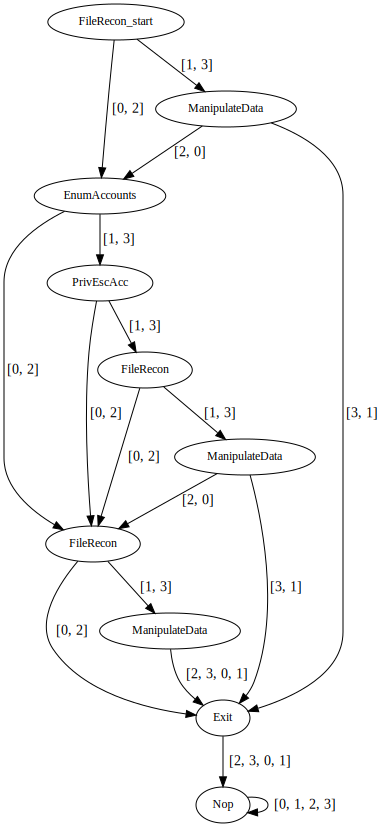

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1474957626_attl0_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, failure)]
1:[(HostObs, user_files), (ActionResult, success)]
2:[(HostObs, none), (ActionResult, failure)]
3:[(HostObs, none), (ActionResult, success)]


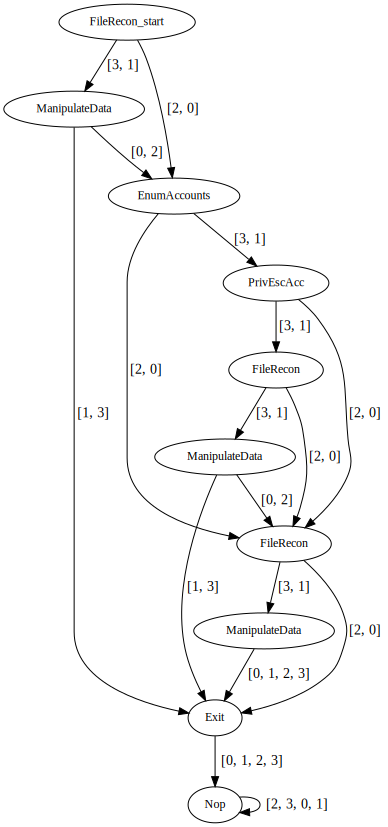

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/487792155_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


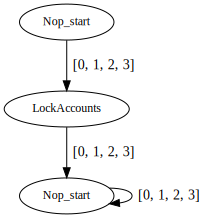

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1909398279_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


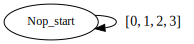

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1338905451_attl2_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure)]
1:[(HostObs, none), (ActionResult, success)]
2:[(HostObs, user_files), (ActionResult, failure)]
3:[(HostObs, user_files), (ActionResult, success)]


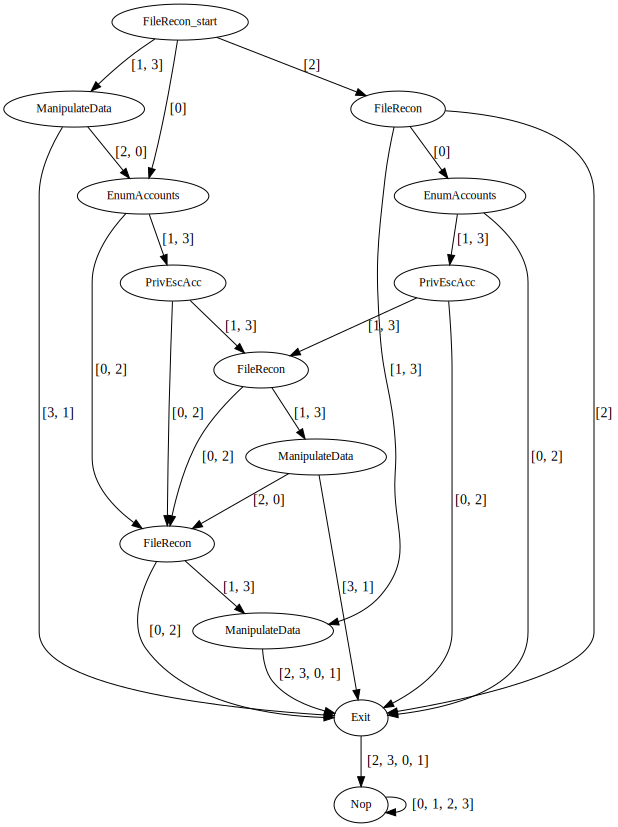

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1642679791_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


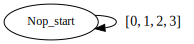

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                   login_activity

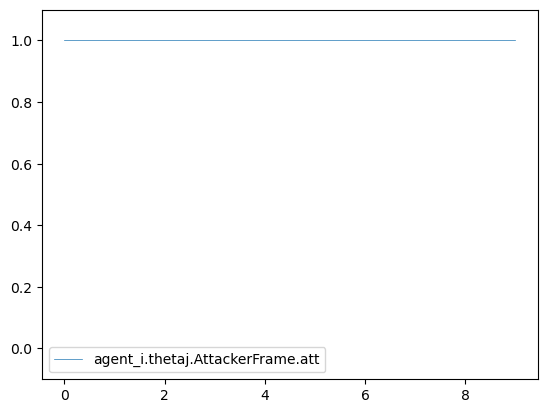

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.488539                        0.511461   
3                         0.484853                        0.515147   
4                         0.496125                        0.503876   
5                         0.496124                        0.503876   
6                         0.496124                        0.503876   
7                         0.496124                        0.503876   
8                         0.496124                        0.503876   
9                         0.496124                        0.503876   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

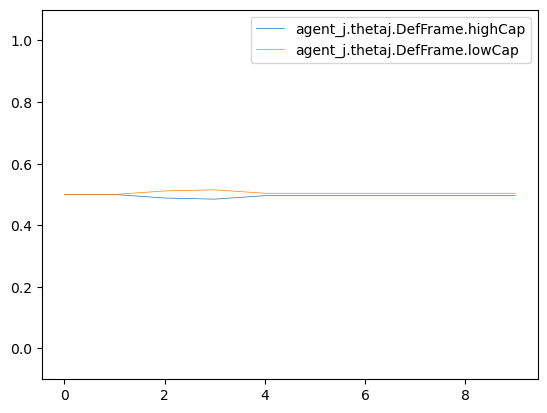

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

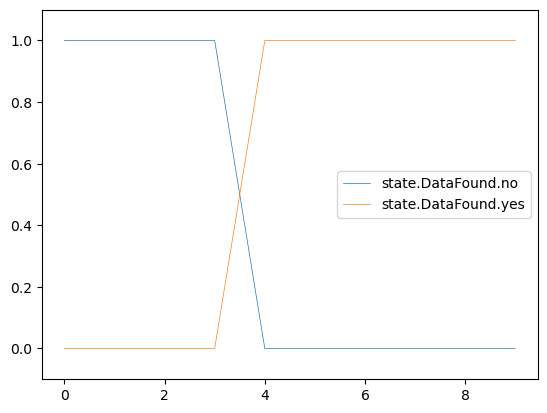

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop  ManipulateData   
5                   1.0                    0.0            Nop            Exit   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

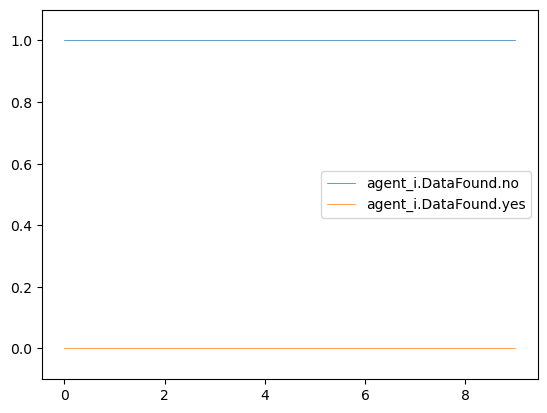

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.191810               0.808190  ManipulateData            Nop   
5              0.000238               0.999763            Exit            Nop   
6              0.000238               0.999763             Nop            Nop   
7              0.000238               0.999763             Nop            Nop   
8              0.000238               0.999763             Nop            Nop   
9              0.000238               0.999763             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

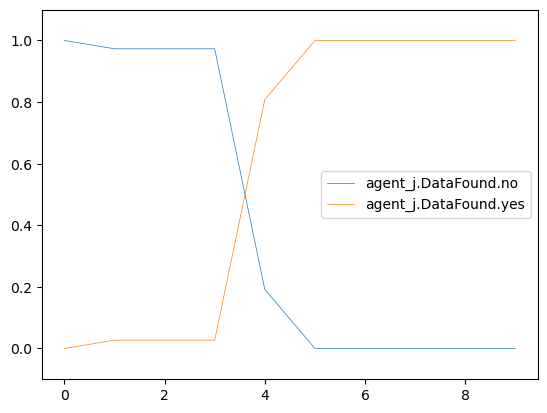

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

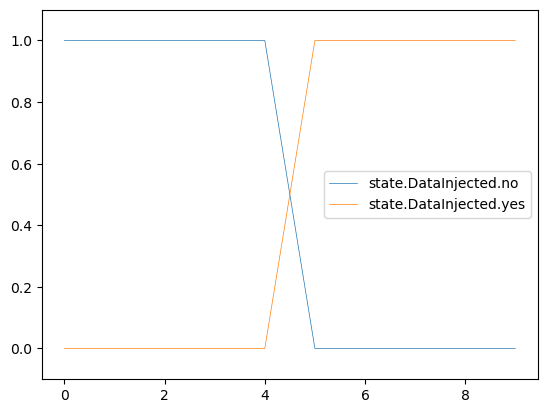

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

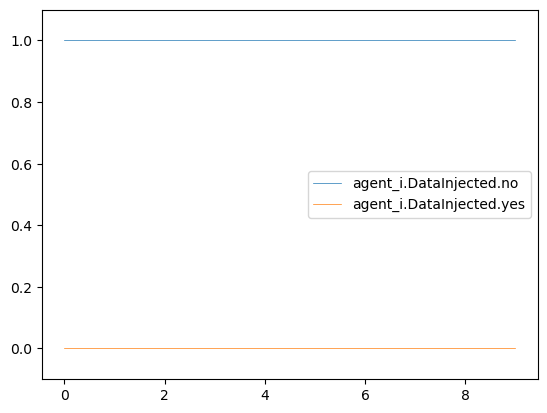

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000238                  0.999763            Exit   
6                 0.000238                  0.999763             Nop   
7                 0.000238                  0.999763             Nop   
8                 0.000238                  0.999763             Nop   
9                 0.000238                  0.999763             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

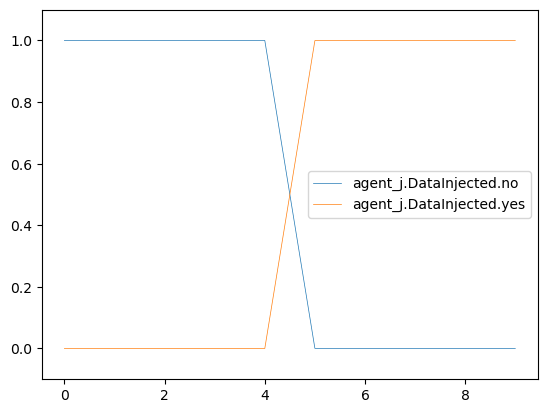

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

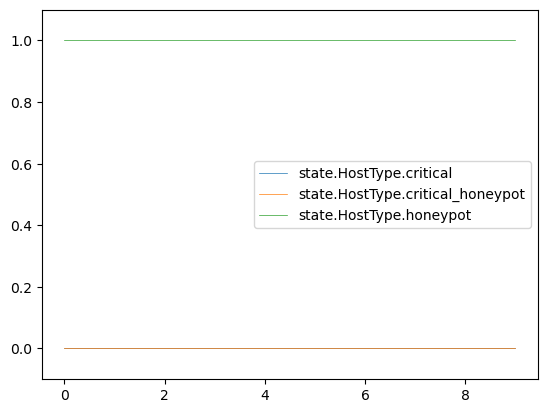

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

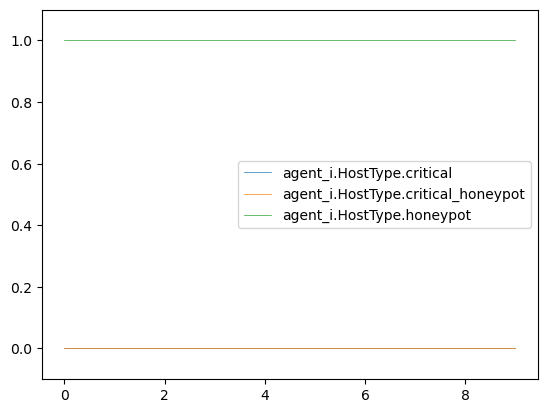

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.200000                                 0.0   
2                   0.037249                                 0.0   
3                   0.030311                                 0.0   
4                   0.007753                                 0.0   
5                   0.007752                                 0.0   
6                   0.007752                                 0.0   
7                   0.007752                                 0.0   
8                   0.007752                                 0.0   
9                   0.007752                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                   0.500000       FileRecon            Nop   
1                   0.800000    EnumAccounts            Nop   
2                   0.962751      PrivEscAcc            Nop   
3                   0.969689       FileRecon            Nop   
4                   0.992247  ManipulateData            Nop   
5                   0.992248            Exit            Nop   
6                   0.992248             Nop            Nop   
7                   0.992248             Nop            Nop   
8                   0.992248             Nop            Nop   
9                   0.992248             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

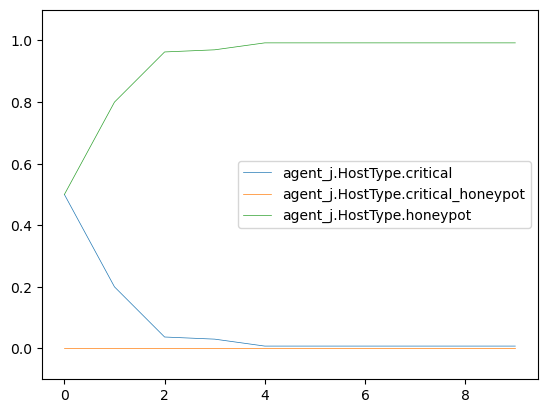

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

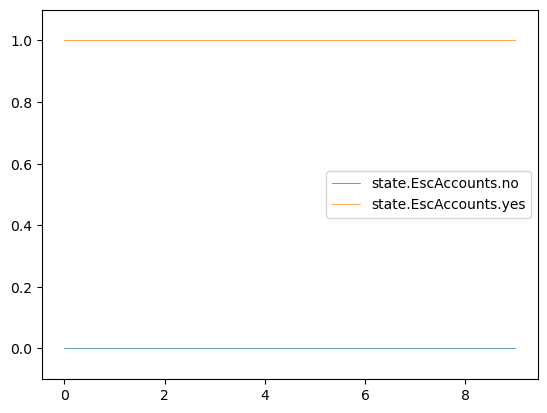

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

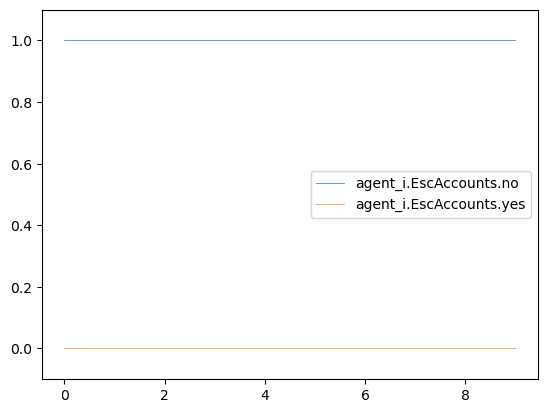

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.125358                 0.874642      PrivEscAcc   
3                0.000147                 0.999852       FileRecon   
4                0.000064                 0.999936  ManipulateData   
5                0.000034                 0.999966            Exit   
6                0.000034                 0.999966             Nop   
7                0.000034                 0.999966             Nop   
8                0.000034                 0.999966             Nop   
9                0.000034                 0.999966             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

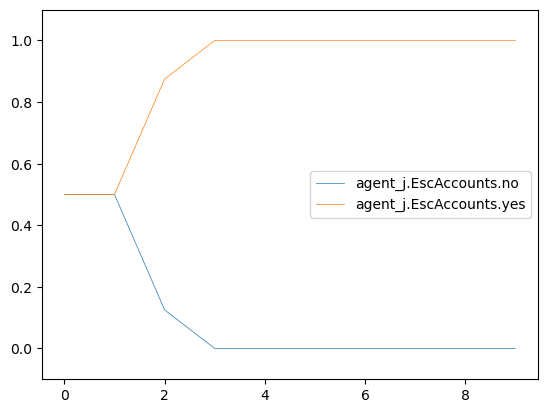

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

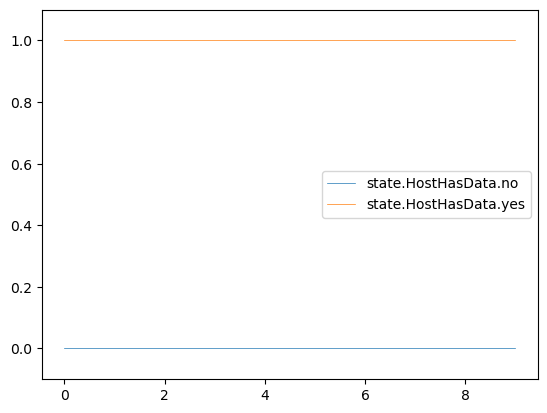

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

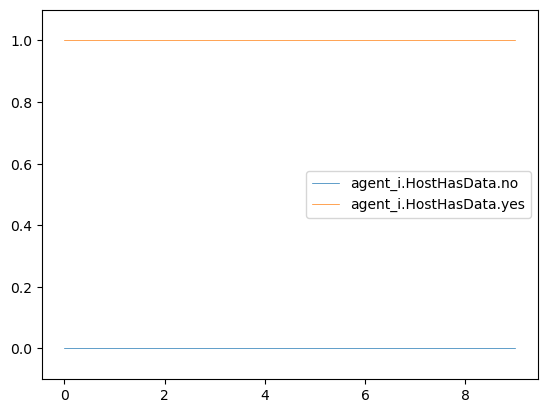

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.171249                 0.828751  ManipulateData   
5                0.000212                 0.999788            Exit   
6                0.000212                 0.999788             Nop   
7                0.000212                 0.999788             Nop   
8                0.000212                 0.999788             Nop   
9                0.000212                 0.999788             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

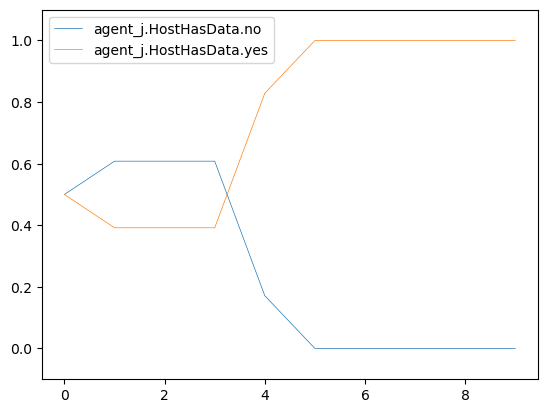

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

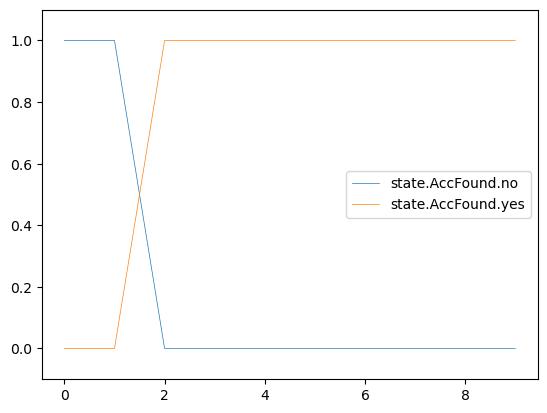

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop  ManipulateData   
5                  1.0                   0.0            Nop            Exit   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

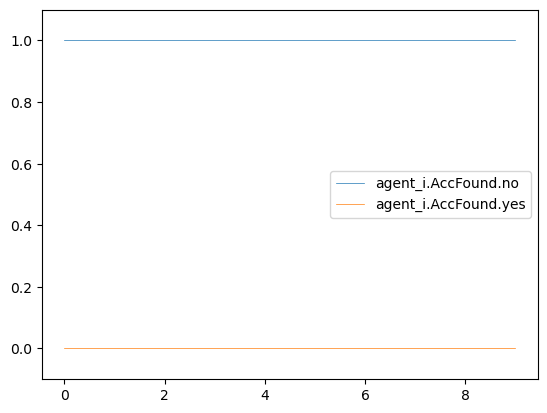

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.148997              0.851003      PrivEscAcc            Nop   
3             0.000175              0.999825       FileRecon            Nop   
4             0.000076              0.999924  ManipulateData            Nop   
5             0.000040              0.999960            Exit            Nop   
6             0.000040              0.999960             Nop            Nop   
7             0.000040              0.999960             Nop            Nop   
8             0.000040              0.999960             Nop            Nop   
9             0.000040              0.999960             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

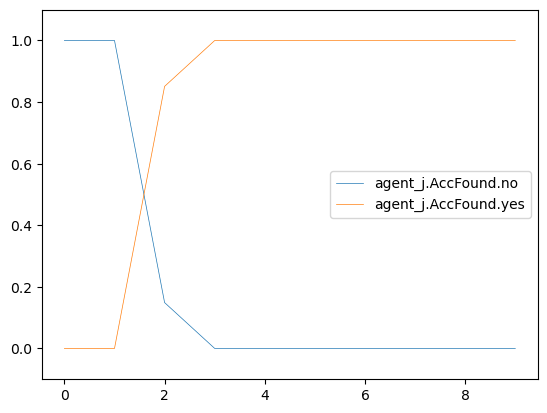

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

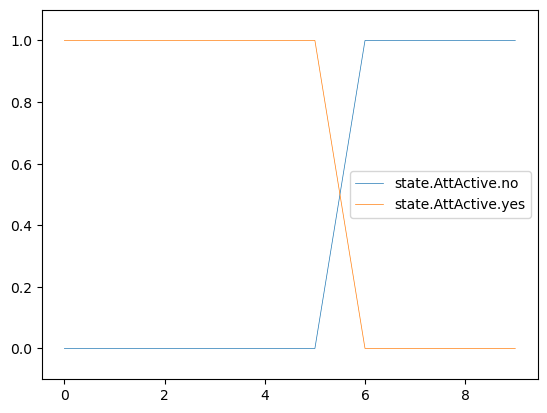

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.004147           9.958529e-01            Nop       FileRecon   
4              0.001106           9.988940e-01            Nop  ManipulateData   
5              0.084926           9.150736e-01            Nop            Exit   
6              0.999991           9.518424e-06            Nop             Nop   
7              1.000000           9.722522e-09            Nop             Nop   
8              1.000000           1.992509e-17            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

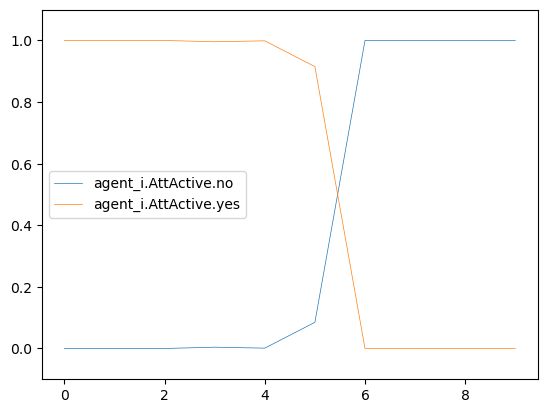

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

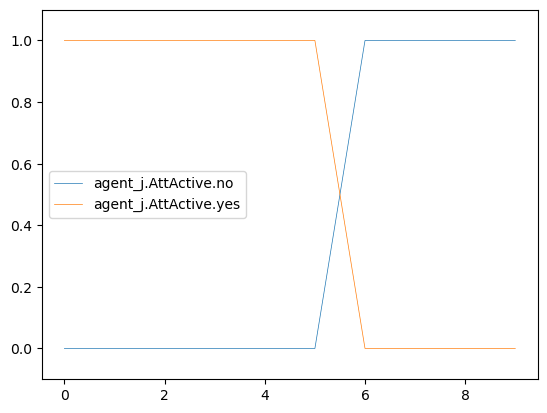

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

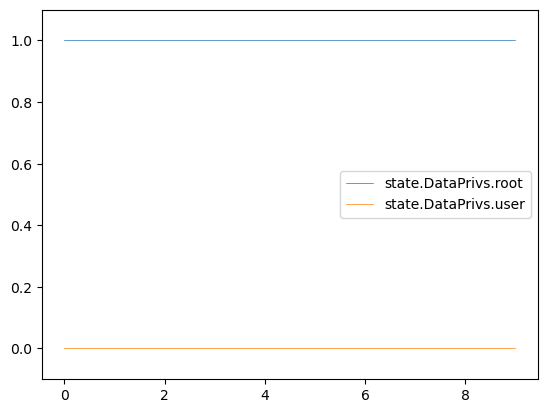

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

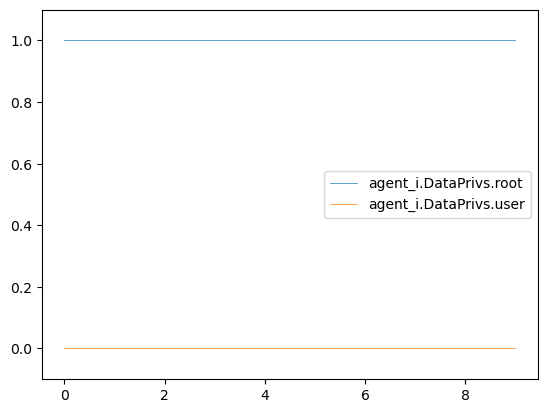

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.719152                0.280848  ManipulateData   
5                0.762627                0.237373            Exit   
6                0.762627                0.237373             Nop   
7                0.762627                0.237373             Nop   
8                0.762627                0.237373             Nop   
9                0.762627                0.237373             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

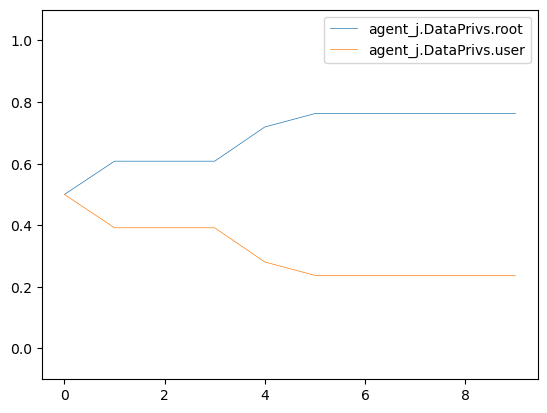

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

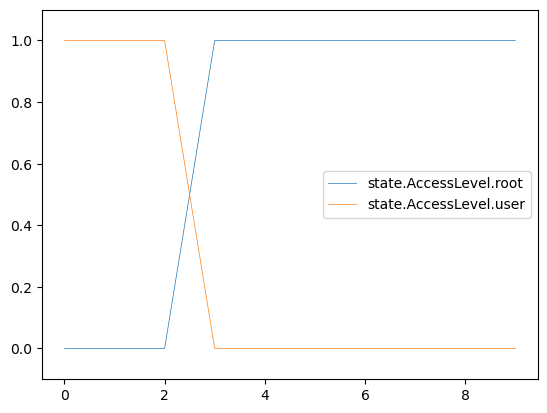

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

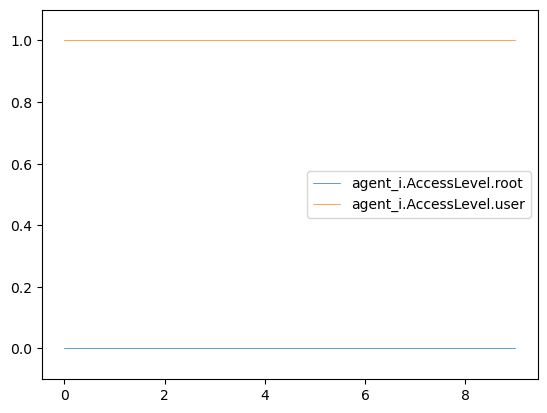

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999825                  0.000175       FileRecon   
4                  0.999924                  0.000076  ManipulateData   
5                  0.999960                  0.000040            Exit   
6                  0.999960                  0.000040             Nop   
7                  0.999960                  0.000040             Nop   
8                  0.999960                  0.000040             Nop   
9                  0.999960                  0.000040             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

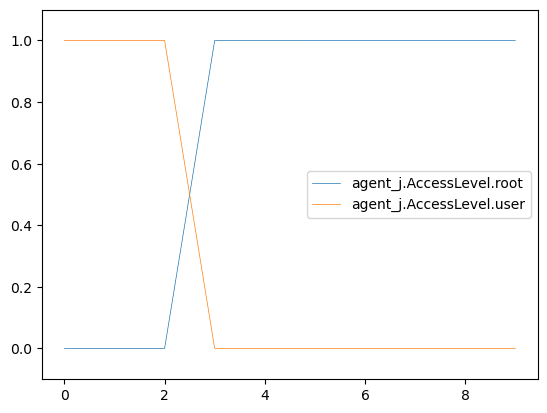

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

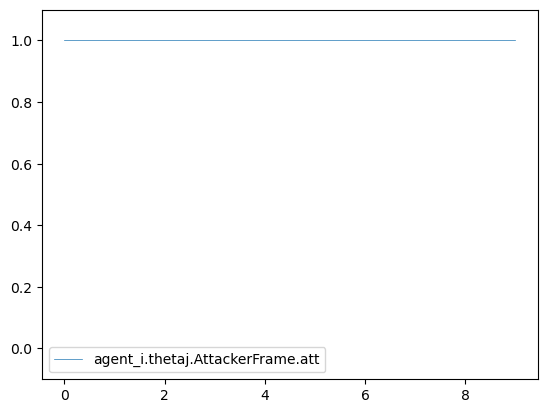

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.500000                        0.500000   
3                         0.458763                        0.541237   
4                         0.530812                        0.469188   
5                         0.530812                        0.469188   
6                         0.530812                        0.469188   
7                         0.530812                        0.469188   
8                         0.530812                        0.469188   
9                         0.530812                        0.469188   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           success  
3                   user_files                           failure  
4                   user_files                           failure  
5                         none                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

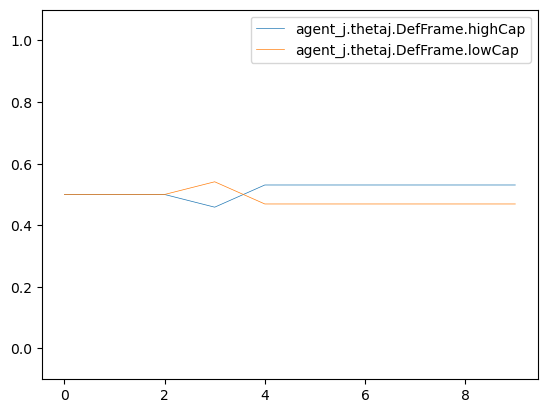

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop      FileRecon
2                 1.0                  0.0            Nop   EnumAccounts
3                 1.0                  0.0            Nop     PrivEscAcc
4                 1.0                  0.0            Nop           Exit
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

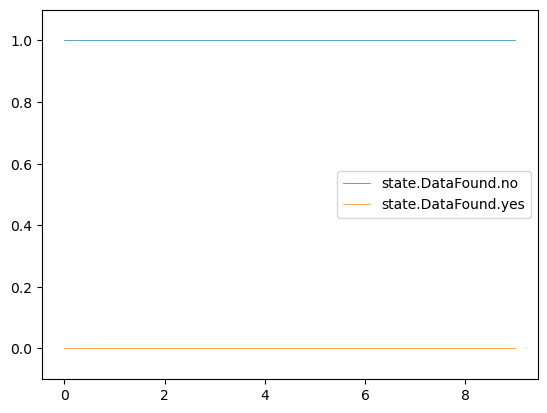

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0            Nop      FileRecon   
1                   1.0                    0.0            Nop      FileRecon   
2                   1.0                    0.0            Nop   EnumAccounts   
3                   1.0                    0.0            Nop     PrivEscAcc   
4                   1.0                    0.0            Nop           Exit   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

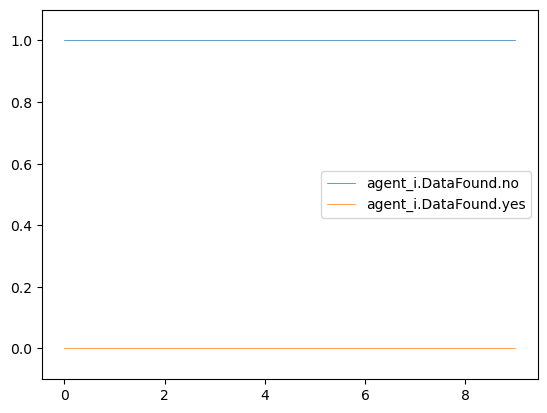

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.972973               0.027027      FileRecon            Nop   
2              0.990985               0.009015   EnumAccounts            Nop   
3              0.990985               0.009015     PrivEscAcc            Nop   
4              0.990985               0.009015           Exit            Nop   
5              0.990985               0.009015            Nop            Nop   
6              0.990985               0.009015            Nop            Nop   
7              0.990985               0.009015            Nop            Nop   
8              0.990985               0.009015            Nop            Nop   
9              0.990985               0.009015            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           success  
3                   user_files                           failure  
4                   user_files                           failure  
5                         none                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

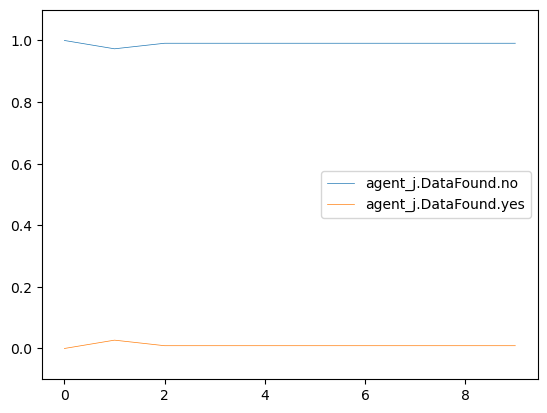

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop      FileRecon
2                    1.0                     0.0            Nop   EnumAccounts
3                    1.0                     0.0            Nop     PrivEscAcc
4                    1.0                     0.0            Nop           Exit
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

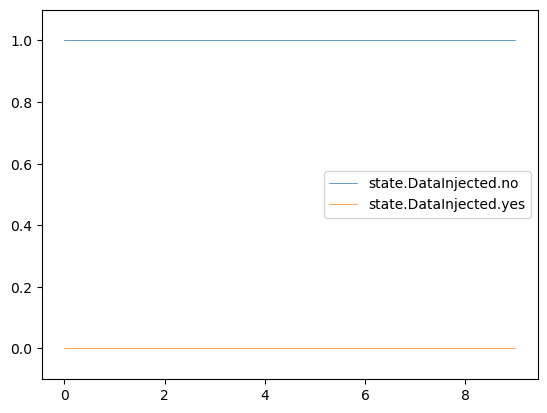

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                   login_activity  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

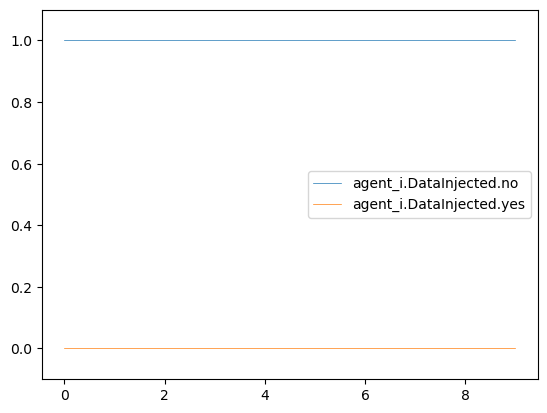

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0      FileRecon   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0           Exit   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

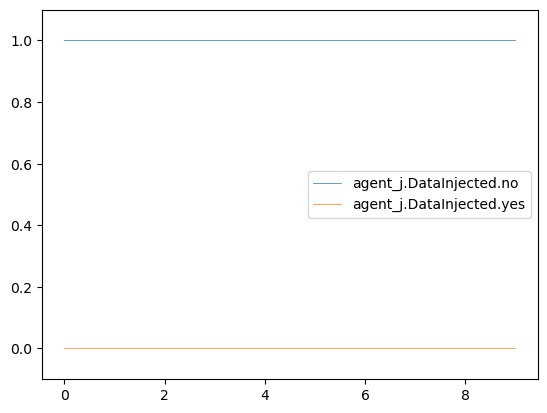

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop      FileRecon  
2                      1.0            Nop   EnumAccounts  
3                      1.0            Nop     PrivEscAcc  
4                      1.0            Nop           Exit  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

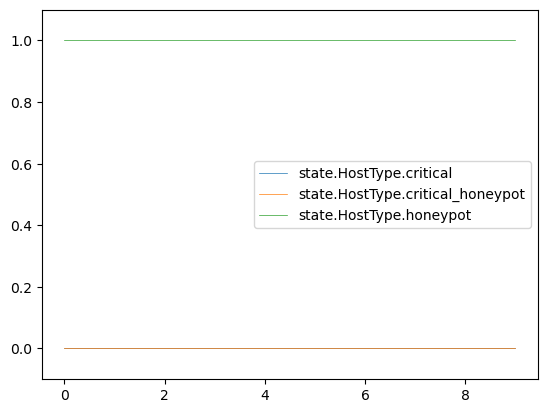

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop      FileRecon   
2                        1.0            Nop   EnumAccounts   
3                        1.0            Nop     PrivEscAcc   
4                        1.0            Nop           Exit   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

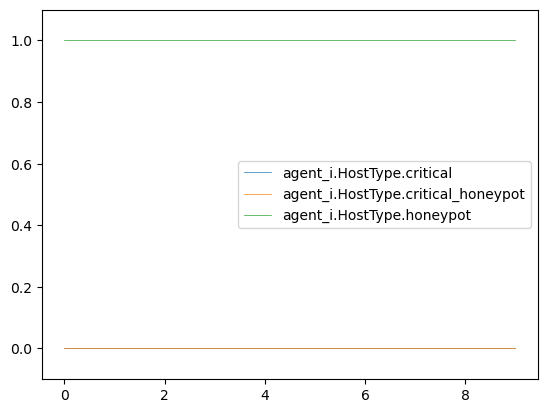

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.800000                                 0.0   
2                   0.500000                                 0.0   
3                   0.134021                                 0.0   
4                   0.249300                                 0.0   
5                   0.249300                                 0.0   
6                   0.249300                                 0.0   
7                   0.249300                                 0.0   
8                   0.249300                                 0.0   
9                   0.249300                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                    0.50000      FileRecon            Nop   
1                    0.20000      FileRecon            Nop   
2                    0.50000   EnumAccounts            Nop   
3                    0.86598     PrivEscAcc            Nop   
4                    0.75070           Exit            Nop   
5                    0.75070            Nop            Nop   
6                    0.75070            Nop            Nop   
7                    0.75070            Nop            Nop   
8                    0.75070            Nop            Nop   
9                    0.75070            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           success  
3                   user_files                           failure  
4                   user_files                           failure  
5                         none                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

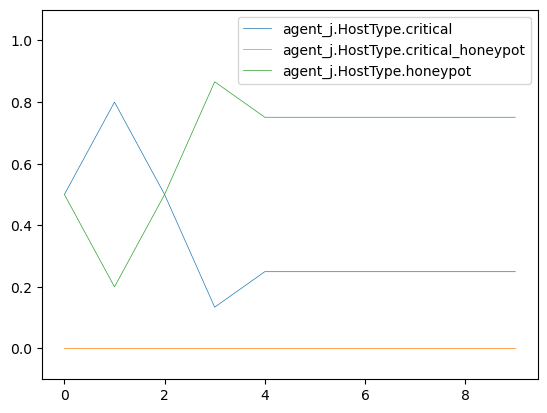

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop      FileRecon
2                   0.0                    1.0            Nop   EnumAccounts
3                   0.0                    1.0            Nop     PrivEscAcc
4                   0.0                    1.0            Nop           Exit
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

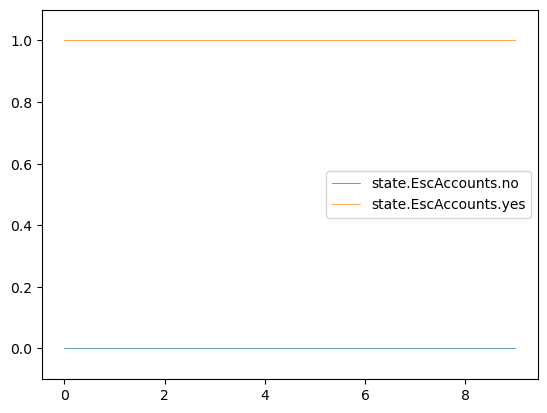

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                   login_activity  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

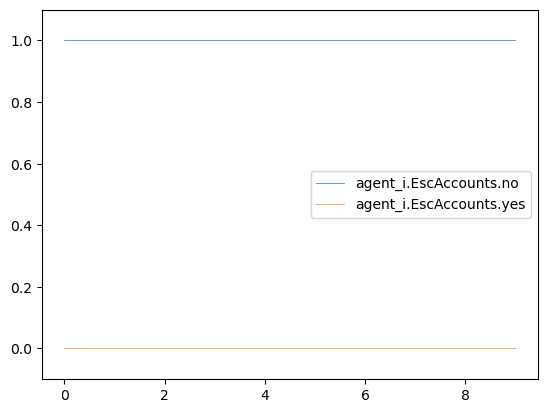

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000      FileRecon   
2                0.625000                 0.375000   EnumAccounts   
3                0.141753                 0.858248     PrivEscAcc   
4                0.855042                 0.144958           Exit   
5                0.855042                 0.144958            Nop   
6                0.855042                 0.144958            Nop   
7                0.855042                 0.144958            Nop   
8                0.855042                 0.144958            Nop   
9                0.855042                 0.144958            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

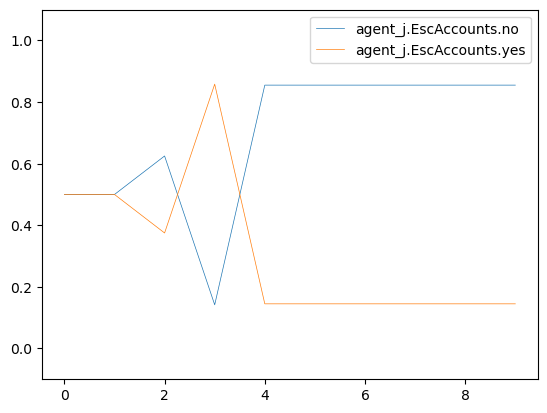

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop      FileRecon
2                   0.0                    1.0            Nop   EnumAccounts
3                   0.0                    1.0            Nop     PrivEscAcc
4                   0.0                    1.0            Nop           Exit
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

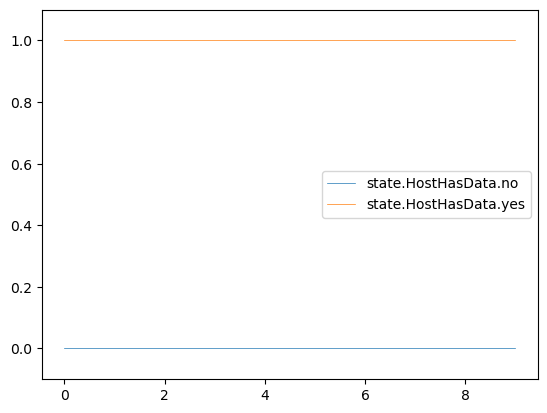

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                   login_activity  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

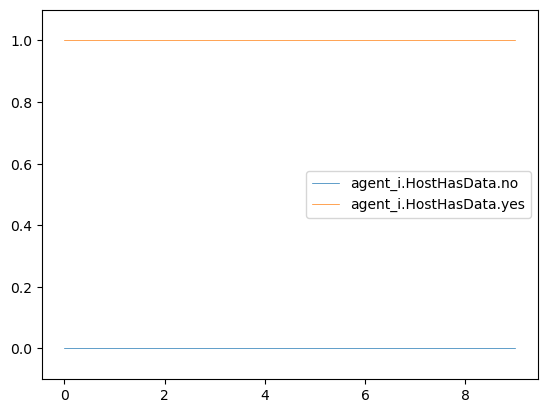

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.608108                 0.391892      FileRecon   
2                0.651964                 0.348036   EnumAccounts   
3                0.651964                 0.348036     PrivEscAcc   
4                0.651964                 0.348036           Exit   
5                0.651964                 0.348036            Nop   
6                0.651964                 0.348036            Nop   
7                0.651964                 0.348036            Nop   
8                0.651964                 0.348036            Nop   
9                0.651964                 0.348036            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

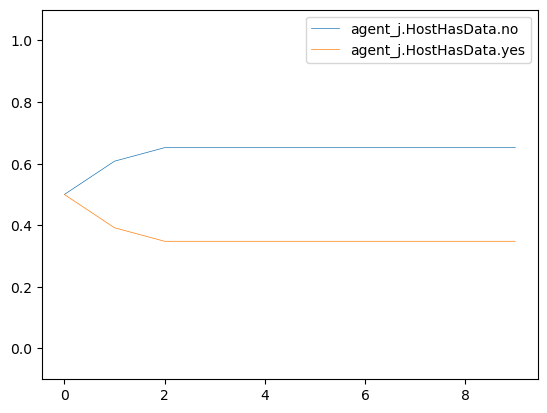

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop      FileRecon
2                1.0                 0.0            Nop   EnumAccounts
3                1.0                 0.0            Nop     PrivEscAcc
4                1.0                 0.0            Nop           Exit
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

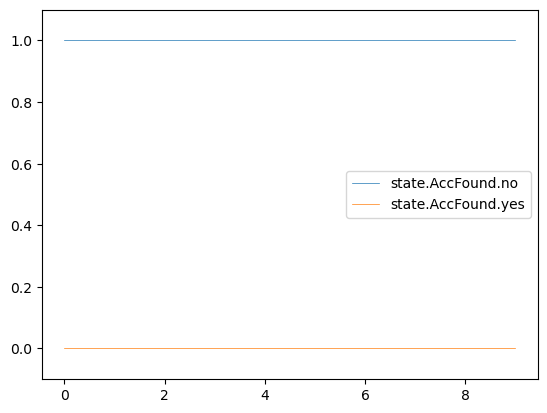

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0            Nop      FileRecon   
1                  1.0                   0.0            Nop      FileRecon   
2                  1.0                   0.0            Nop   EnumAccounts   
3                  1.0                   0.0            Nop     PrivEscAcc   
4                  1.0                   0.0            Nop           Exit   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

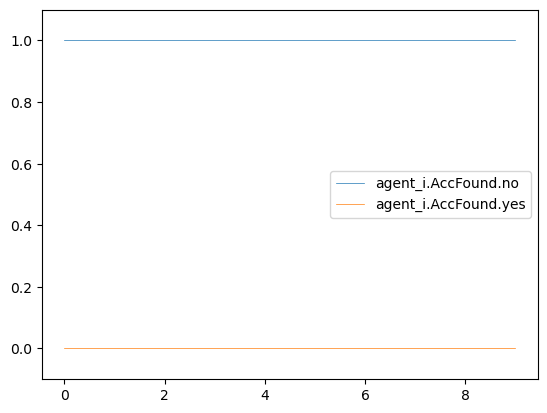

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000      FileRecon            Nop   
2             1.000000              0.000000   EnumAccounts            Nop   
3             0.164948              0.835052     PrivEscAcc            Nop   
4             0.994958              0.005042           Exit            Nop   
5             0.994958              0.005042            Nop            Nop   
6             0.994958              0.005042            Nop            Nop   
7             0.994958              0.005042            Nop            Nop   
8             0.994958              0.005042            Nop            Nop   
9             0.994958              0.005042            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           success  
3                   user_files                           failure  
4                   user_files                           failure  
5                         none                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

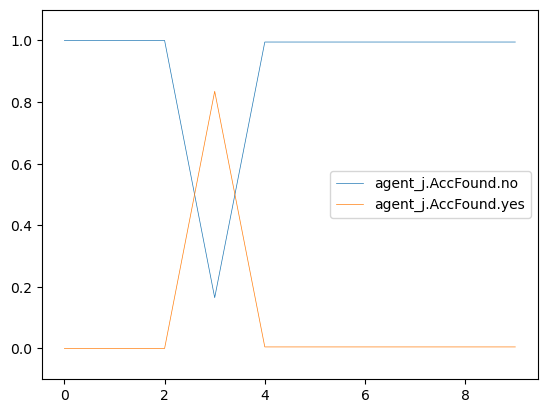

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop      FileRecon
2                 0.0                  1.0            Nop   EnumAccounts
3                 0.0                  1.0            Nop     PrivEscAcc
4                 0.0                  1.0            Nop           Exit
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

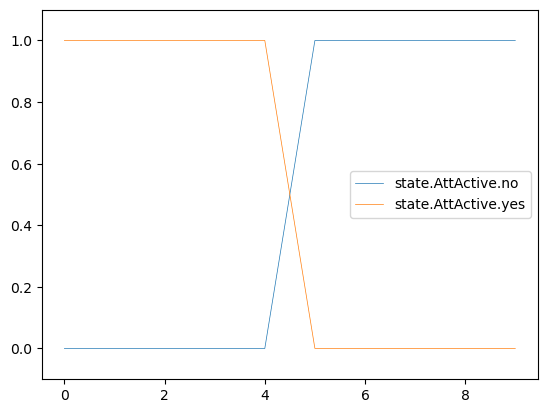

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00            Nop      FileRecon   
1              0.000000           1.000000e+00            Nop      FileRecon   
2              0.000000           1.000000e+00            Nop   EnumAccounts   
3              0.000428           9.995718e-01            Nop     PrivEscAcc   
4              0.344337           6.556633e-01            Nop           Exit   
5              0.999942           5.818004e-05            Nop            Nop   
6              1.000000           1.190307e-07            Nop            Nop   
7              1.000000           1.303537e-10            Nop            Nop   
8              1.000000           7.069340e-14            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

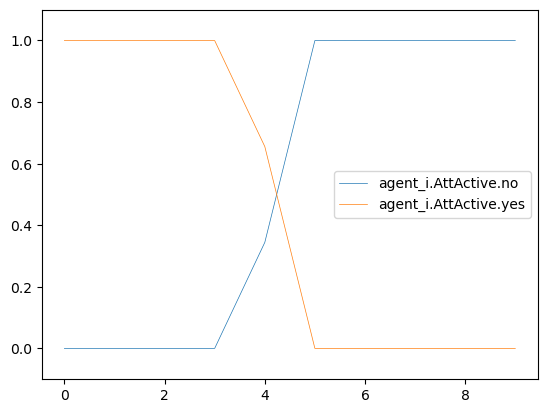

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0      FileRecon            Nop   
2                   0.0                    1.0   EnumAccounts            Nop   
3                   0.0                    1.0     PrivEscAcc            Nop   
4                   0.0                    1.0           Exit            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           success  
3                   user_files                           failure  
4                   user_files                           failure  
5                         none                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

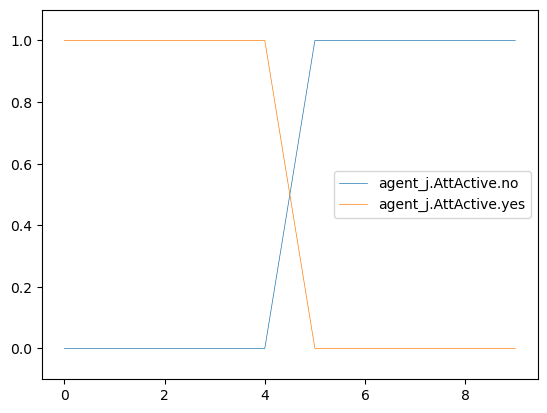

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop      FileRecon
2                   1.0                   0.0            Nop   EnumAccounts
3                   1.0                   0.0            Nop     PrivEscAcc
4                   1.0                   0.0            Nop           Exit
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

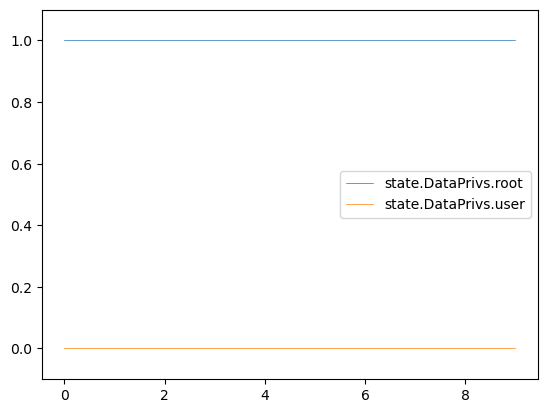

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                   login_activity  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

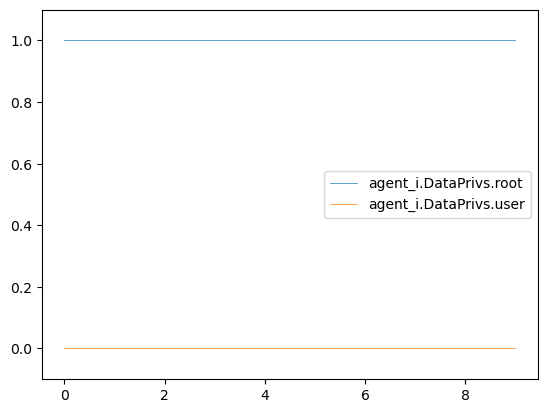

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.608108                0.391892      FileRecon   
2                0.651964                0.348036   EnumAccounts   
3                0.651964                0.348036     PrivEscAcc   
4                0.651964                0.348036           Exit   
5                0.651964                0.348036            Nop   
6                0.651964                0.348036            Nop   
7                0.651964                0.348036            Nop   
8                0.651964                0.348036            Nop   
9                0.651964                0.348036            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

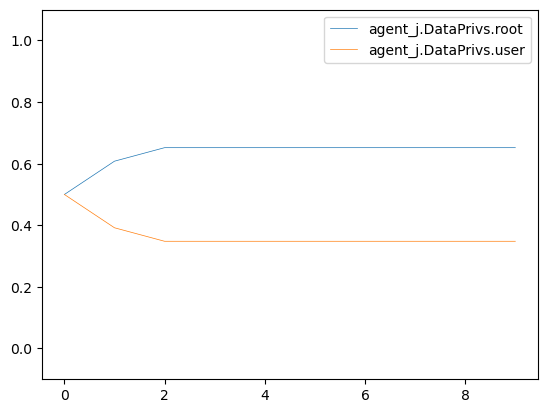

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1      FileRecon  
2   EnumAccounts  
3     PrivEscAcc  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

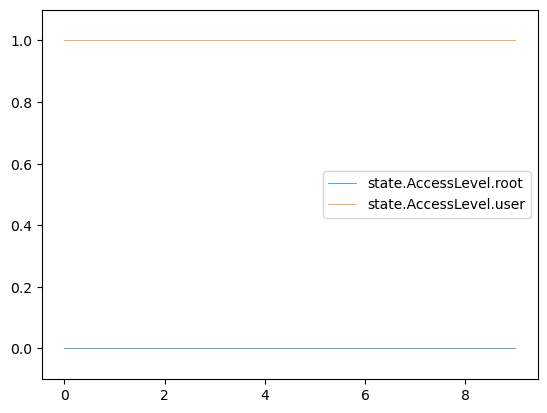

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2   EnumAccounts                        file_enum  
3     PrivEscAcc                   login_activity  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

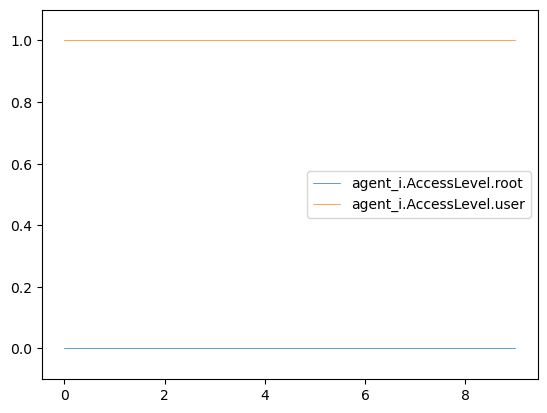

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000      FileRecon   
1                  0.000000                  1.000000      FileRecon   
2                  0.000000                  1.000000   EnumAccounts   
3                  0.000000                  1.000000     PrivEscAcc   
4                  0.005042                  0.994958           Exit   
5                  0.005042                  0.994958            Nop   
6                  0.005042                  0.994958            Nop   
7                  0.005042                  0.994958            Nop   
8                  0.005042                  0.994958            Nop   
9                  0.005042                  0.994958            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

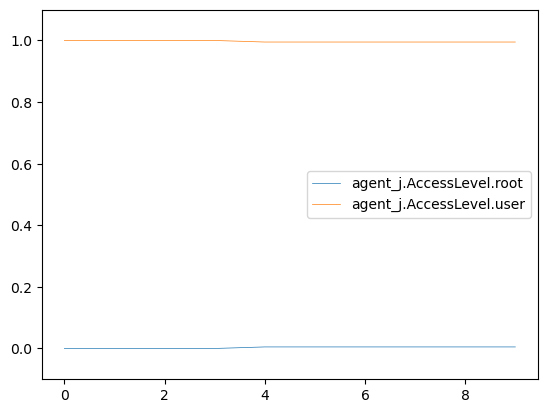

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

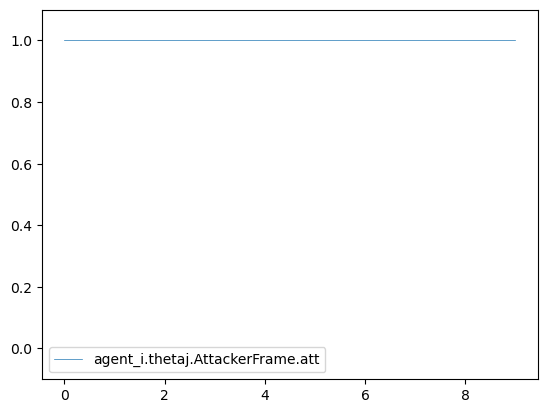

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.382353                        0.617647   
3                         0.333395                        0.666605   
4                         0.166736                        0.833264   
5                         0.166703                        0.833297   
6                         0.166703                        0.833297   
7                         0.166703                        0.833297   
8                         0.166703                        0.833297   
9                         0.166703                        0.833297   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                   user_files                           success  
4                         none                           success  
5                   user_files                           failure  
6                         none                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           success

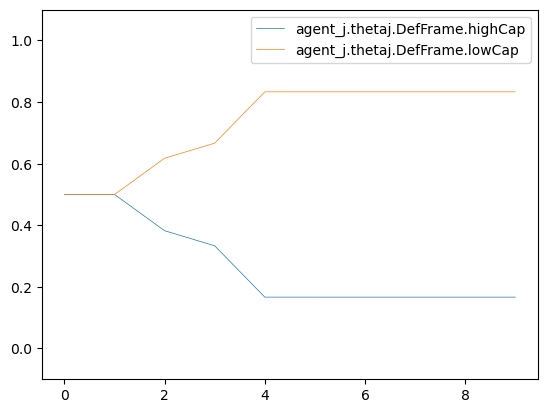

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

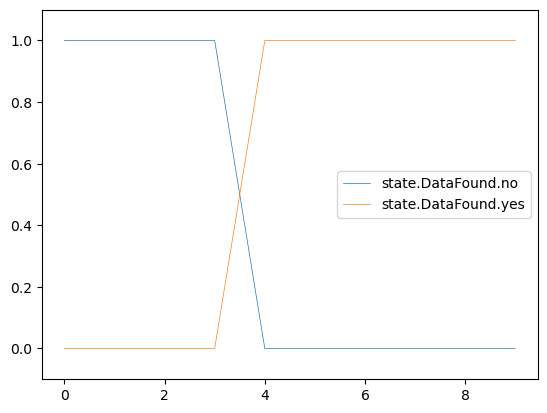

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop  ManipulateData   
5                   1.0                    0.0            Nop            Exit   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

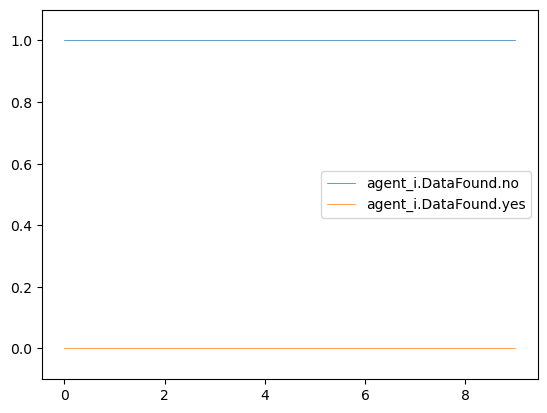

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.191842               0.808158  ManipulateData            Nop   
5              0.000238               0.999762            Exit            Nop   
6              0.000238               0.999762             Nop            Nop   
7              0.000238               0.999762             Nop            Nop   
8              0.000238               0.999762             Nop            Nop   
9              0.000238               0.999762             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                   user_files                           success  
4                         none                           success  
5                   user_files                           failure  
6                         none                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           success

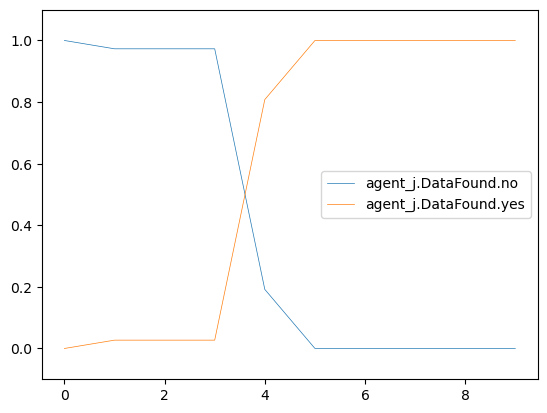

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

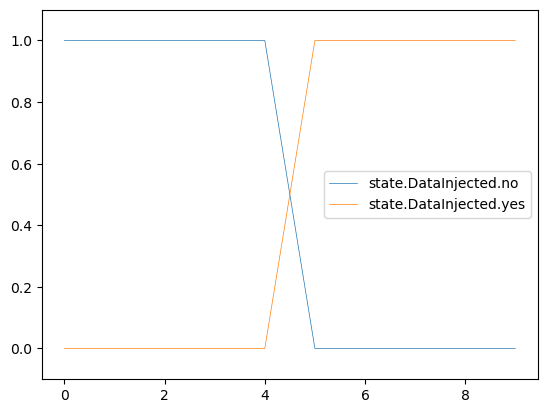

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

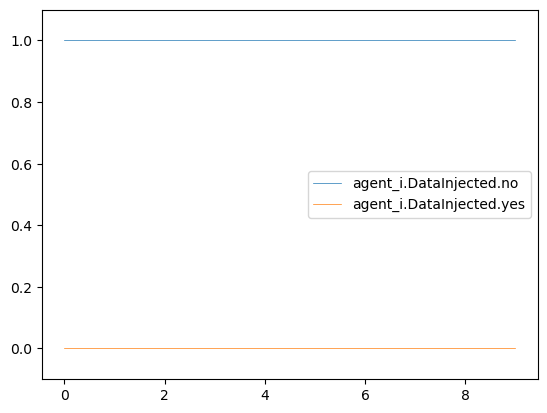

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000238                  0.999762            Exit   
6                 0.000238                  0.999762             Nop   
7                 0.000238                  0.999762             Nop   
8                 0.000238                  0.999762             Nop   
9                 0.000238                  0.999762             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           success

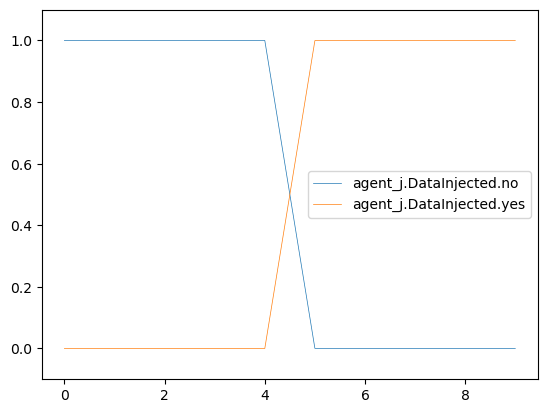

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

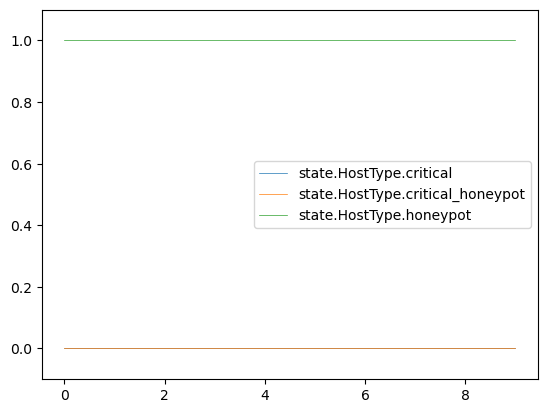

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

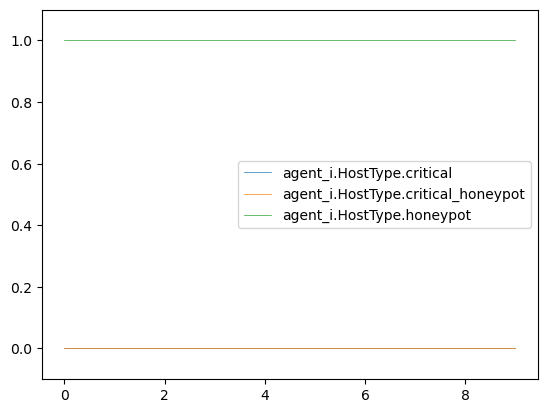

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.200000                                 0.0   
2                   0.382353                                 0.0   
3                   0.333395                                 0.0   
4                   0.666695                                 0.0   
5                   0.666681                                 0.0   
6                   0.666681                                 0.0   
7                   0.666681                                 0.0   
8                   0.666681                                 0.0   
9                   0.666681                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                   0.500000       FileRecon            Nop   
1                   0.800000    EnumAccounts            Nop   
2                   0.617647      PrivEscAcc            Nop   
3                   0.666605       FileRecon            Nop   
4                   0.333305  ManipulateData            Nop   
5                   0.333319            Exit            Nop   
6                   0.333319             Nop            Nop   
7                   0.333319             Nop            Nop   
8                   0.333319             Nop            Nop   
9                   0.333319             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                   user_files                           success  
4                         none                           success  
5                   user_files                           failure  
6                         none                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           success

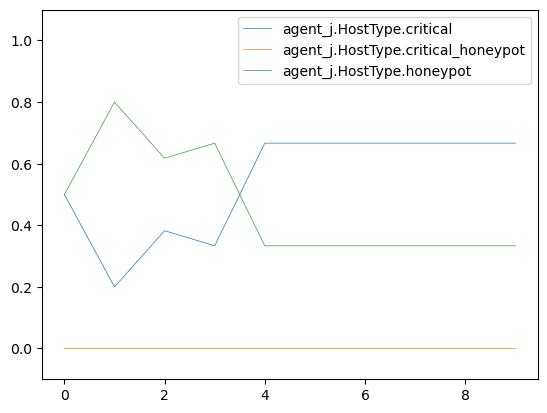

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

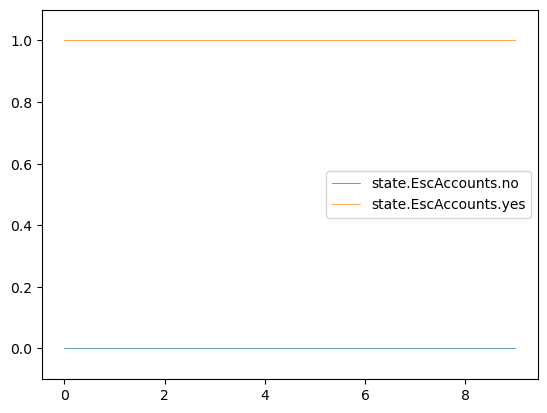

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

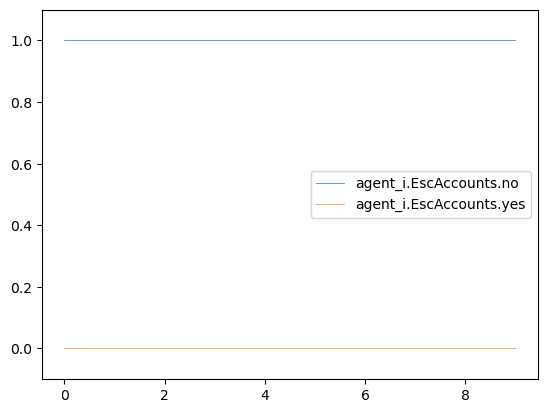

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.183824                 0.816177      PrivEscAcc   
3                0.000232                 0.999768       FileRecon   
4                0.000147                 0.999853  ManipulateData   
5                0.000077                 0.999923            Exit   
6                0.000077                 0.999923             Nop   
7                0.000077                 0.999923             Nop   
8                0.000077                 0.999923             Nop   
9                0.000077                 0.999923             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           success

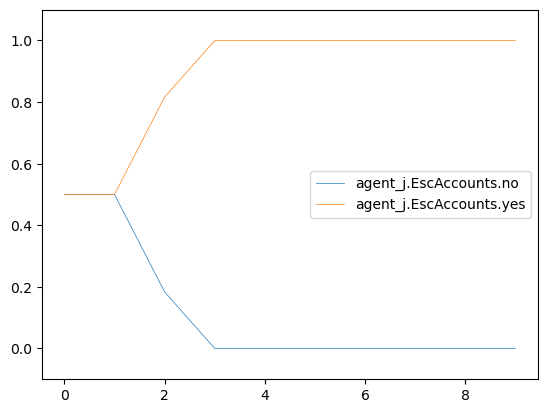

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

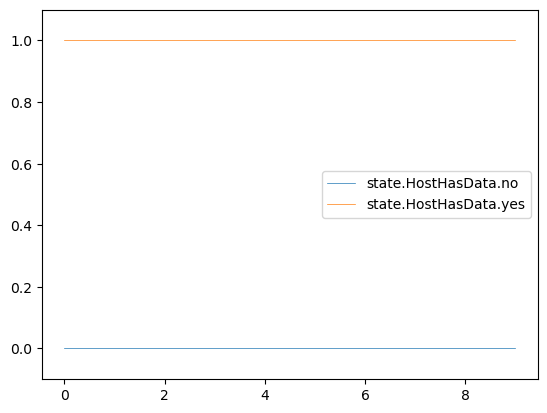

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

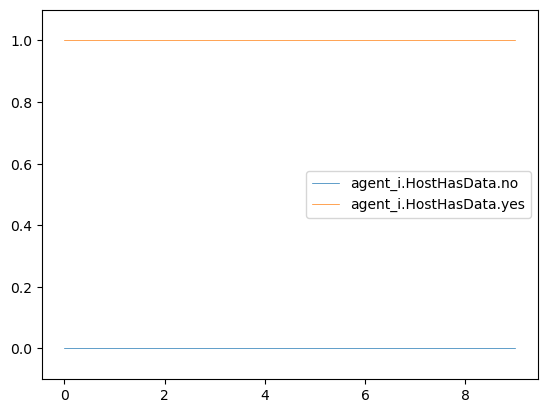

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.171266                 0.828734  ManipulateData   
5                0.000212                 0.999788            Exit   
6                0.000212                 0.999788             Nop   
7                0.000212                 0.999788             Nop   
8                0.000212                 0.999788             Nop   
9                0.000212                 0.999788             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           success

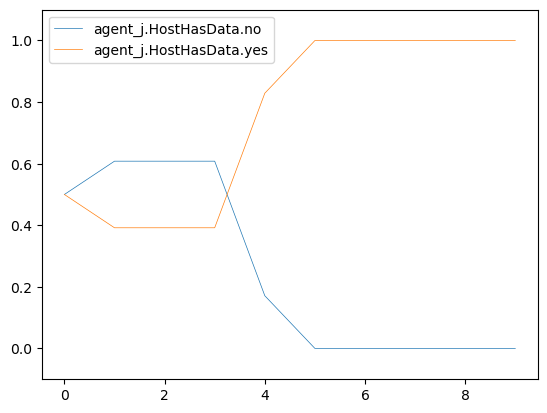

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

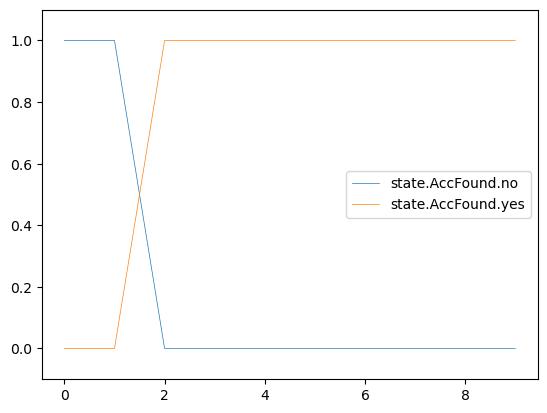

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop  ManipulateData   
5                  1.0                   0.0            Nop            Exit   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

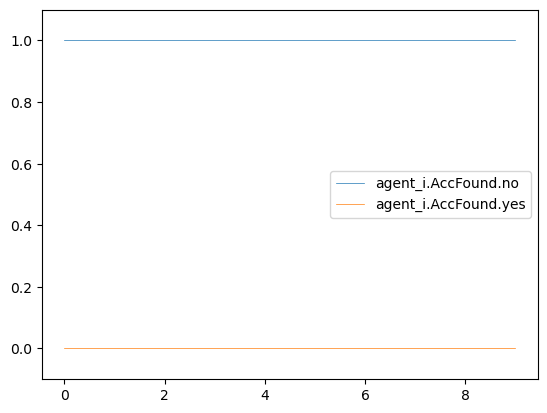

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.205882              0.794118      PrivEscAcc            Nop   
3             0.000259              0.999741       FileRecon            Nop   
4             0.000159              0.999841  ManipulateData            Nop   
5             0.000084              0.999916            Exit            Nop   
6             0.000084              0.999916             Nop            Nop   
7             0.000084              0.999916             Nop            Nop   
8             0.000084              0.999916             Nop            Nop   
9             0.000084              0.999916             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                   user_files                           success  
4                         none                           success  
5                   user_files                           failure  
6                         none                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           success

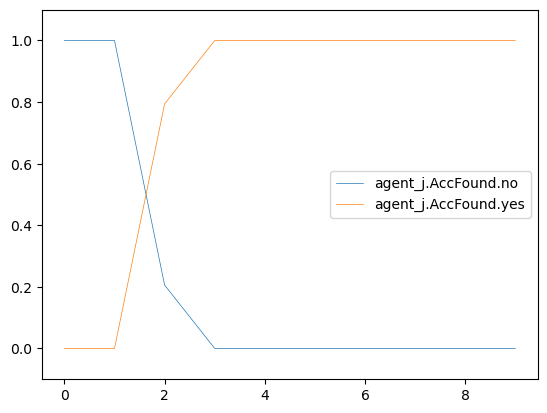

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

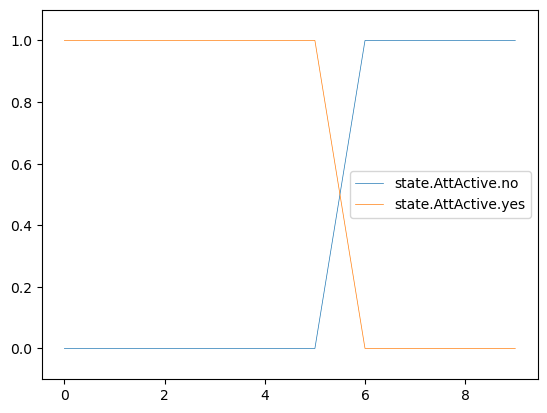

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.004147           9.958529e-01            Nop       FileRecon   
4              0.001106           9.988940e-01            Nop  ManipulateData   
5              0.084926           9.150736e-01            Nop            Exit   
6              0.999991           9.518424e-06            Nop             Nop   
7              1.000000           9.722522e-09            Nop             Nop   
8              1.000000           1.992509e-17            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

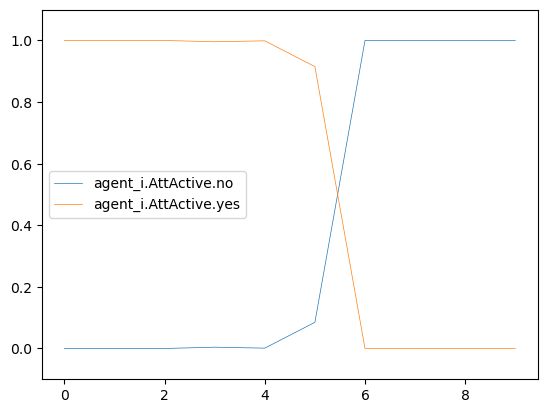

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                   user_files                           success  
4                         none                           success  
5                   user_files                           failure  
6                         none                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           success

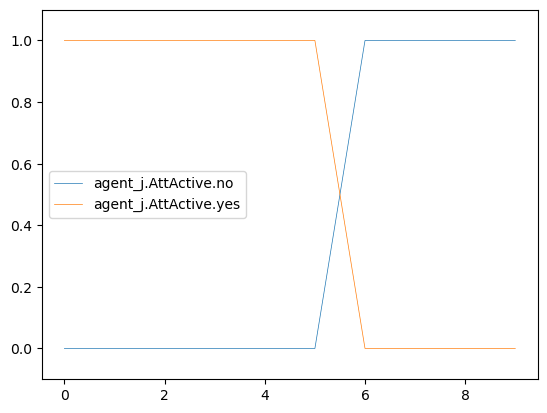

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

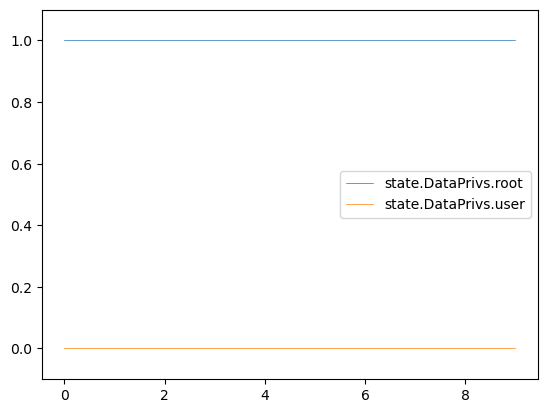

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

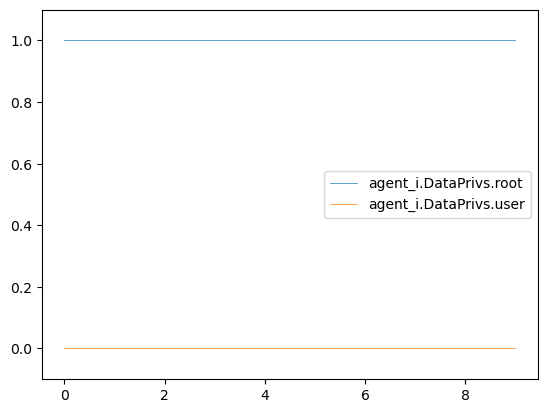

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.719124                0.280876  ManipulateData   
5                0.762594                0.237406            Exit   
6                0.762594                0.237406             Nop   
7                0.762594                0.237406             Nop   
8                0.762594                0.237406             Nop   
9                0.762594                0.237406             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           success

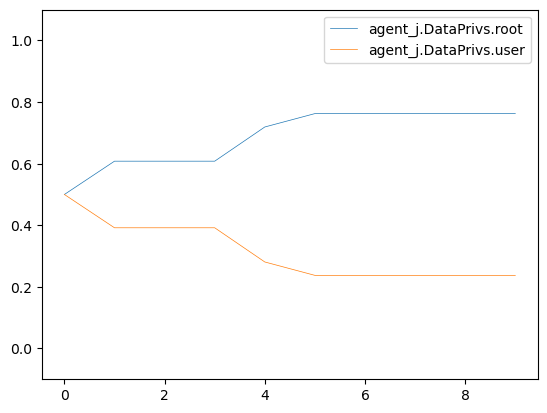

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

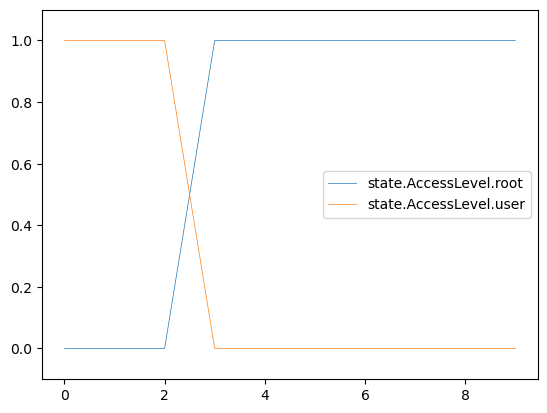

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

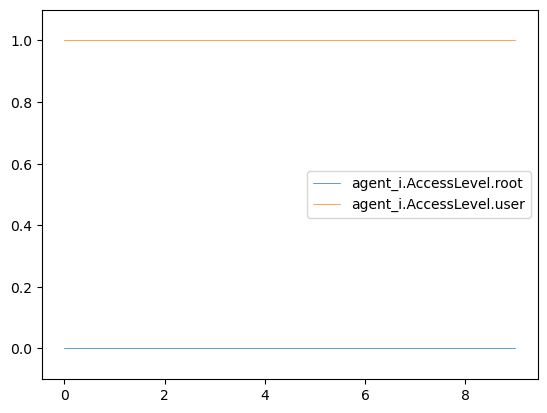

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999741                  0.000259       FileRecon   
4                  0.999841                  0.000159  ManipulateData   
5                  0.999916                  0.000084            Exit   
6                  0.999916                  0.000084             Nop   
7                  0.999916                  0.000084             Nop   
8                  0.999916                  0.000084             Nop   
9                  0.999916                  0.000084             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           success

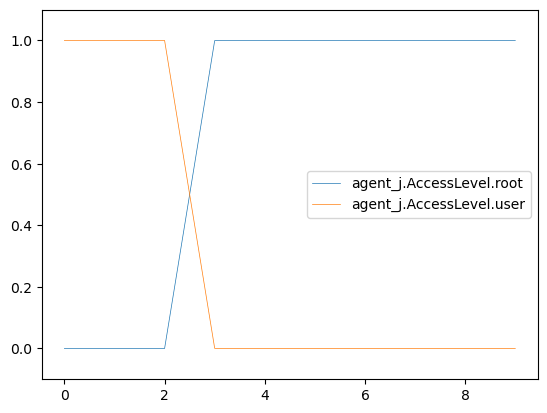

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

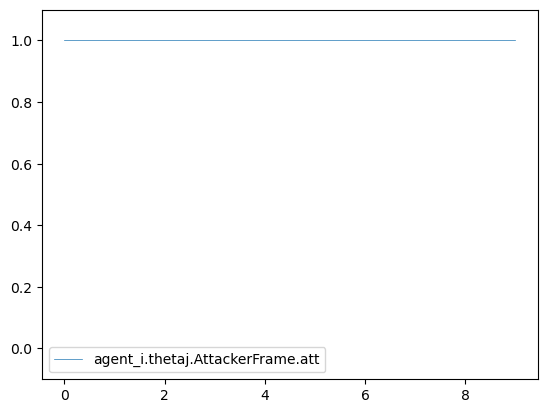

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.488539                        0.511461   
3                         0.484853                        0.515147   
4                         0.496125                        0.503876   
5                         0.496124                        0.503876   
6                         0.496124                        0.503876   
7                         0.496124                        0.503876   
8                         0.496124                        0.503876   
9                         0.496124                        0.503876   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

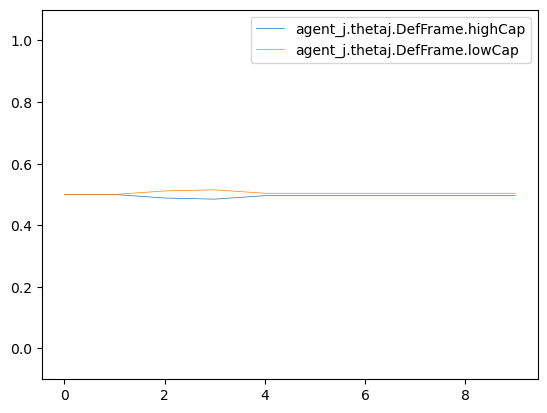

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

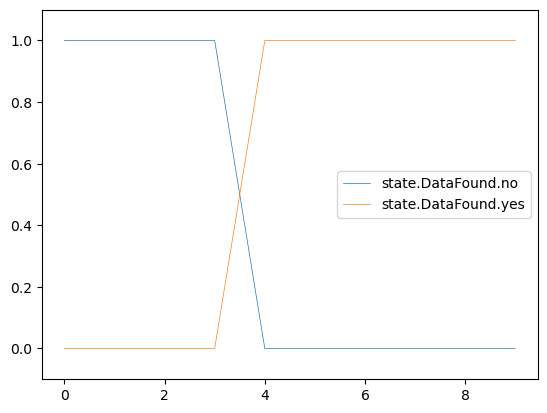

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop  ManipulateData   
5                   1.0                    0.0            Nop            Exit   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

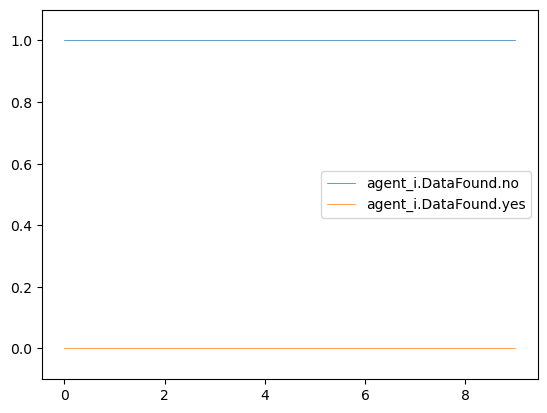

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.191810               0.808190  ManipulateData            Nop   
5              0.000238               0.999763            Exit            Nop   
6              0.000238               0.999763             Nop            Nop   
7              0.000238               0.999763             Nop            Nop   
8              0.000238               0.999763             Nop            Nop   
9              0.000238               0.999763             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

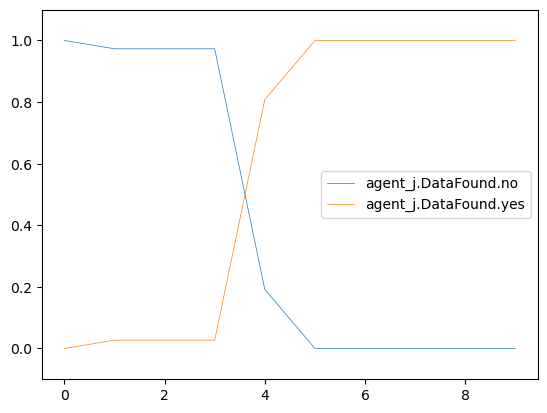

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

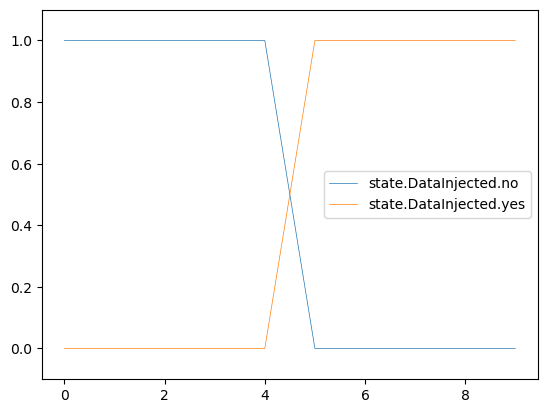

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

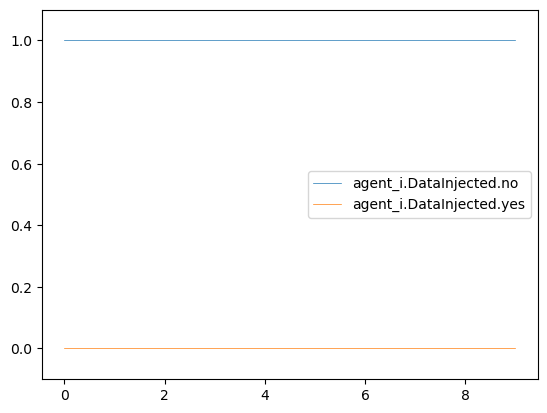

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000238                  0.999763            Exit   
6                 0.000238                  0.999763             Nop   
7                 0.000238                  0.999763             Nop   
8                 0.000238                  0.999763             Nop   
9                 0.000238                  0.999763             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

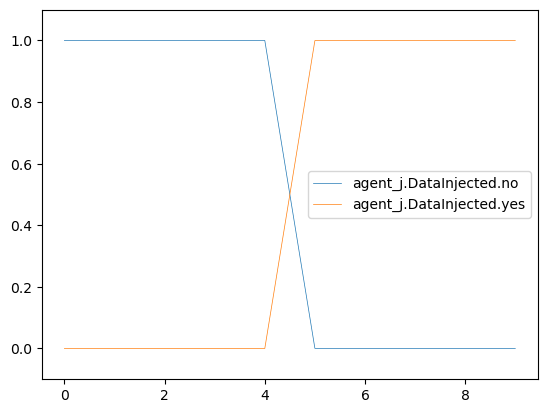

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

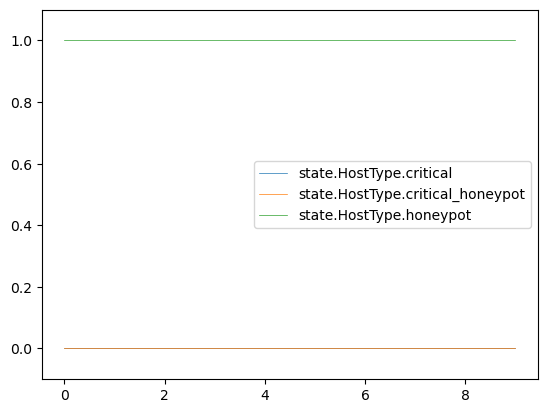

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

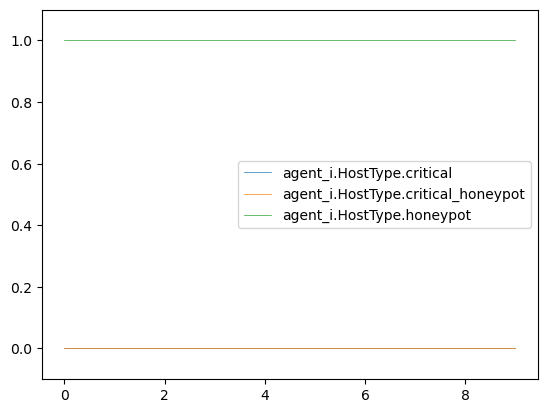

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.200000                                 0.0   
2                   0.037249                                 0.0   
3                   0.030311                                 0.0   
4                   0.007753                                 0.0   
5                   0.007752                                 0.0   
6                   0.007752                                 0.0   
7                   0.007752                                 0.0   
8                   0.007752                                 0.0   
9                   0.007752                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                   0.500000       FileRecon            Nop   
1                   0.800000    EnumAccounts            Nop   
2                   0.962751      PrivEscAcc            Nop   
3                   0.969689       FileRecon            Nop   
4                   0.992247  ManipulateData            Nop   
5                   0.992248            Exit            Nop   
6                   0.992248             Nop            Nop   
7                   0.992248             Nop            Nop   
8                   0.992248             Nop            Nop   
9                   0.992248             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

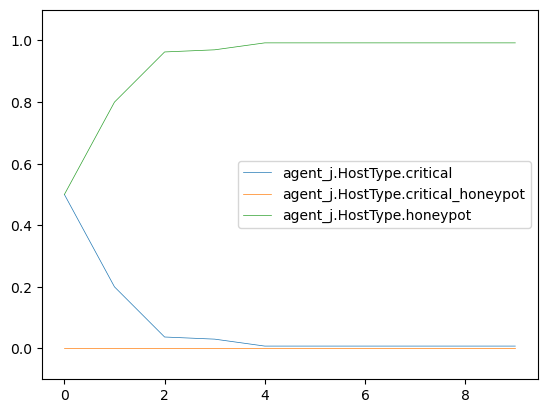

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

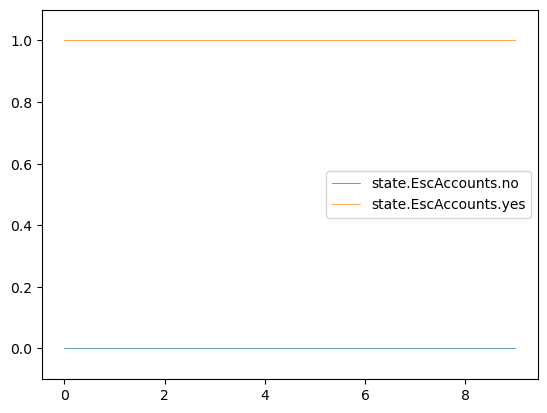

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

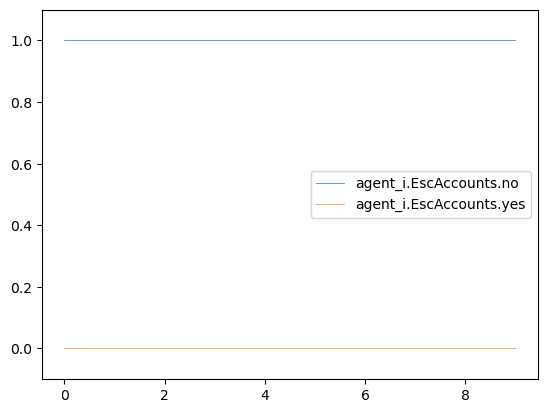

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.125358                 0.874642      PrivEscAcc   
3                0.000147                 0.999852       FileRecon   
4                0.000064                 0.999936  ManipulateData   
5                0.000034                 0.999966            Exit   
6                0.000034                 0.999966             Nop   
7                0.000034                 0.999966             Nop   
8                0.000034                 0.999966             Nop   
9                0.000034                 0.999966             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

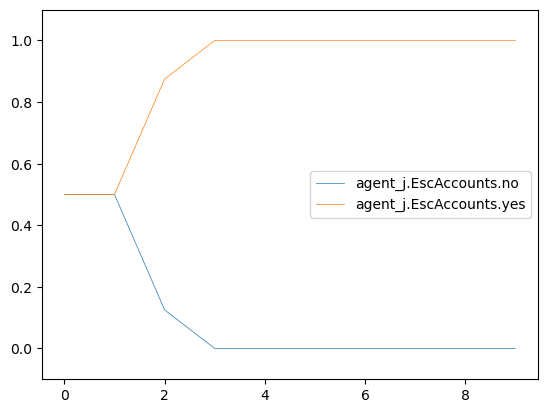

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

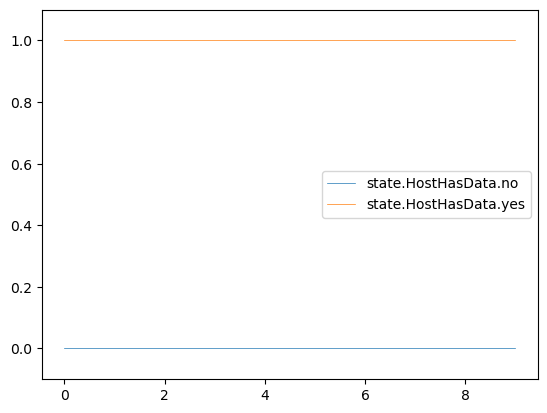

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

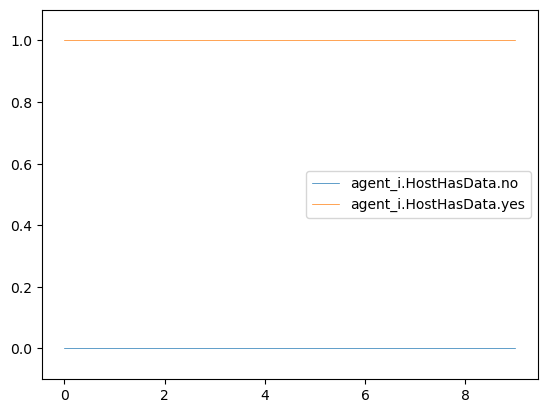

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.171249                 0.828751  ManipulateData   
5                0.000212                 0.999788            Exit   
6                0.000212                 0.999788             Nop   
7                0.000212                 0.999788             Nop   
8                0.000212                 0.999788             Nop   
9                0.000212                 0.999788             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

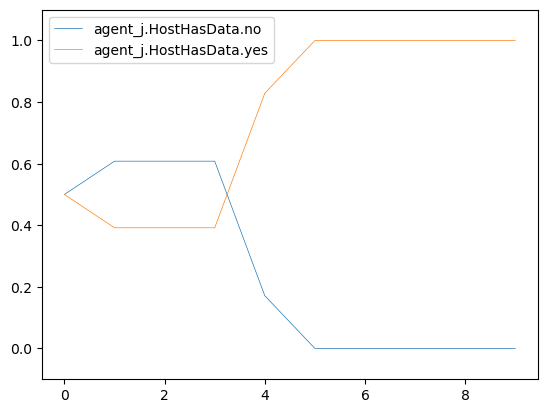

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

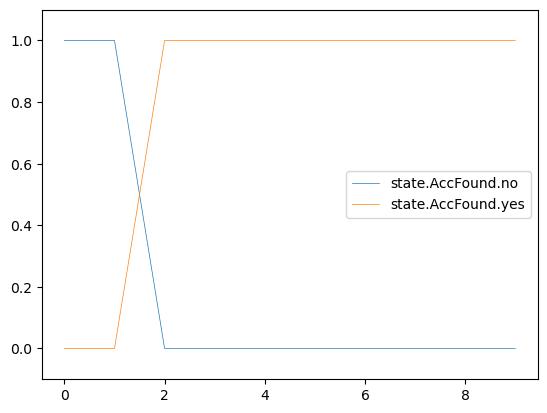

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop  ManipulateData   
5                  1.0                   0.0            Nop            Exit   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

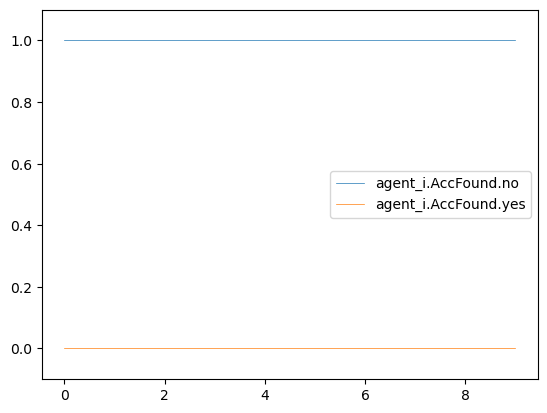

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.148997              0.851003      PrivEscAcc            Nop   
3             0.000175              0.999825       FileRecon            Nop   
4             0.000076              0.999924  ManipulateData            Nop   
5             0.000040              0.999960            Exit            Nop   
6             0.000040              0.999960             Nop            Nop   
7             0.000040              0.999960             Nop            Nop   
8             0.000040              0.999960             Nop            Nop   
9             0.000040              0.999960             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

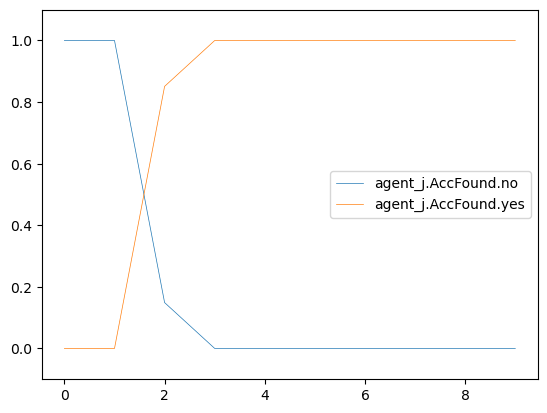

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

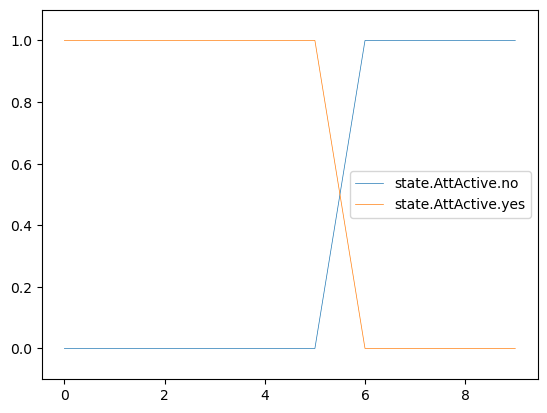

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.004147           9.958529e-01            Nop       FileRecon   
4              0.001106           9.988940e-01            Nop  ManipulateData   
5              0.084926           9.150736e-01            Nop            Exit   
6              0.999991           9.518424e-06            Nop             Nop   
7              1.000000           9.722522e-09            Nop             Nop   
8              1.000000           1.992509e-17            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

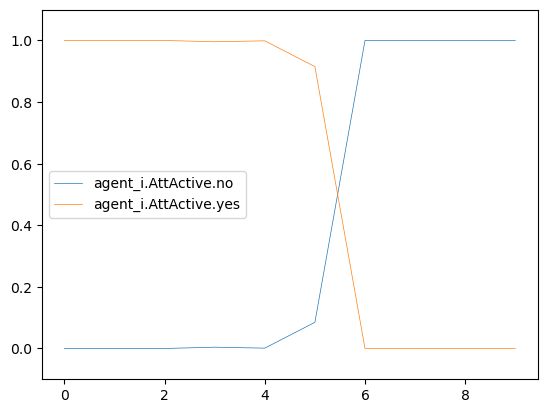

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

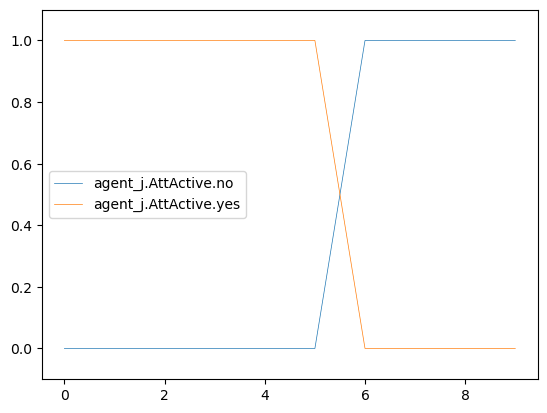

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

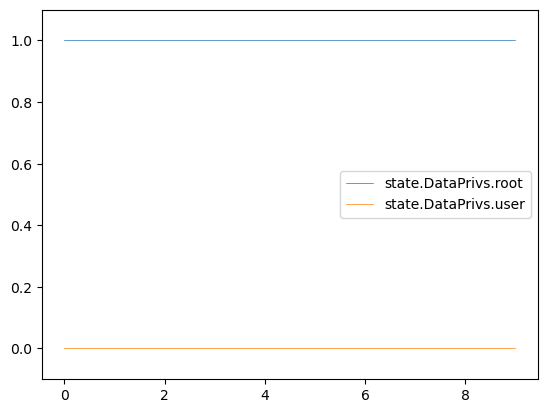

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

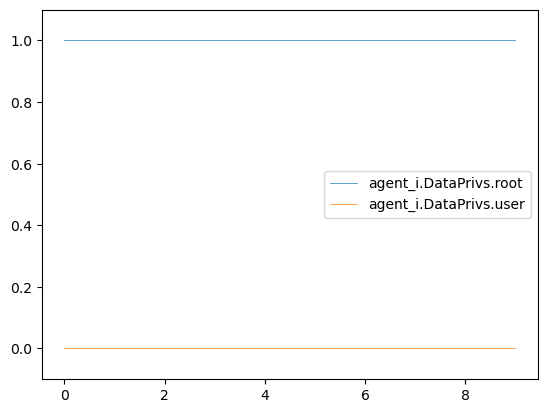

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.719152                0.280848  ManipulateData   
5                0.762627                0.237373            Exit   
6                0.762627                0.237373             Nop   
7                0.762627                0.237373             Nop   
8                0.762627                0.237373             Nop   
9                0.762627                0.237373             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

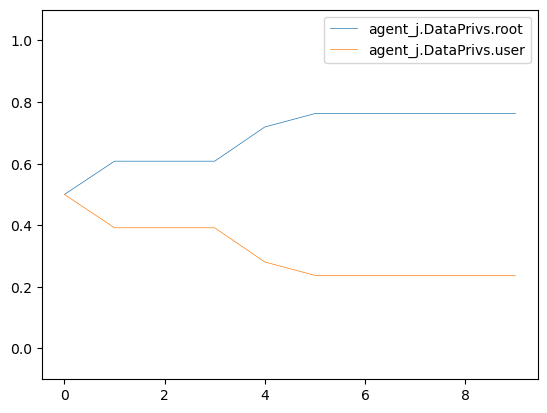

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

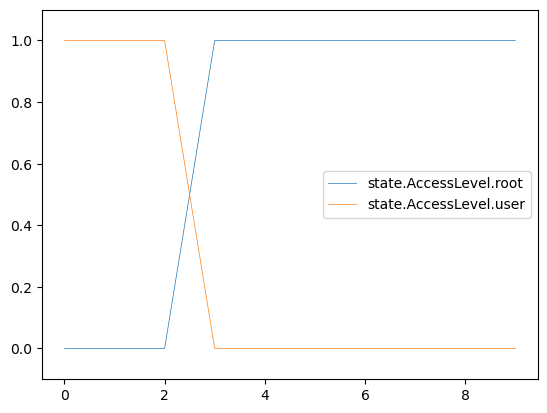

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

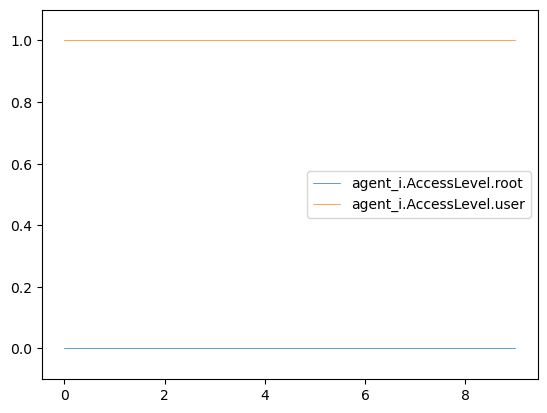

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999825                  0.000175       FileRecon   
4                  0.999924                  0.000076  ManipulateData   
5                  0.999960                  0.000040            Exit   
6                  0.999960                  0.000040             Nop   
7                  0.999960                  0.000040             Nop   
8                  0.999960                  0.000040             Nop   
9                  0.999960                  0.000040             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

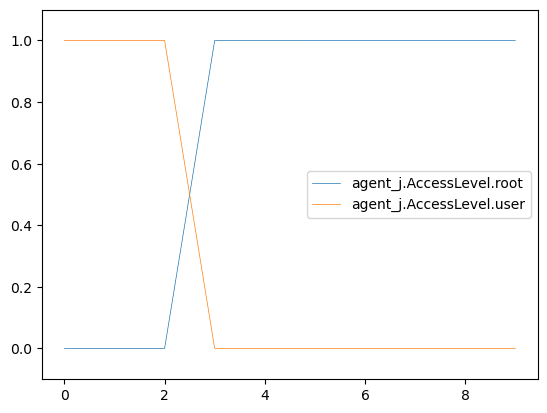

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

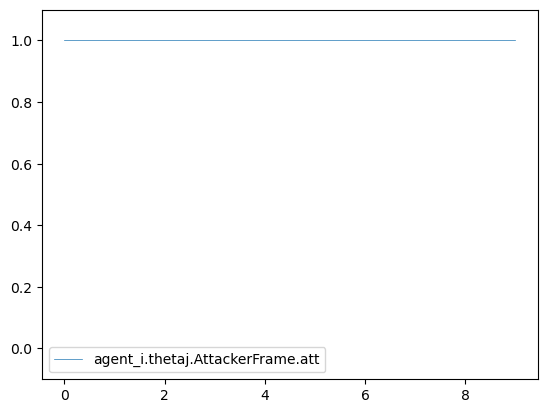

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                   user_files                           success

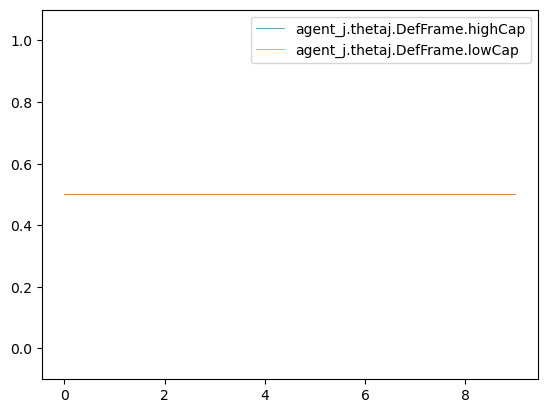

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop      FileRecon
2                 1.0                  0.0            Nop           Exit
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

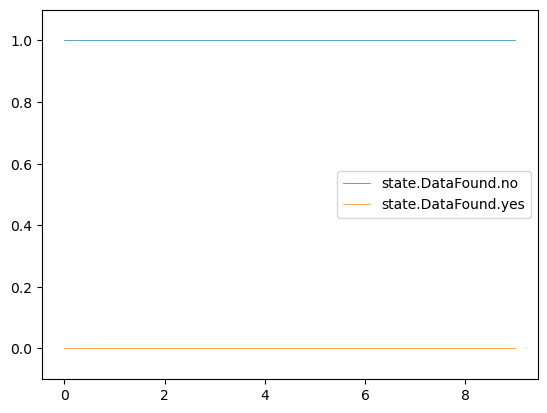

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0            Nop      FileRecon   
1                   1.0                    0.0            Nop      FileRecon   
2                   1.0                    0.0            Nop           Exit   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

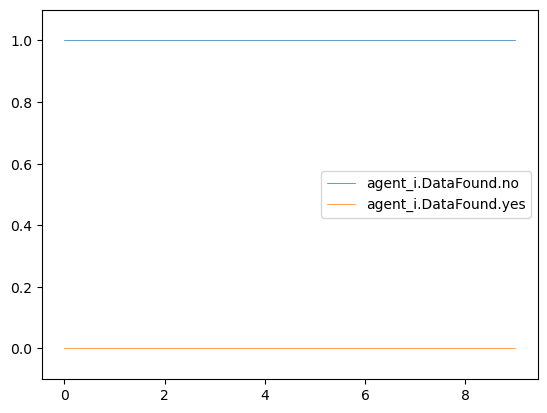

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.972973               0.027027      FileRecon            Nop   
2              0.990985               0.009015           Exit            Nop   
3              0.990985               0.009015            Nop            Nop   
4              0.990985               0.009015            Nop            Nop   
5              0.990985               0.009015            Nop            Nop   
6              0.990985               0.009015            Nop            Nop   
7              0.990985               0.009015            Nop            Nop   
8              0.990985               0.009015            Nop            Nop   
9              0.990985               0.009015            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                   user_files                           success

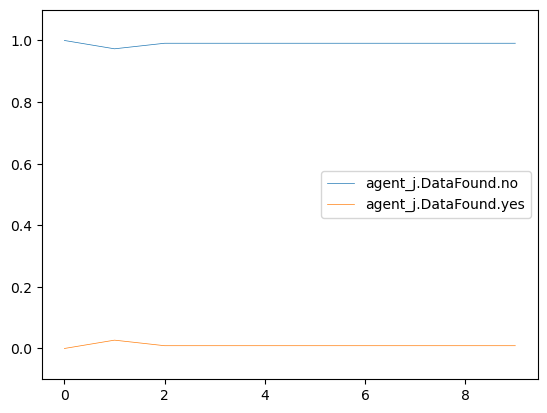

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop      FileRecon
2                    1.0                     0.0            Nop           Exit
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

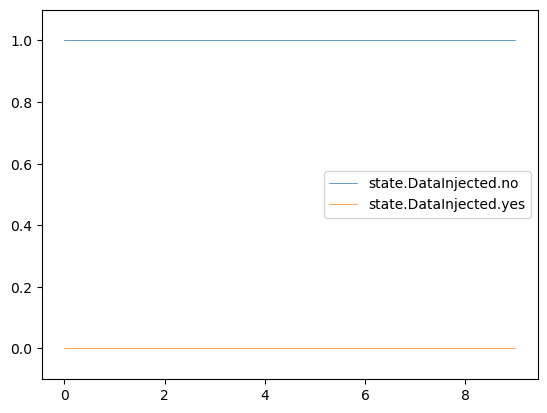

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

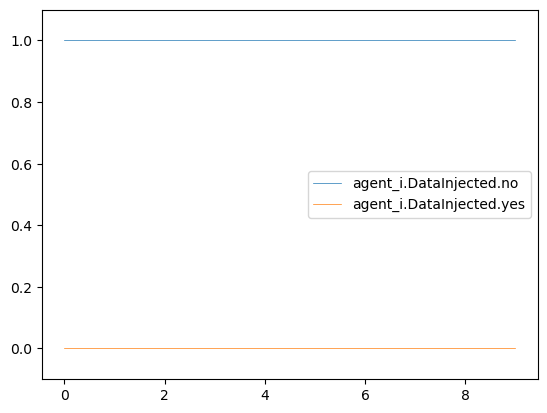

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0      FileRecon   
2                      1.0                       0.0           Exit   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

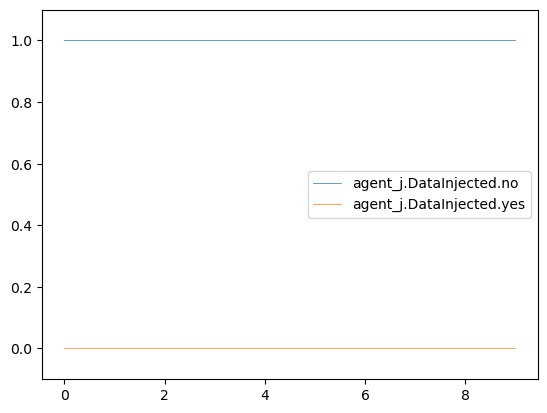

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop      FileRecon  
2                      1.0            Nop           Exit  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

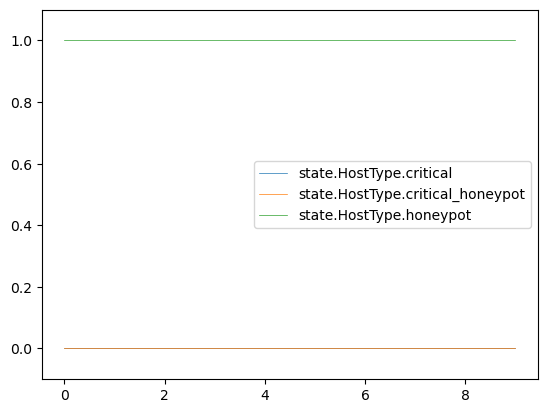

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop      FileRecon   
2                        1.0            Nop           Exit   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

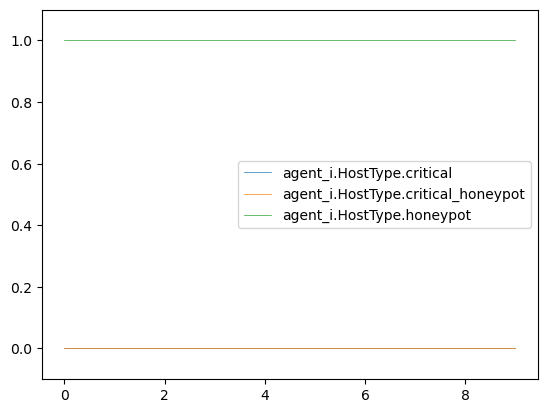

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.800000                                 0.0   
2                   0.941176                                 0.0   
3                   0.941176                                 0.0   
4                   0.941176                                 0.0   
5                   0.941176                                 0.0   
6                   0.941176                                 0.0   
7                   0.941176                                 0.0   
8                   0.941176                                 0.0   
9                   0.941176                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                   0.500000      FileRecon            Nop   
1                   0.200000      FileRecon            Nop   
2                   0.058824           Exit            Nop   
3                   0.058824            Nop            Nop   
4                   0.058824            Nop            Nop   
5                   0.058824            Nop            Nop   
6                   0.058824            Nop            Nop   
7                   0.058824            Nop            Nop   
8                   0.058824            Nop            Nop   
9                   0.058824            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                   user_files                           success

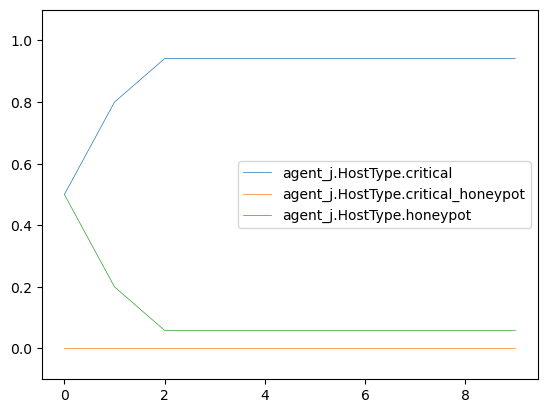

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop      FileRecon
2                   0.0                    1.0            Nop           Exit
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

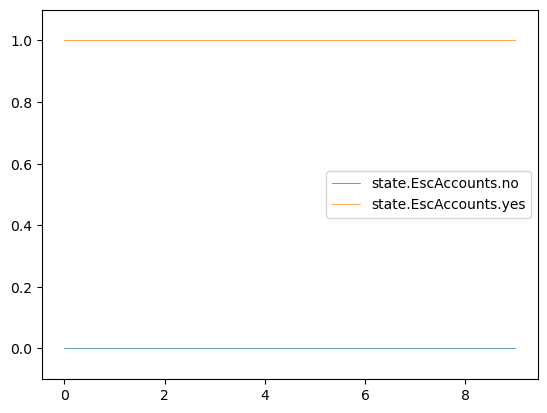

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

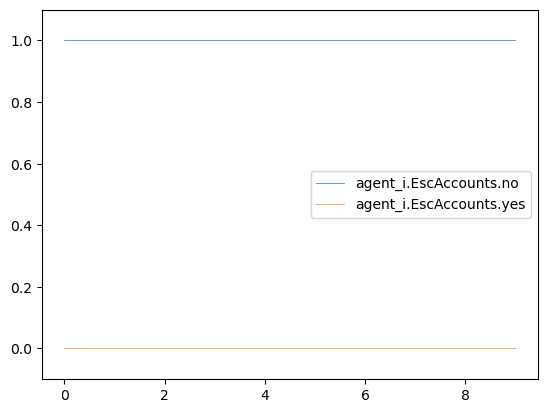

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000      FileRecon   
2                0.735294                 0.264706           Exit   
3                0.735294                 0.264706            Nop   
4                0.735294                 0.264706            Nop   
5                0.735294                 0.264706            Nop   
6                0.735294                 0.264706            Nop   
7                0.735294                 0.264706            Nop   
8                0.735294                 0.264706            Nop   
9                0.735294                 0.264706            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

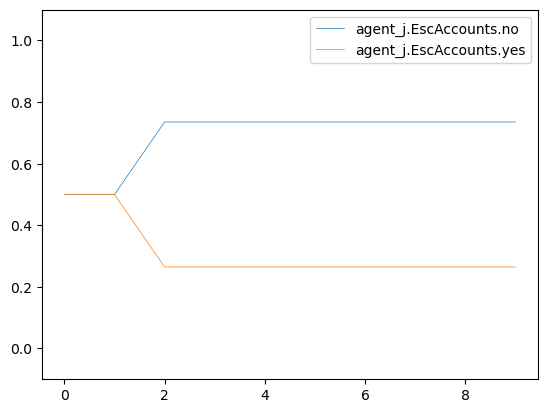

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop      FileRecon
2                   0.0                    1.0            Nop           Exit
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

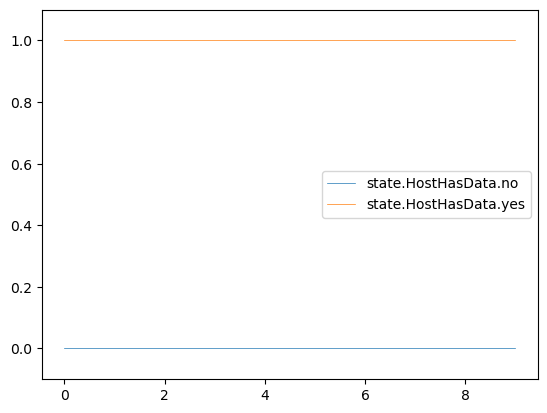

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

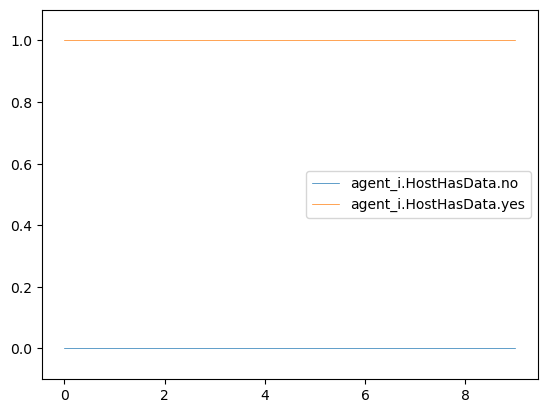

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.608108                 0.391892      FileRecon   
2                0.651964                 0.348036           Exit   
3                0.651964                 0.348036            Nop   
4                0.651964                 0.348036            Nop   
5                0.651964                 0.348036            Nop   
6                0.651964                 0.348036            Nop   
7                0.651964                 0.348036            Nop   
8                0.651964                 0.348036            Nop   
9                0.651964                 0.348036            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

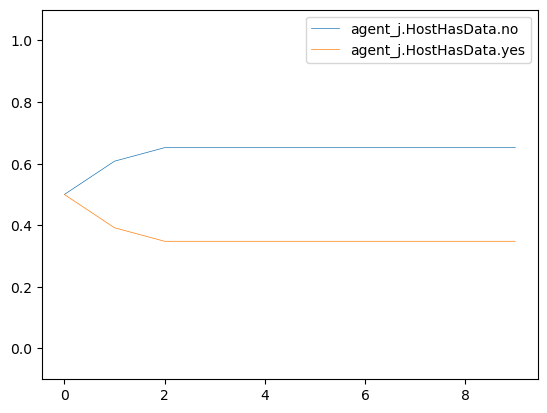

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop      FileRecon
2                1.0                 0.0            Nop           Exit
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

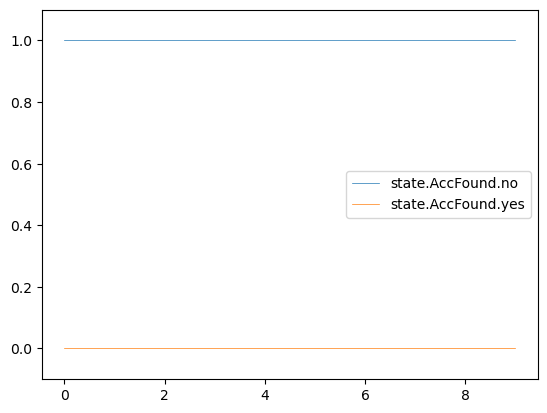

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0            Nop      FileRecon   
1                  1.0                   0.0            Nop      FileRecon   
2                  1.0                   0.0            Nop           Exit   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

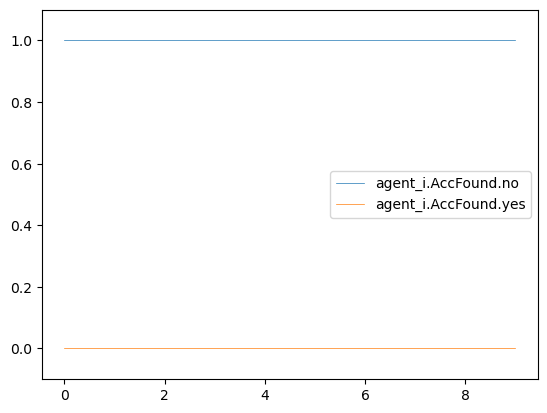

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon            Nop   
1                  1.0                   0.0      FileRecon            Nop   
2                  1.0                   0.0           Exit            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                   user_files                           success

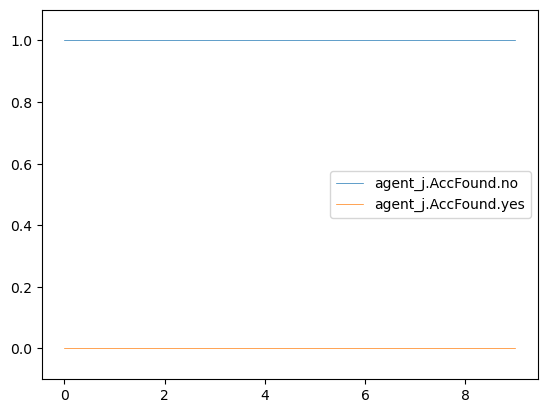

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop      FileRecon
2                 0.0                  1.0            Nop           Exit
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

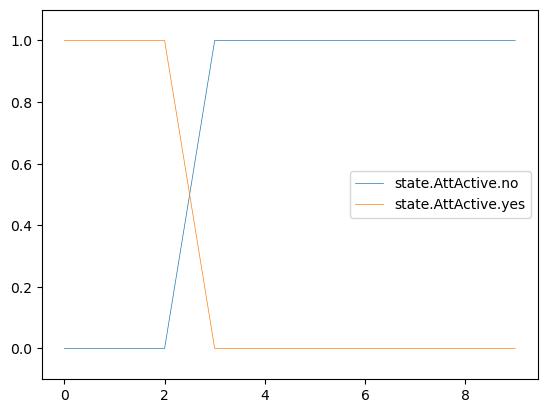

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00            Nop      FileRecon   
1              0.000000           1.000000e+00            Nop      FileRecon   
2              0.000000           1.000000e+00            Nop           Exit   
3              0.783467           2.165333e-01            Nop            Nop   
4              0.999598           4.024900e-04            Nop            Nop   
5              1.000000           2.056555e-07            Nop            Nop   
6              1.000000           1.050357e-11            Nop            Nop   
7              1.000000           9.358759e-15            Nop            Nop   
8              1.000000           3.934708e-18            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

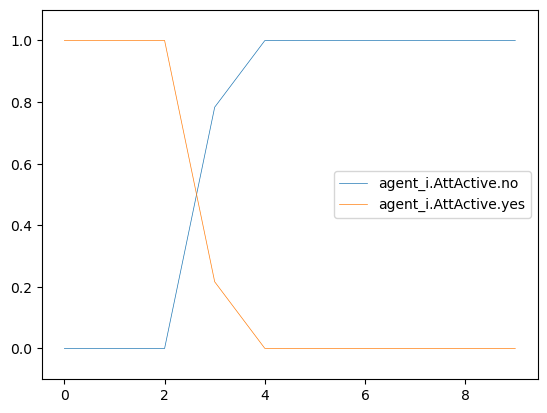

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0      FileRecon            Nop   
2                   0.0                    1.0           Exit            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                   user_files                           success

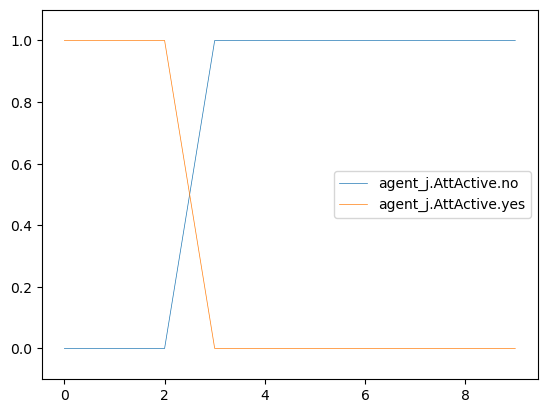

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop      FileRecon
2                   1.0                   0.0            Nop           Exit
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

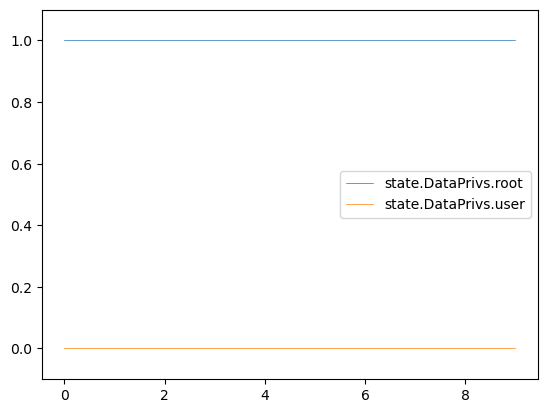

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

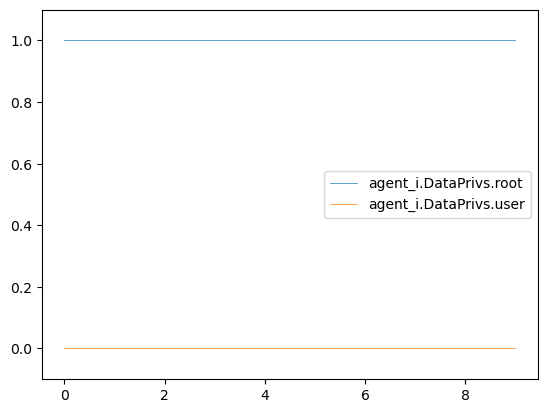

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.608108                0.391892      FileRecon   
2                0.651964                0.348036           Exit   
3                0.651964                0.348036            Nop   
4                0.651964                0.348036            Nop   
5                0.651964                0.348036            Nop   
6                0.651964                0.348036            Nop   
7                0.651964                0.348036            Nop   
8                0.651964                0.348036            Nop   
9                0.651964                0.348036            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

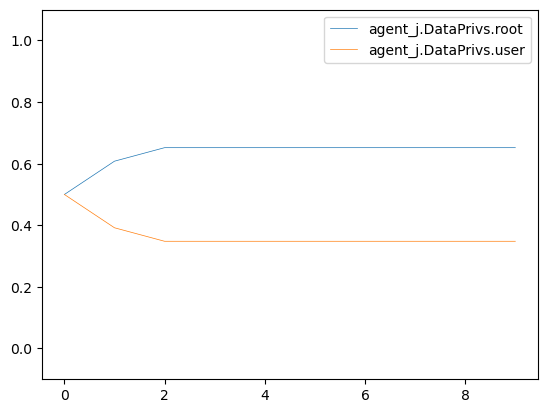

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1      FileRecon  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

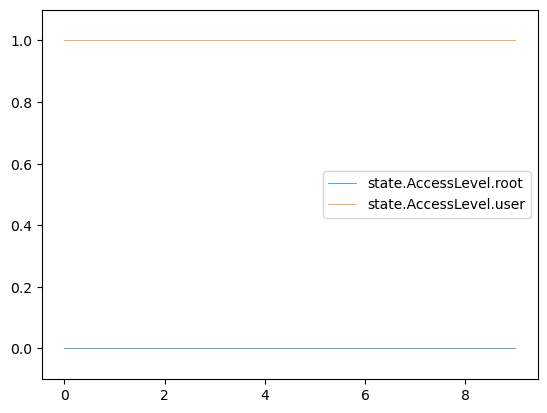

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

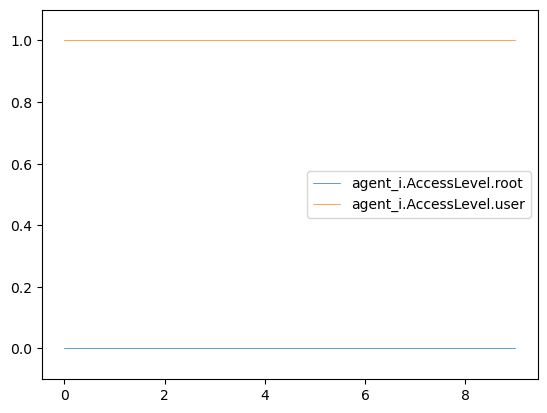

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0      FileRecon   
2                       0.0                       1.0           Exit   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

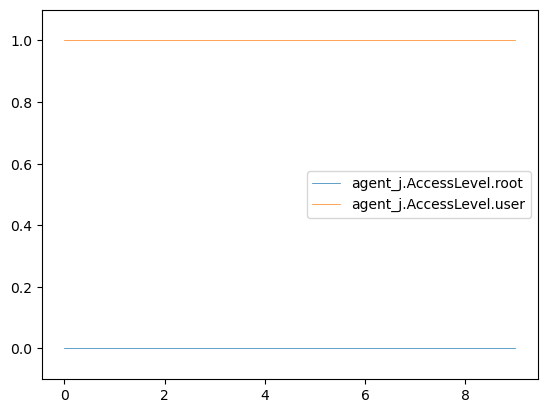

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

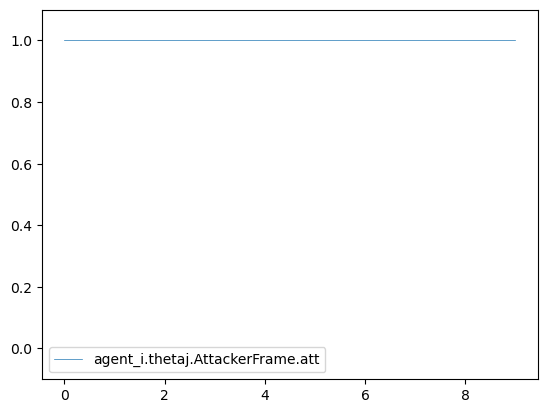

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.488539                        0.511461   
3                         0.484853                        0.515147   
4                         0.496125                        0.503875   
5                         0.499026                        0.500974   
6                         0.499025                        0.500975   
7                         0.499025                        0.500975   
8                         0.499025                        0.500975   
9                         0.499025                        0.500975   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

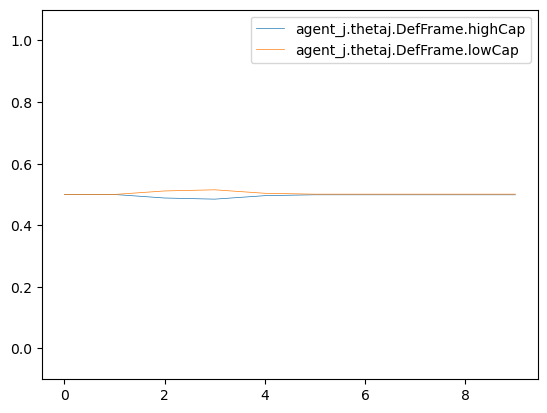

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

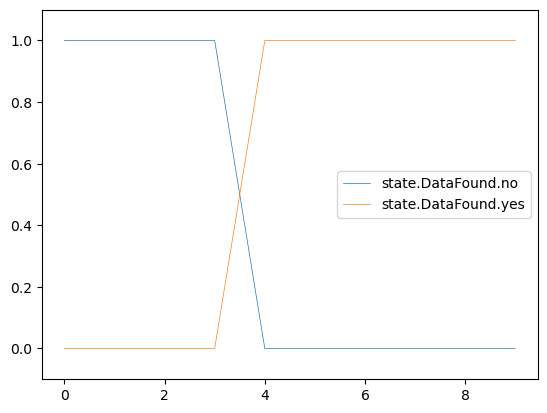

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop       FileRecon   
5                   1.0                    0.0            Nop  ManipulateData   
6                   1.0                    0.0            Nop            Exit   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

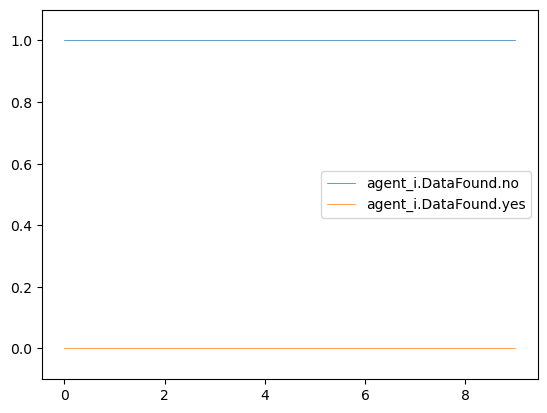

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.950554               0.049446       FileRecon            Nop   
5              0.424518               0.575482  ManipulateData            Nop   
6              0.000738               0.999262            Exit            Nop   
7              0.000738               0.999262             Nop            Nop   
8              0.000738               0.999262             Nop            Nop   
9              0.000738               0.999262             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

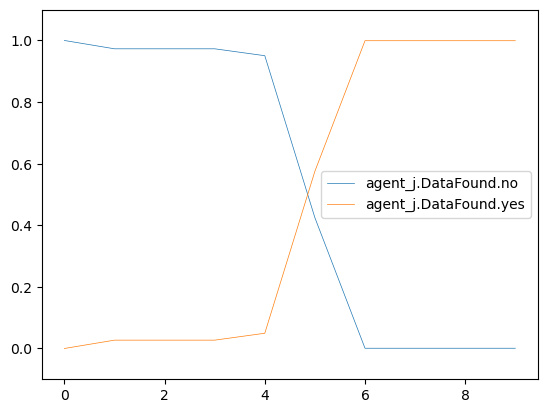

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

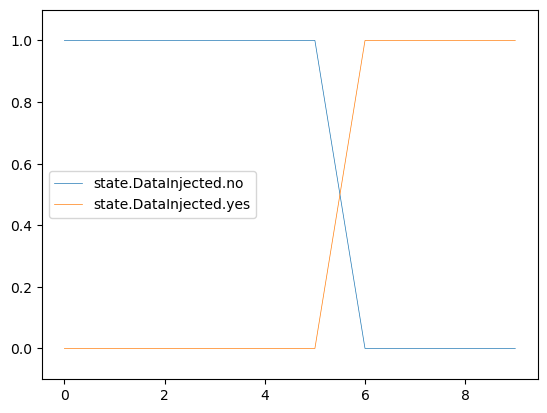

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

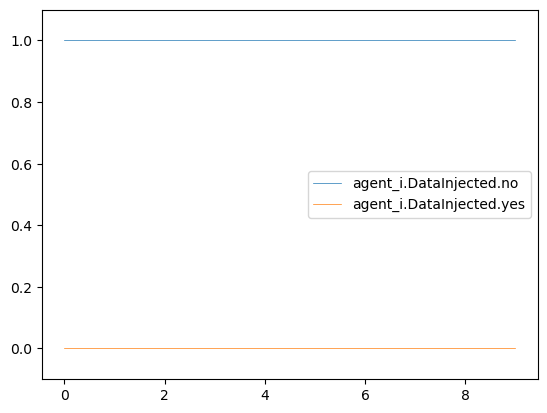

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.000738                  0.999262            Exit   
7                 0.000738                  0.999262             Nop   
8                 0.000738                  0.999262             Nop   
9                 0.000738                  0.999262             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

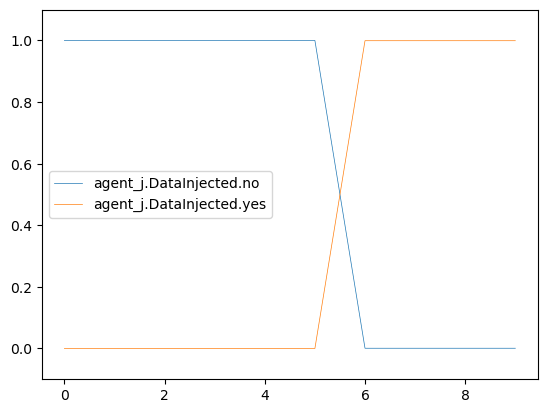

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop  ManipulateData  
6                      1.0            Nop            Exit  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

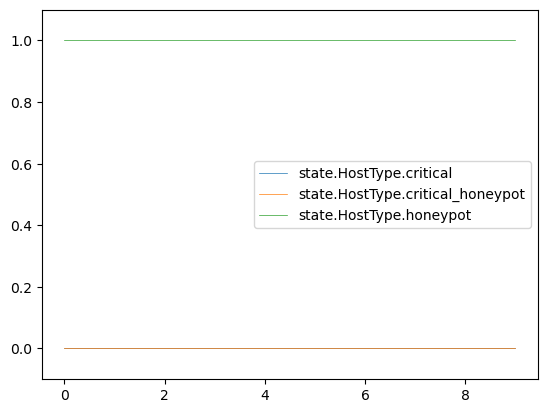

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop  ManipulateData   
6                        1.0            Nop            Exit   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

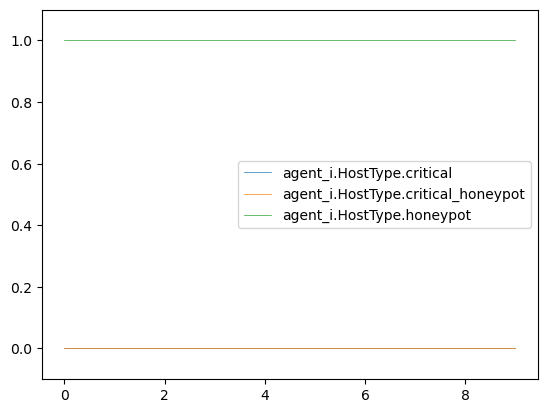

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.200000                                 0.0   
2                   0.037249                                 0.0   
3                   0.030311                                 0.0   
4                   0.007755                                 0.0   
5                   0.001950                                 0.0   
6                   0.001949                                 0.0   
7                   0.001949                                 0.0   
8                   0.001949                                 0.0   
9                   0.001949                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                   0.500000       FileRecon            Nop   
1                   0.800000    EnumAccounts            Nop   
2                   0.962751      PrivEscAcc            Nop   
3                   0.969689       FileRecon            Nop   
4                   0.992245       FileRecon            Nop   
5                   0.998050  ManipulateData            Nop   
6                   0.998051            Exit            Nop   
7                   0.998051             Nop            Nop   
8                   0.998051             Nop            Nop   
9                   0.998051             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

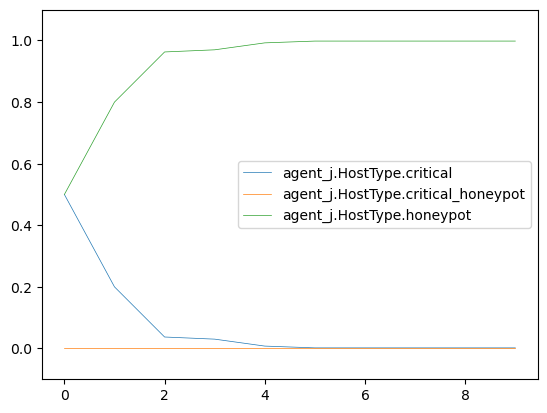

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

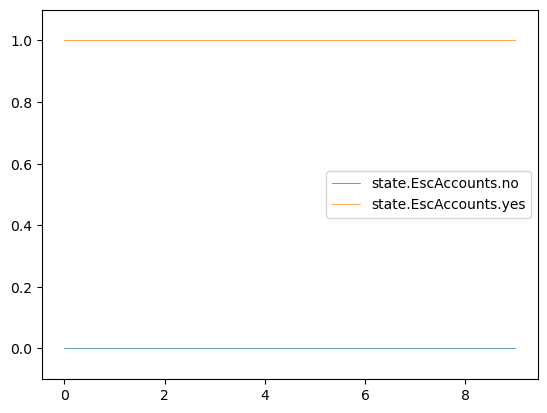

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

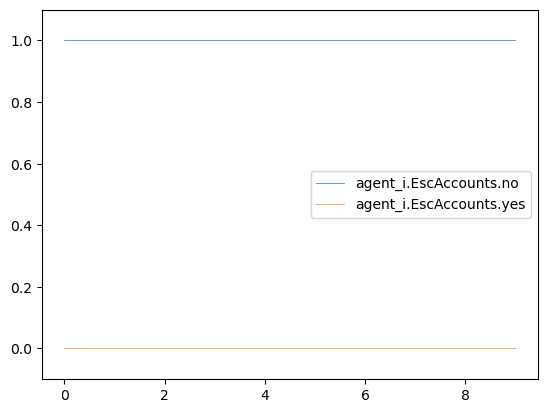

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.125358                 0.874642      PrivEscAcc   
3                0.000147                 0.999852       FileRecon   
4                0.000184                 0.999816       FileRecon   
5                0.000103                 0.999897  ManipulateData   
6                0.000027                 0.999973            Exit   
7                0.000027                 0.999973             Nop   
8                0.000027                 0.999973             Nop   
9                0.000027                 0.999973             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

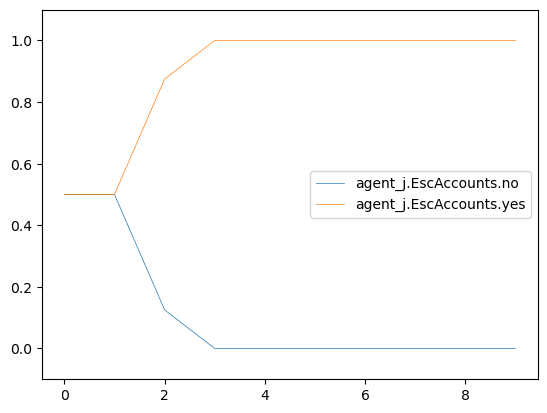

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

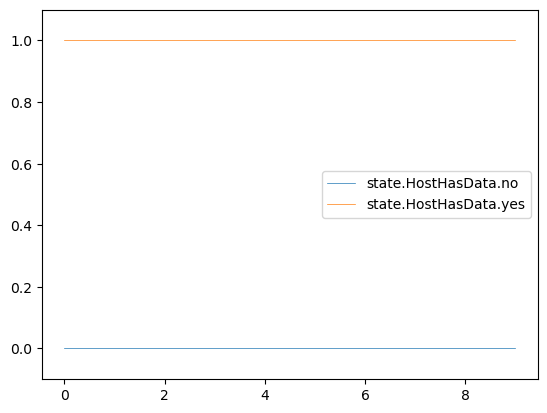

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

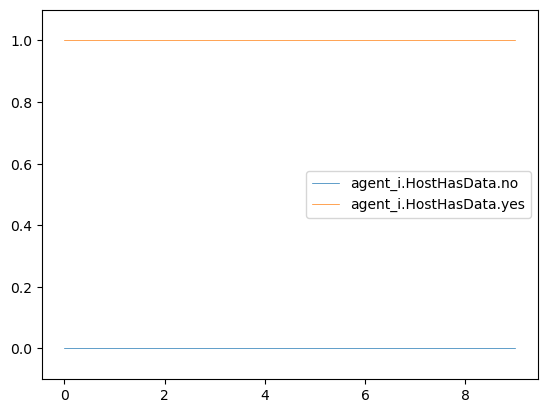

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.848657                 0.151343       FileRecon   
5                0.414536                 0.585464  ManipulateData   
6                0.000721                 0.999280            Exit   
7                0.000721                 0.999280             Nop   
8                0.000721                 0.999280             Nop   
9                0.000721                 0.999280             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

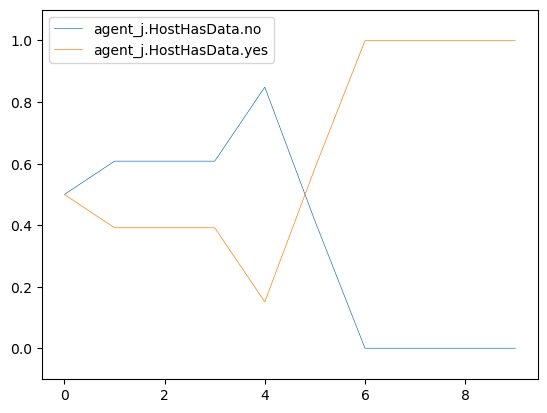

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop  ManipulateData
6                0.0                 1.0            Nop            Exit
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

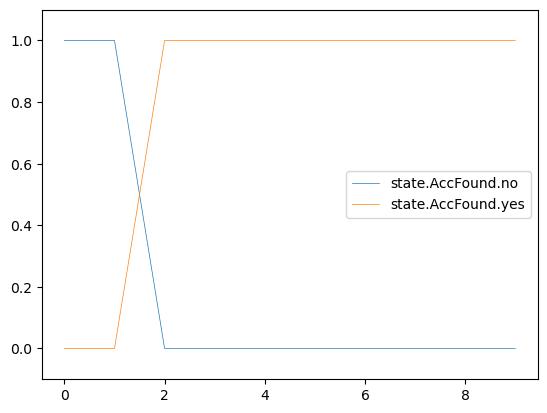

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop       FileRecon   
5                  1.0                   0.0            Nop  ManipulateData   
6                  1.0                   0.0            Nop            Exit   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

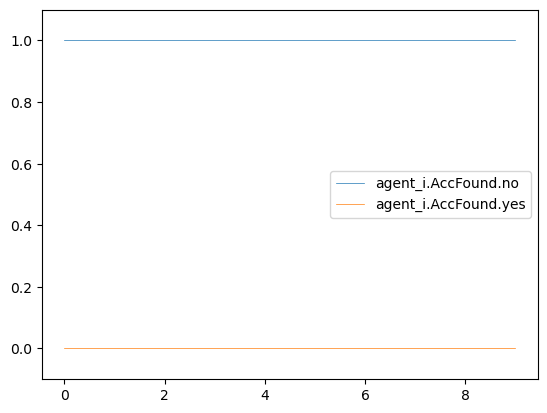

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.148997              0.851003      PrivEscAcc            Nop   
3             0.000175              0.999825       FileRecon            Nop   
4             0.000220              0.999780       FileRecon            Nop   
5             0.000123              0.999877  ManipulateData            Nop   
6             0.000033              0.999968            Exit            Nop   
7             0.000033              0.999968             Nop            Nop   
8             0.000033              0.999968             Nop            Nop   
9             0.000033              0.999968             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

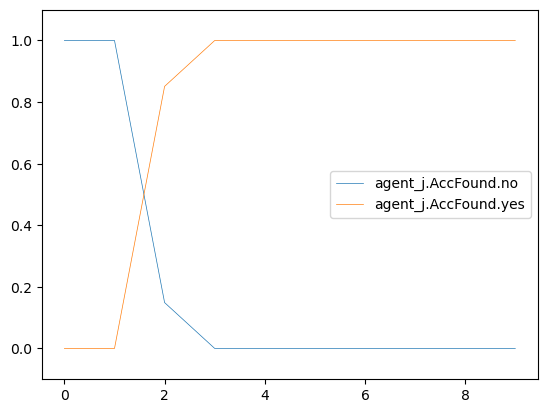

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

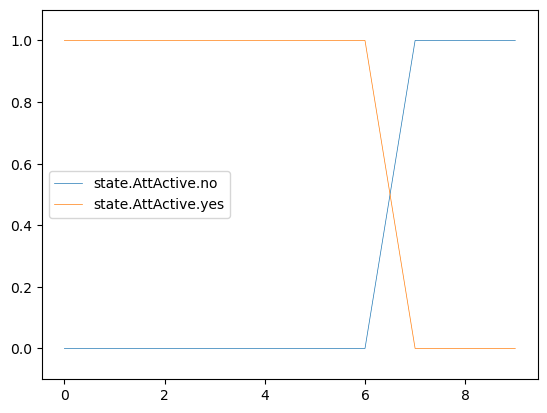

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.004108           9.958923e-01            Nop       FileRecon   
4              0.001092           9.989079e-01            Nop       FileRecon   
5              0.827557           1.724428e-01            Nop  ManipulateData   
6              0.559410           4.405898e-01            Nop            Exit   
7              1.000000           2.223036e-07            Nop             Nop   
8              1.000000           1.732251e-10            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

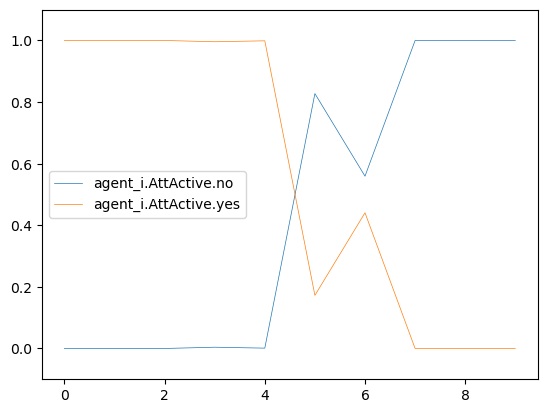

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0  ManipulateData            Nop   
6                   0.0                    1.0            Exit            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

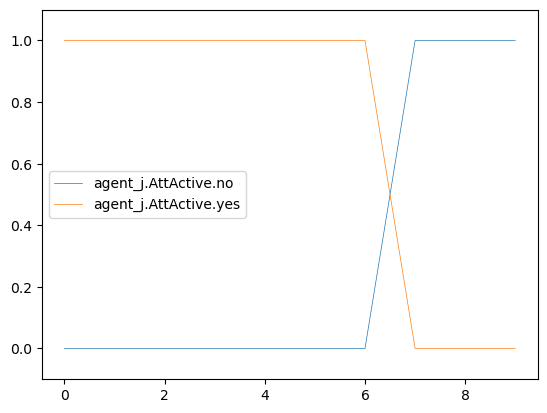

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop  ManipulateData
6                   1.0                   0.0            Nop            Exit
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

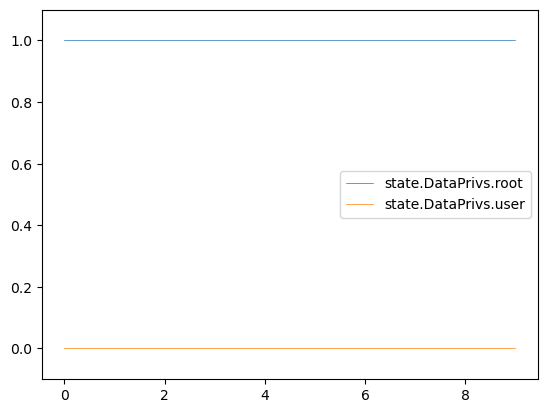

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

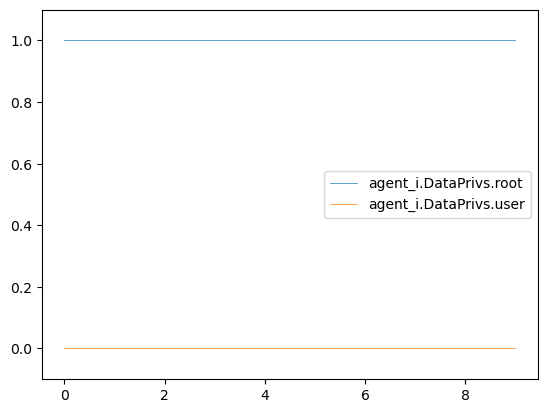

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.546964                0.453036       FileRecon   
5                0.679794                0.320206  ManipulateData   
6                0.806412                0.193588            Exit   
7                0.806412                0.193588             Nop   
8                0.806412                0.193588             Nop   
9                0.806412                0.193588             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

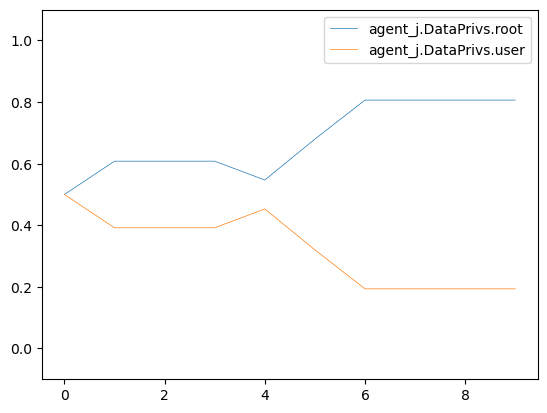

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

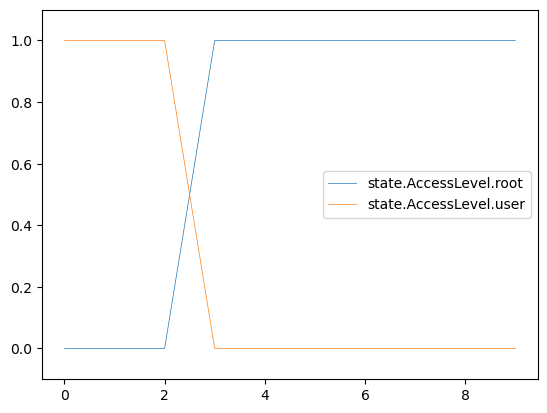

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

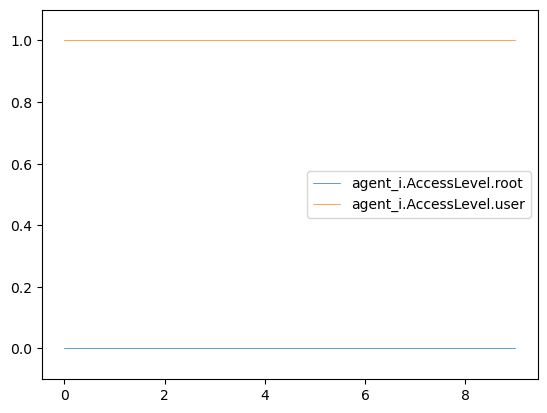

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999825                  0.000175       FileRecon   
4                  0.999780                  0.000220       FileRecon   
5                  0.999877                  0.000123  ManipulateData   
6                  0.999968                  0.000033            Exit   
7                  0.999968                  0.000033             Nop   
8                  0.999968                  0.000033             Nop   
9                  0.999968                  0.000033             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

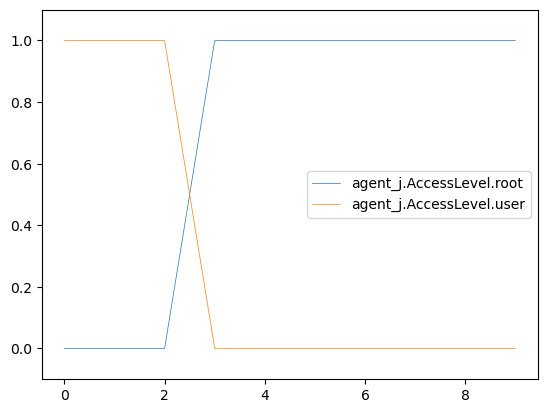

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

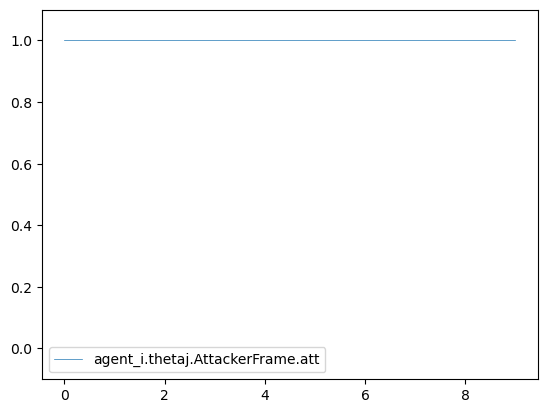

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.488539                        0.511461   
3                         0.484853                        0.515147   
4                         0.496125                        0.503876   
5                         0.496124                        0.503876   
6                         0.496124                        0.503876   
7                         0.496124                        0.503876   
8                         0.496124                        0.503876   
9                         0.496124                        0.503876   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                         none                           failure

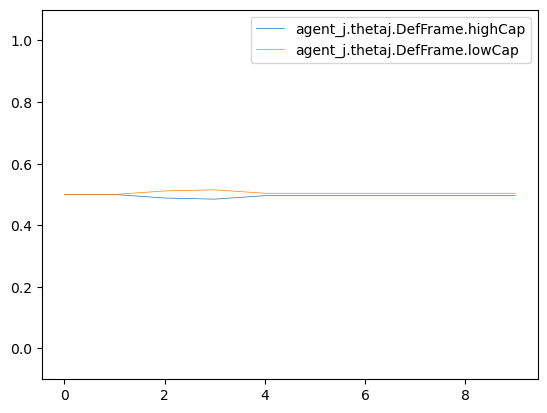

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

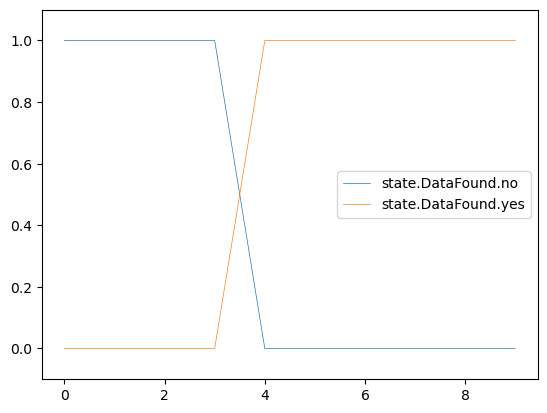

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop  ManipulateData   
5                   1.0                    0.0            Nop            Exit   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

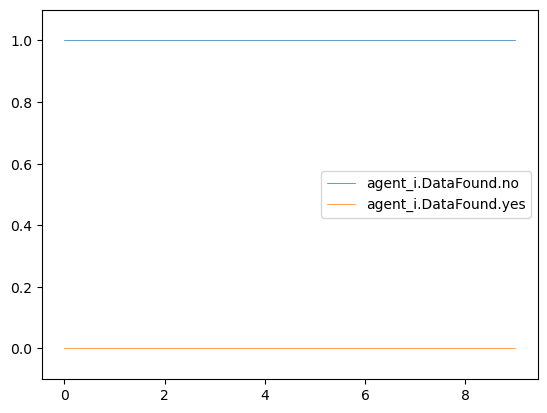

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.191810               0.808190  ManipulateData            Nop   
5              0.000238               0.999763            Exit            Nop   
6              0.000238               0.999763             Nop            Nop   
7              0.000238               0.999763             Nop            Nop   
8              0.000238               0.999763             Nop            Nop   
9              0.000238               0.999763             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                         none                           failure

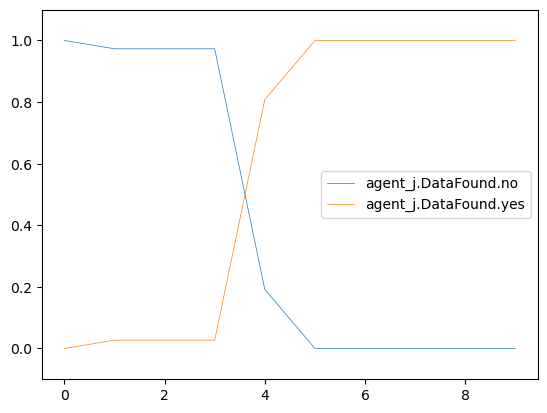

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

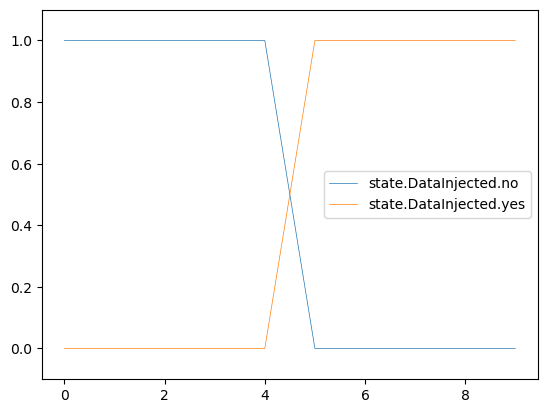

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

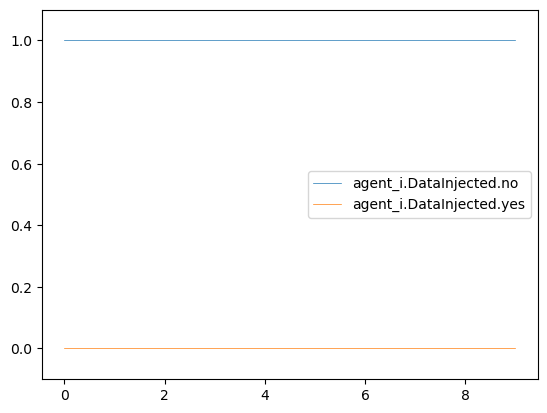

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000238                  0.999763            Exit   
6                 0.000238                  0.999763             Nop   
7                 0.000238                  0.999763             Nop   
8                 0.000238                  0.999763             Nop   
9                 0.000238                  0.999763             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           failure

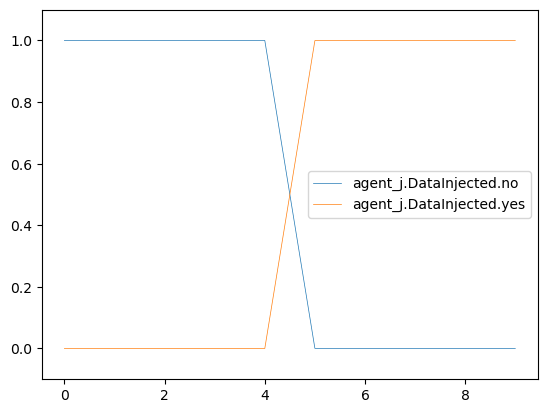

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

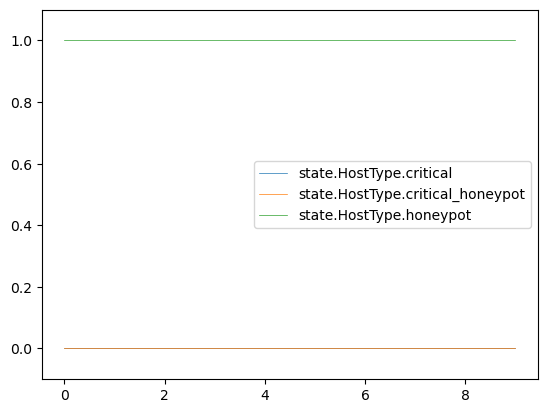

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

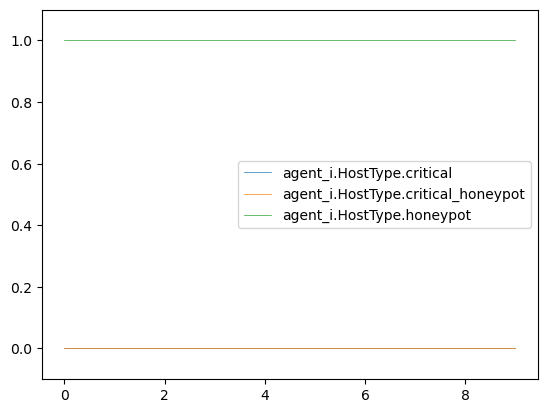

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.200000                                 0.0   
2                   0.037249                                 0.0   
3                   0.030311                                 0.0   
4                   0.007753                                 0.0   
5                   0.007752                                 0.0   
6                   0.007752                                 0.0   
7                   0.007752                                 0.0   
8                   0.007752                                 0.0   
9                   0.007752                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                   0.500000       FileRecon            Nop   
1                   0.800000    EnumAccounts            Nop   
2                   0.962751      PrivEscAcc            Nop   
3                   0.969689       FileRecon            Nop   
4                   0.992247  ManipulateData            Nop   
5                   0.992248            Exit            Nop   
6                   0.992248             Nop            Nop   
7                   0.992248             Nop            Nop   
8                   0.992248             Nop            Nop   
9                   0.992248             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                         none                           failure

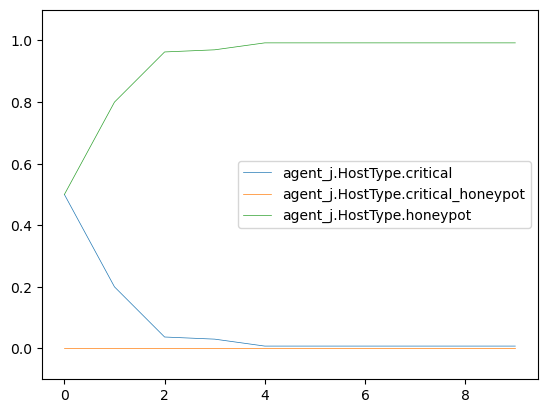

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

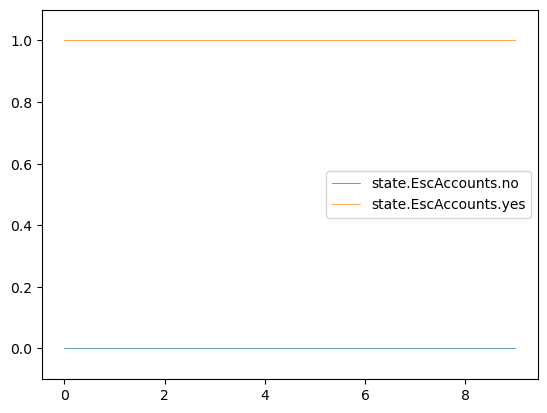

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

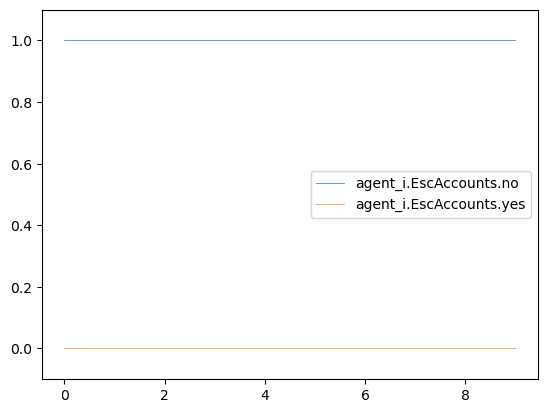

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.125358                 0.874642      PrivEscAcc   
3                0.000147                 0.999852       FileRecon   
4                0.000064                 0.999936  ManipulateData   
5                0.000034                 0.999966            Exit   
6                0.000034                 0.999966             Nop   
7                0.000034                 0.999966             Nop   
8                0.000034                 0.999966             Nop   
9                0.000034                 0.999966             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           failure

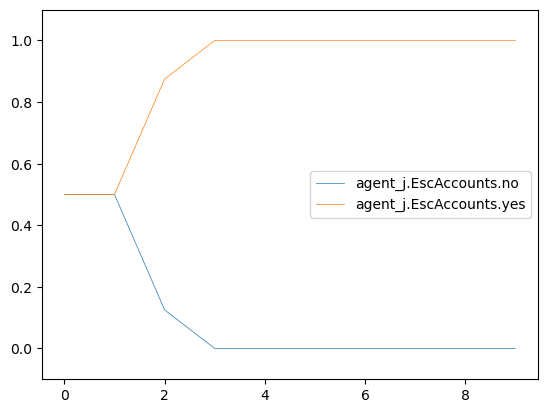

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

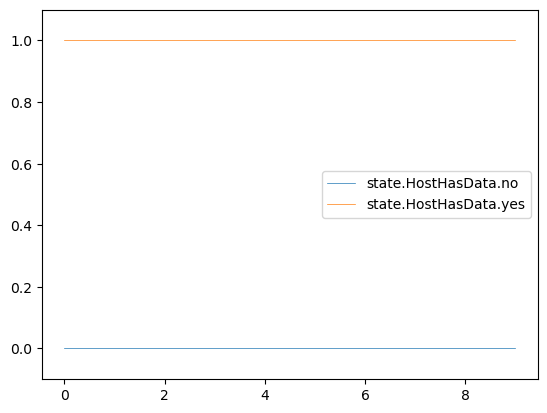

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

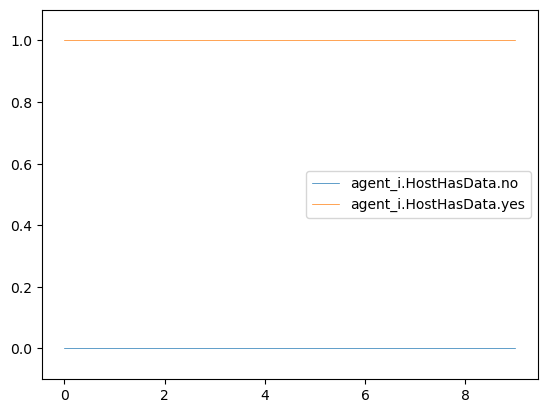

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.171249                 0.828751  ManipulateData   
5                0.000212                 0.999788            Exit   
6                0.000212                 0.999788             Nop   
7                0.000212                 0.999788             Nop   
8                0.000212                 0.999788             Nop   
9                0.000212                 0.999788             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           failure

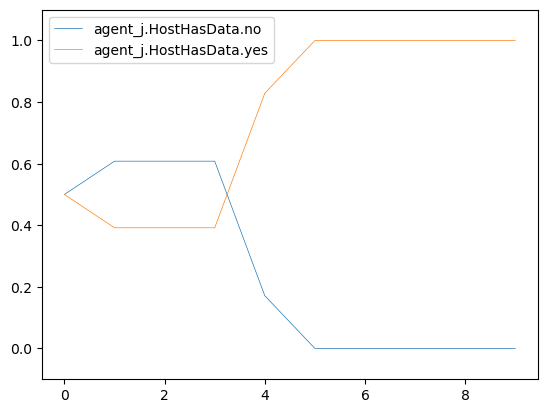

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

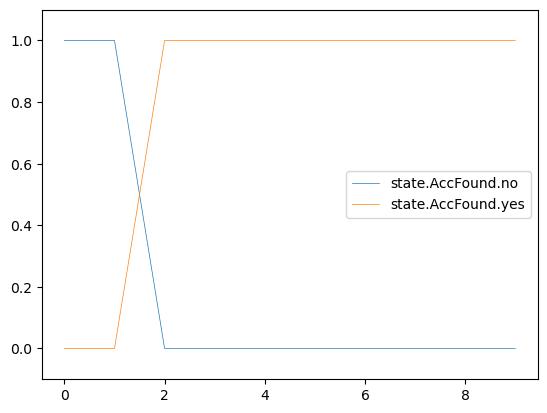

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop  ManipulateData   
5                  1.0                   0.0            Nop            Exit   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

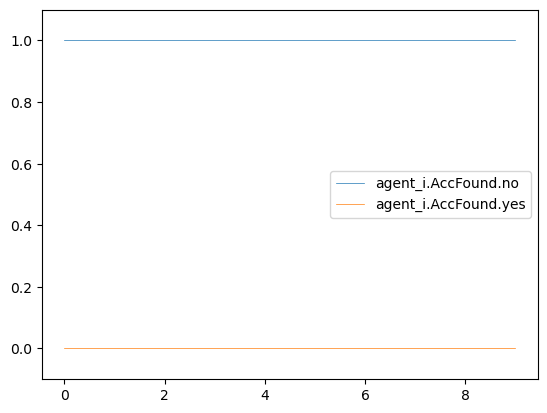

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.148997              0.851003      PrivEscAcc            Nop   
3             0.000175              0.999825       FileRecon            Nop   
4             0.000076              0.999924  ManipulateData            Nop   
5             0.000040              0.999960            Exit            Nop   
6             0.000040              0.999960             Nop            Nop   
7             0.000040              0.999960             Nop            Nop   
8             0.000040              0.999960             Nop            Nop   
9             0.000040              0.999960             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                         none                           failure

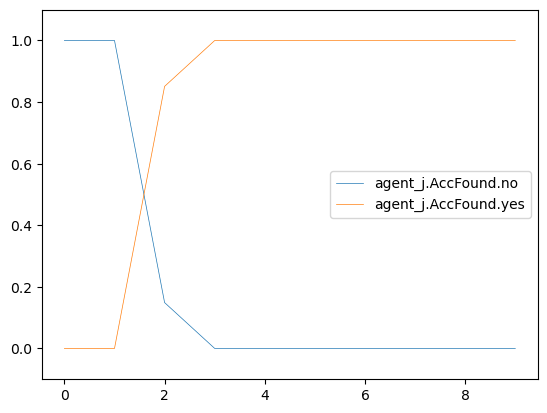

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

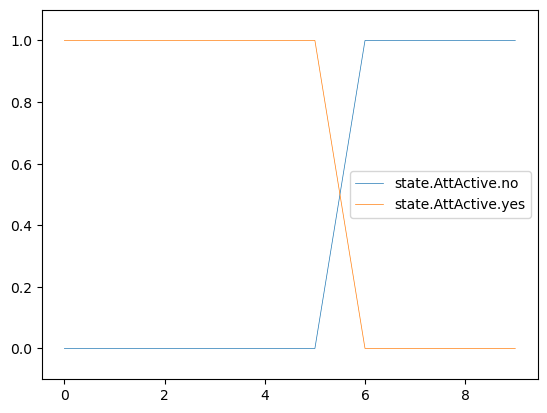

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.004147           9.958529e-01            Nop       FileRecon   
4              0.001106           9.988940e-01            Nop  ManipulateData   
5              0.084926           9.150736e-01            Nop            Exit   
6              0.999991           9.518424e-06            Nop             Nop   
7              1.000000           9.722522e-09            Nop             Nop   
8              1.000000           1.992509e-17            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

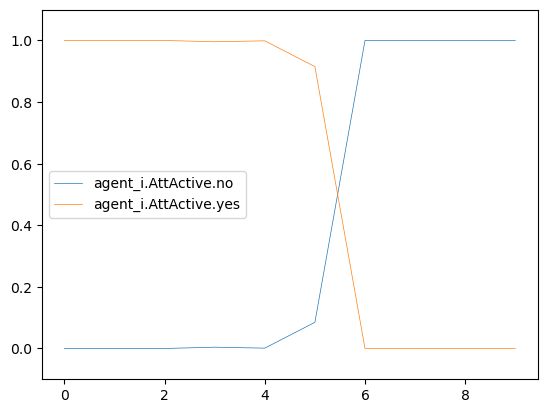

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                         none                           failure

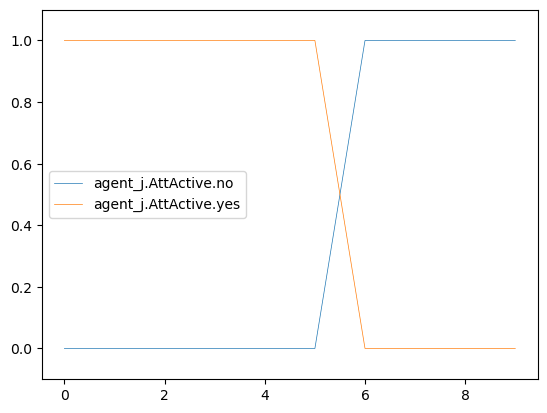

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

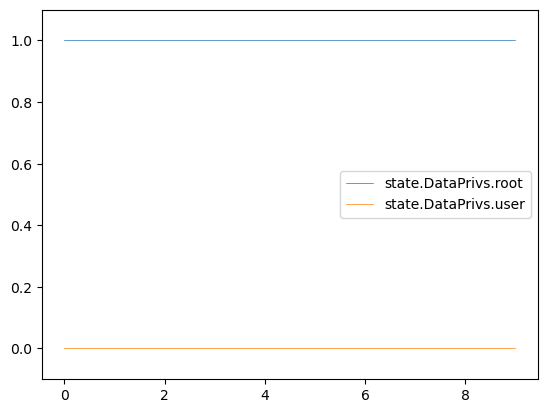

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

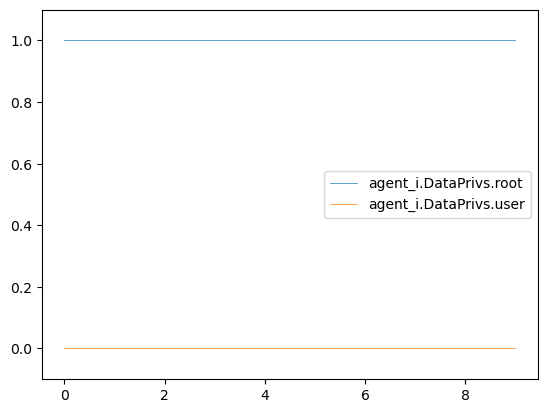

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.719152                0.280848  ManipulateData   
5                0.762627                0.237373            Exit   
6                0.762627                0.237373             Nop   
7                0.762627                0.237373             Nop   
8                0.762627                0.237373             Nop   
9                0.762627                0.237373             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           failure

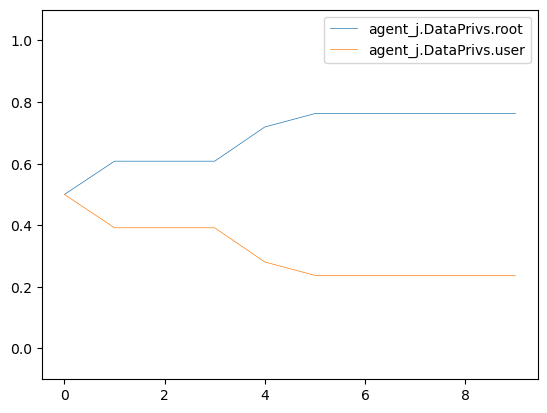

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

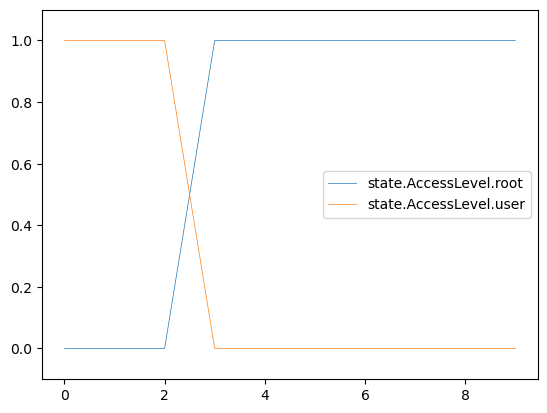

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

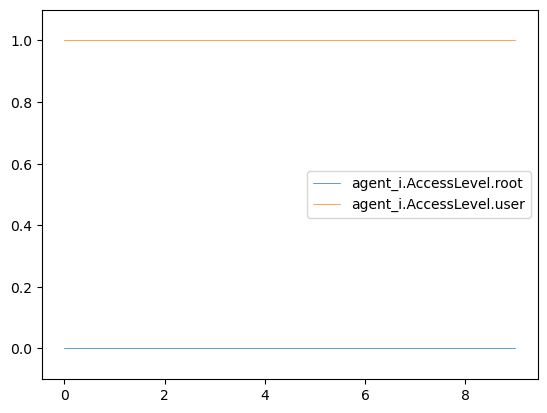

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999825                  0.000175       FileRecon   
4                  0.999924                  0.000076  ManipulateData   
5                  0.999960                  0.000040            Exit   
6                  0.999960                  0.000040             Nop   
7                  0.999960                  0.000040             Nop   
8                  0.999960                  0.000040             Nop   
9                  0.999960                  0.000040             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           failure

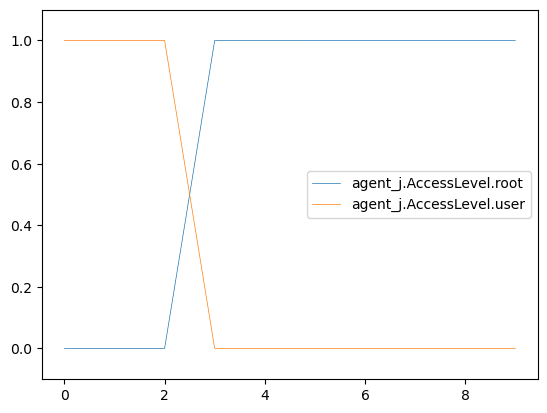

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

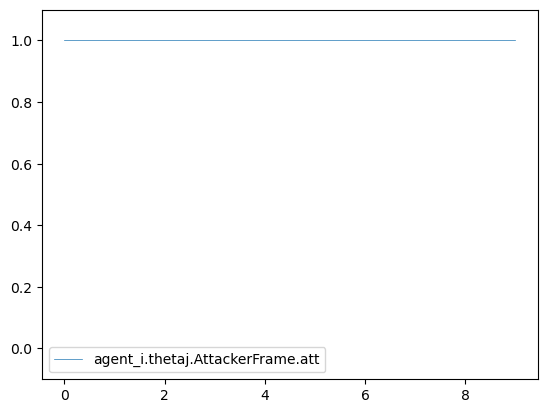

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.488539                        0.511461   
3                         0.484853                        0.515147   
4                         0.496125                        0.503875   
5                         0.499026                        0.500974   
6                         0.499026                        0.500974   
7                         0.499026                        0.500974   
8                         0.499026                        0.500974   
9                         0.499026                        0.500974   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           failure

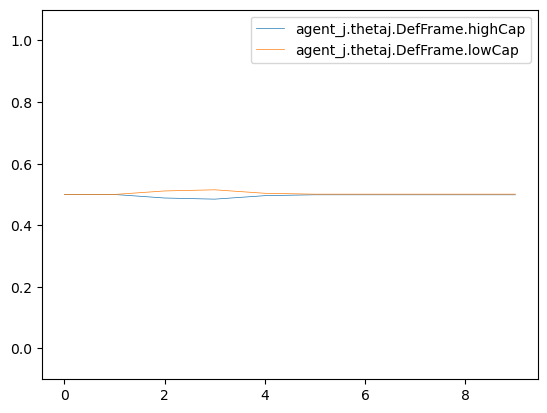

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop   EnumAccounts
2                 1.0                  0.0            Nop     PrivEscAcc
3                 1.0                  0.0            Nop      FileRecon
4                 1.0                  0.0            Nop      FileRecon
5                 0.0                  1.0            Nop           Exit
6                 0.0                  1.0            Nop            Nop
7                 0.0                  1.0            Nop            Nop
8                 0.0                  1.0            Nop            Nop
9                 0.0                  1.0            Nop            Nop

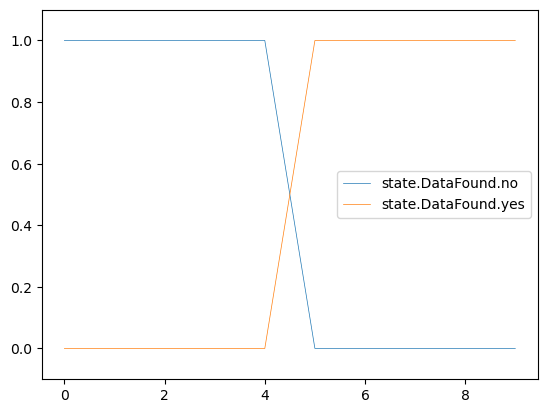

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0            Nop      FileRecon   
1                   1.0                    0.0            Nop   EnumAccounts   
2                   1.0                    0.0            Nop     PrivEscAcc   
3                   1.0                    0.0            Nop      FileRecon   
4                   1.0                    0.0            Nop      FileRecon   
5                   1.0                    0.0            Nop           Exit   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

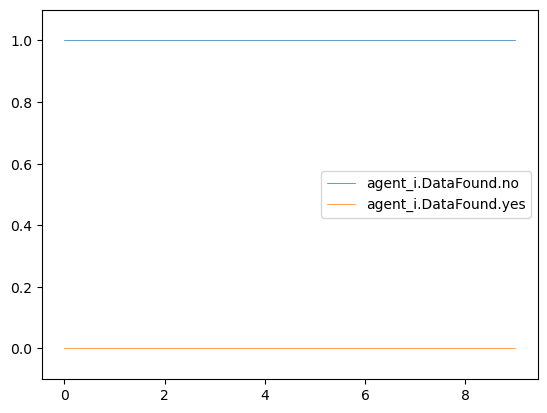

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.972973               0.027027   EnumAccounts            Nop   
2              0.972973               0.027027     PrivEscAcc            Nop   
3              0.972973               0.027027      FileRecon            Nop   
4              0.950554               0.049446      FileRecon            Nop   
5              0.983539               0.016460           Exit            Nop   
6              0.983540               0.016460            Nop            Nop   
7              0.983540               0.016460            Nop            Nop   
8              0.983540               0.016460            Nop            Nop   
9              0.983540               0.016460            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           failure

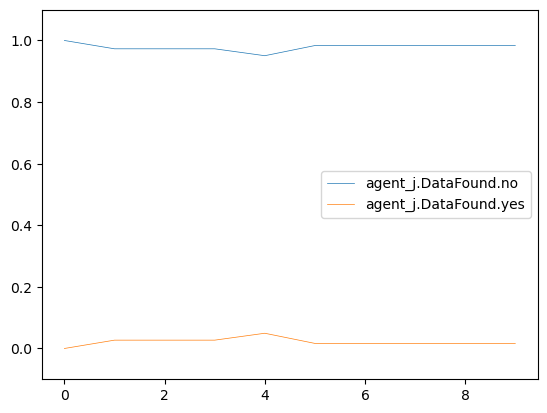

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop   EnumAccounts
2                    1.0                     0.0            Nop     PrivEscAcc
3                    1.0                     0.0            Nop      FileRecon
4                    1.0                     0.0            Nop      FileRecon
5                    1.0                     0.0            Nop           Exit
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

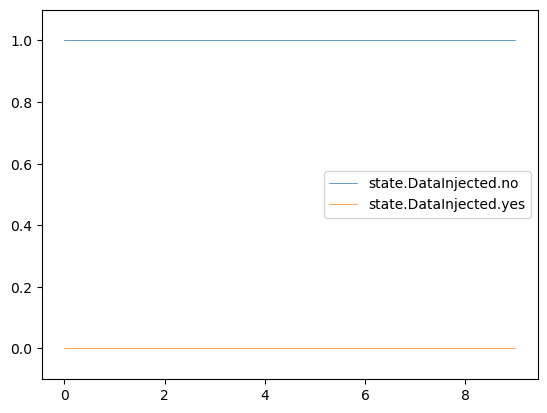

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3      FileRecon                        file_enum  
4      FileRecon                        file_enum  
5           Exit                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

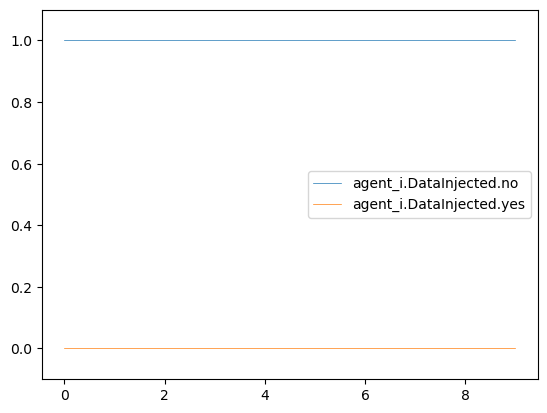

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0      FileRecon   
5                      1.0                       0.0           Exit   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

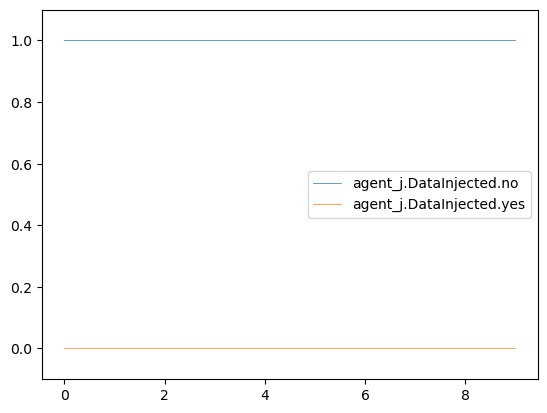

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop   EnumAccounts  
2                      1.0            Nop     PrivEscAcc  
3                      1.0            Nop      FileRecon  
4                      1.0            Nop      FileRecon  
5                      1.0            Nop           Exit  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

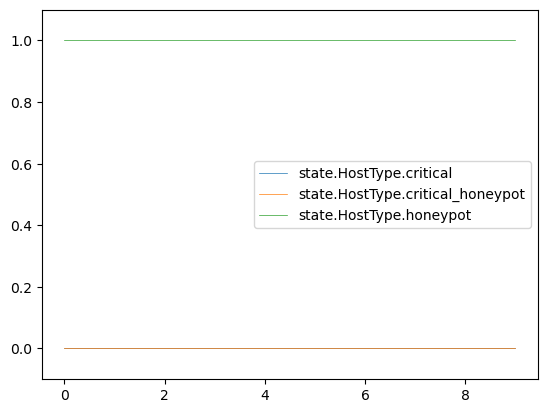

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop   EnumAccounts   
2                        1.0            Nop     PrivEscAcc   
3                        1.0            Nop      FileRecon   
4                        1.0            Nop      FileRecon   
5                        1.0            Nop           Exit   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

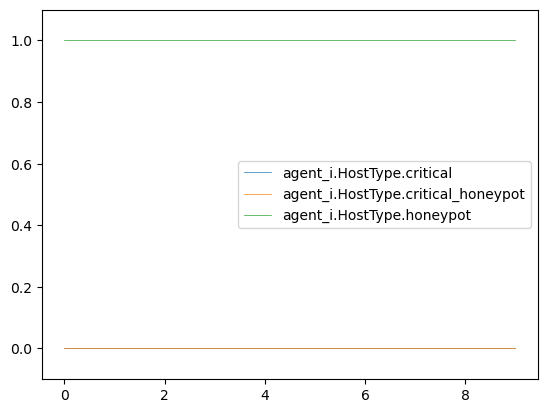

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.200000                                 0.0   
2                   0.037249                                 0.0   
3                   0.030311                                 0.0   
4                   0.007755                                 0.0   
5                   0.001950                                 0.0   
6                   0.001950                                 0.0   
7                   0.001950                                 0.0   
8                   0.001950                                 0.0   
9                   0.001950                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                   0.500000      FileRecon            Nop   
1                   0.800000   EnumAccounts            Nop   
2                   0.962751     PrivEscAcc            Nop   
3                   0.969689      FileRecon            Nop   
4                   0.992245      FileRecon            Nop   
5                   0.998050           Exit            Nop   
6                   0.998050            Nop            Nop   
7                   0.998050            Nop            Nop   
8                   0.998050            Nop            Nop   
9                   0.998050            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           failure

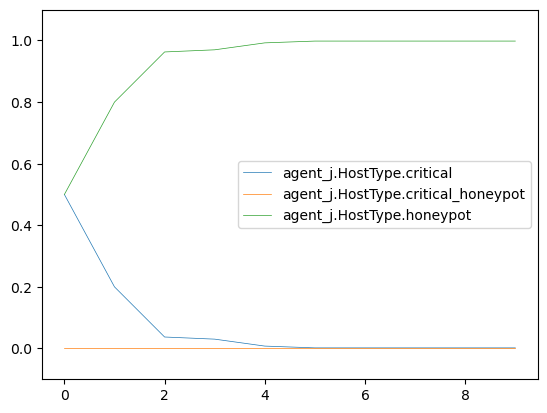

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop   EnumAccounts
2                   0.0                    1.0            Nop     PrivEscAcc
3                   0.0                    1.0            Nop      FileRecon
4                   0.0                    1.0            Nop      FileRecon
5                   0.0                    1.0            Nop           Exit
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

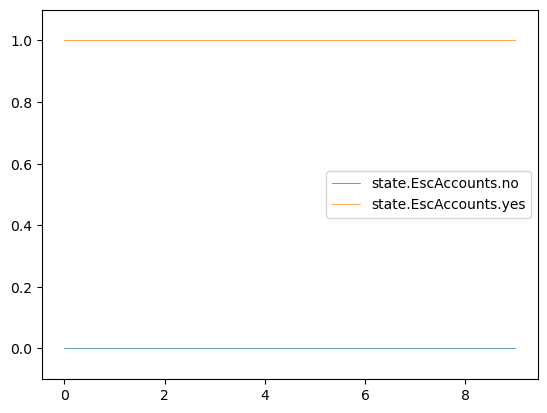

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3      FileRecon                        file_enum  
4      FileRecon                        file_enum  
5           Exit                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

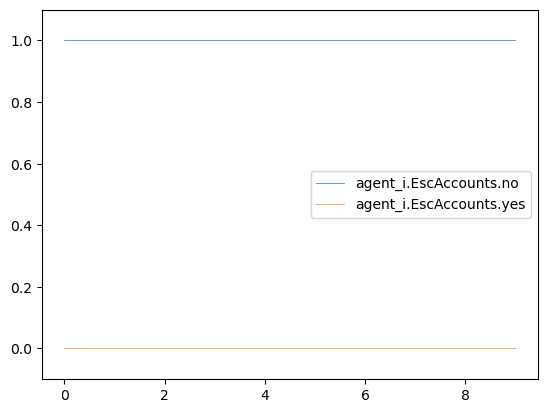

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.125358                 0.874642     PrivEscAcc   
3                0.000147                 0.999852      FileRecon   
4                0.000184                 0.999816      FileRecon   
5                0.000202                 0.999798           Exit   
6                0.000202                 0.999798            Nop   
7                0.000202                 0.999798            Nop   
8                0.000202                 0.999798            Nop   
9                0.000202                 0.999798            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

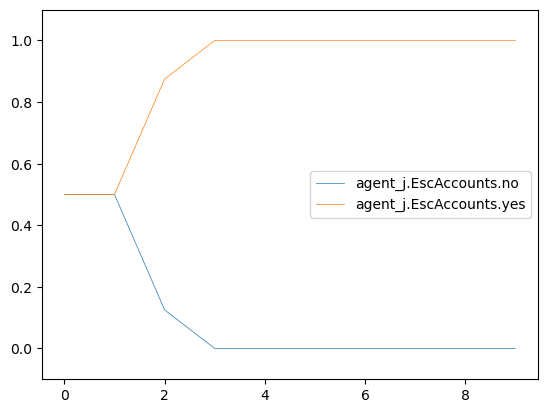

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop   EnumAccounts
2                   0.0                    1.0            Nop     PrivEscAcc
3                   0.0                    1.0            Nop      FileRecon
4                   0.0                    1.0            Nop      FileRecon
5                   0.0                    1.0            Nop           Exit
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

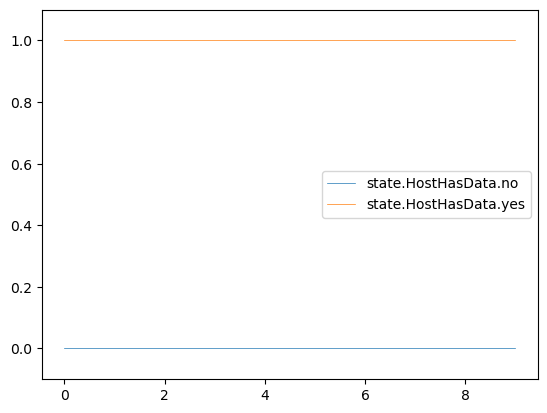

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3      FileRecon                        file_enum  
4      FileRecon                        file_enum  
5           Exit                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

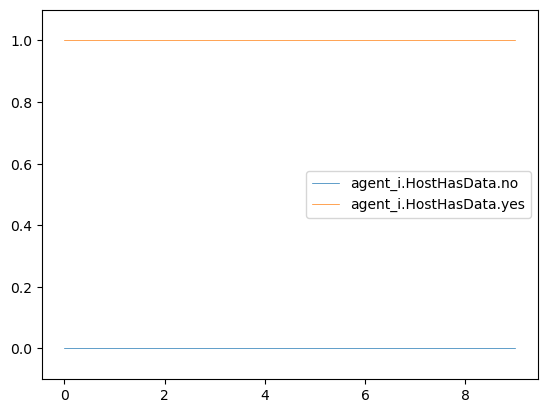

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.608108                 0.391892   EnumAccounts   
2                0.608108                 0.391892     PrivEscAcc   
3                0.608108                 0.391892      FileRecon   
4                0.848657                 0.151343      FileRecon   
5                0.960412                 0.039588           Exit   
6                0.960413                 0.039588            Nop   
7                0.960413                 0.039588            Nop   
8                0.960413                 0.039588            Nop   
9                0.960413                 0.039588            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

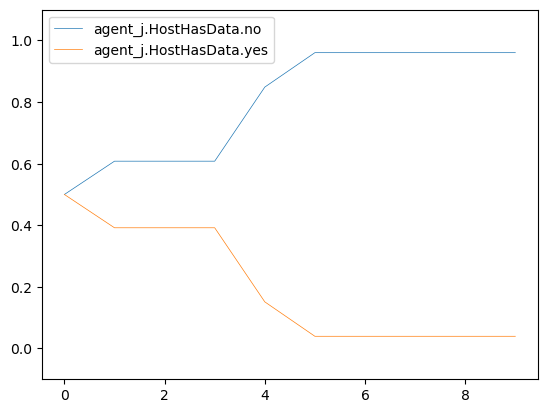

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop   EnumAccounts
2                0.0                 1.0            Nop     PrivEscAcc
3                0.0                 1.0            Nop      FileRecon
4                0.0                 1.0            Nop      FileRecon
5                0.0                 1.0            Nop           Exit
6                0.0                 1.0            Nop            Nop
7                0.0                 1.0            Nop            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

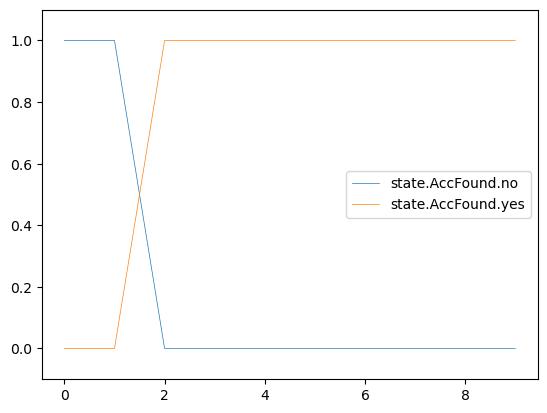

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0            Nop      FileRecon   
1                  1.0                   0.0            Nop   EnumAccounts   
2                  1.0                   0.0            Nop     PrivEscAcc   
3                  1.0                   0.0            Nop      FileRecon   
4                  1.0                   0.0            Nop      FileRecon   
5                  1.0                   0.0            Nop           Exit   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

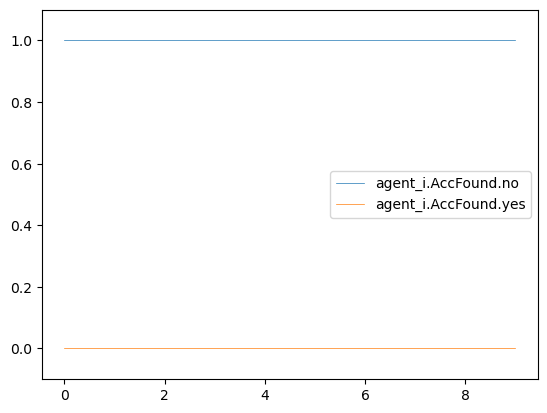

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts            Nop   
2             0.148997              0.851003     PrivEscAcc            Nop   
3             0.000175              0.999825      FileRecon            Nop   
4             0.000220              0.999780      FileRecon            Nop   
5             0.000242              0.999758           Exit            Nop   
6             0.000242              0.999758            Nop            Nop   
7             0.000242              0.999758            Nop            Nop   
8             0.000242              0.999758            Nop            Nop   
9             0.000242              0.999758            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           failure

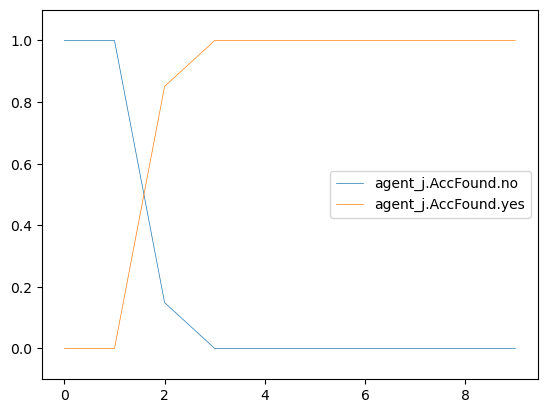

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop   EnumAccounts
2                 0.0                  1.0            Nop     PrivEscAcc
3                 0.0                  1.0            Nop      FileRecon
4                 0.0                  1.0            Nop      FileRecon
5                 0.0                  1.0            Nop           Exit
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

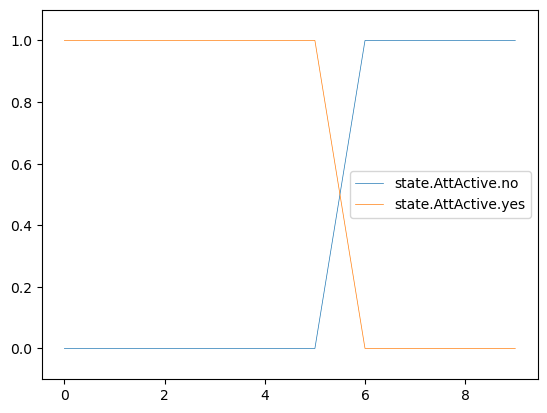

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00            Nop      FileRecon   
1              0.000000           1.000000e+00            Nop   EnumAccounts   
2              0.000000           1.000000e+00            Nop     PrivEscAcc   
3              0.004147           9.958529e-01            Nop      FileRecon   
4              0.001106           9.988940e-01            Nop      FileRecon   
5              0.827786           1.722144e-01            Nop           Exit   
6              0.999916           8.439470e-05            Nop            Nop   
7              1.000000           1.018971e-09            Nop            Nop   
8              1.000000           1.897385e-14            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

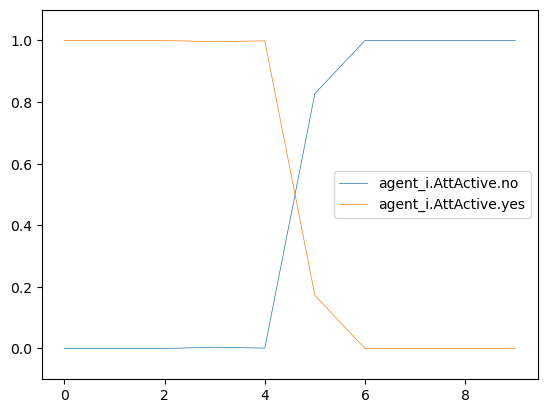

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts            Nop   
2                   0.0                    1.0     PrivEscAcc            Nop   
3                   0.0                    1.0      FileRecon            Nop   
4                   0.0                    1.0      FileRecon            Nop   
5                   0.0                    1.0           Exit            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           failure

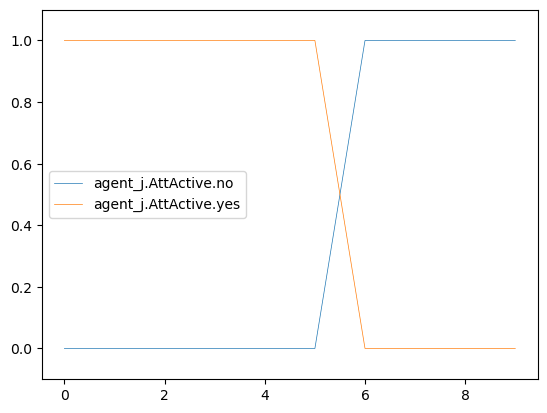

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop   EnumAccounts
2                   1.0                   0.0            Nop     PrivEscAcc
3                   1.0                   0.0            Nop      FileRecon
4                   1.0                   0.0            Nop      FileRecon
5                   1.0                   0.0            Nop           Exit
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

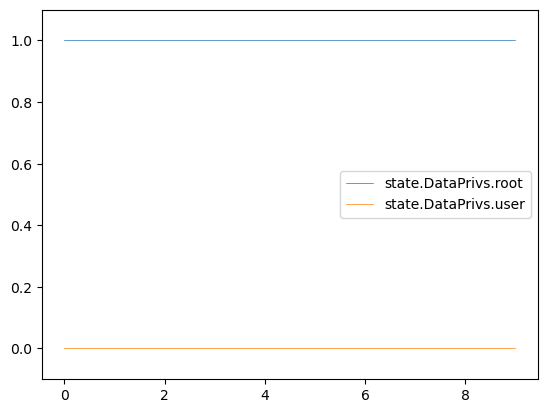

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3      FileRecon                        file_enum  
4      FileRecon                        file_enum  
5           Exit                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

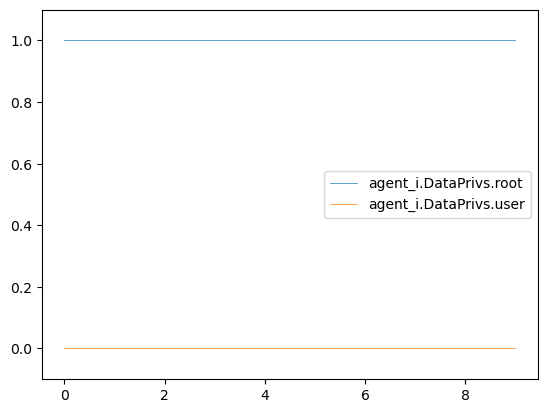

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.608108                0.391892   EnumAccounts   
2                0.608108                0.391892     PrivEscAcc   
3                0.608108                0.391892      FileRecon   
4                0.546964                0.453036      FileRecon   
5                0.512769                0.487231           Exit   
6                0.512769                0.487231            Nop   
7                0.512769                0.487231            Nop   
8                0.512769                0.487231            Nop   
9                0.512769                0.487231            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

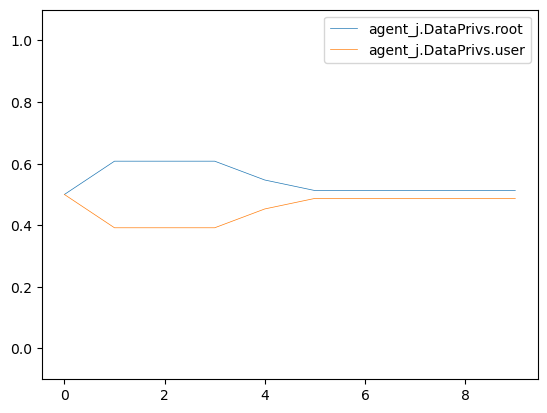

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2     PrivEscAcc  
3      FileRecon  
4      FileRecon  
5           Exit  
6            Nop  
7            Nop  
8            Nop  
9            Nop

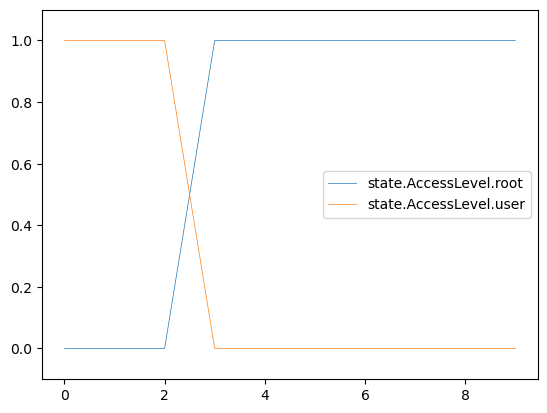

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3      FileRecon                        file_enum  
4      FileRecon                        file_enum  
5           Exit                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

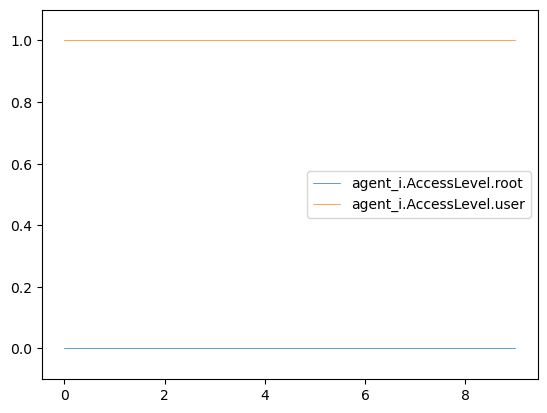

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000      FileRecon   
1                  0.000000                  1.000000   EnumAccounts   
2                  0.000000                  1.000000     PrivEscAcc   
3                  0.999825                  0.000175      FileRecon   
4                  0.999780                  0.000220      FileRecon   
5                  0.999758                  0.000242           Exit   
6                  0.999758                  0.000242            Nop   
7                  0.999758                  0.000242            Nop   
8                  0.999758                  0.000242            Nop   
9                  0.999758                  0.000242            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

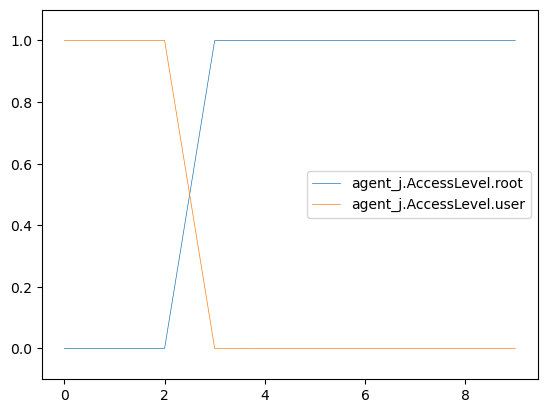

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                             none

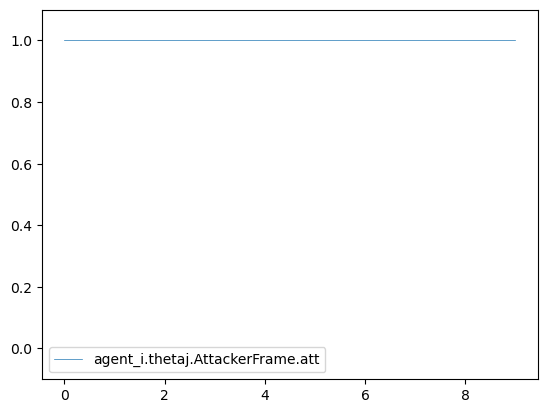

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.488539                        0.511461   
3                         0.484853                        0.515147   
4                         0.496125                        0.503876   
5                         0.496124                        0.503876   
6                         0.496124                        0.503876   
7                         0.496124                        0.503876   
8                         0.496124                        0.503876   
9                         0.496124                        0.503876   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           failure  
8                         none                           failure  
9                   user_files                           failure

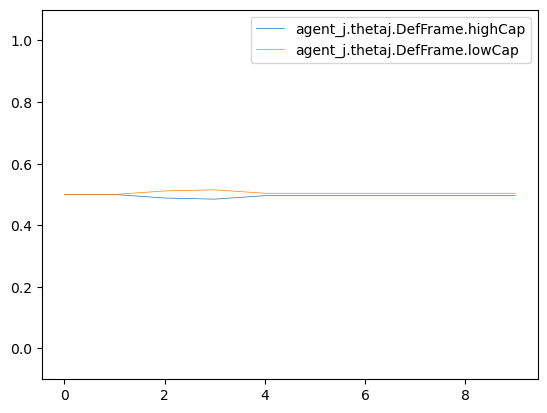

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

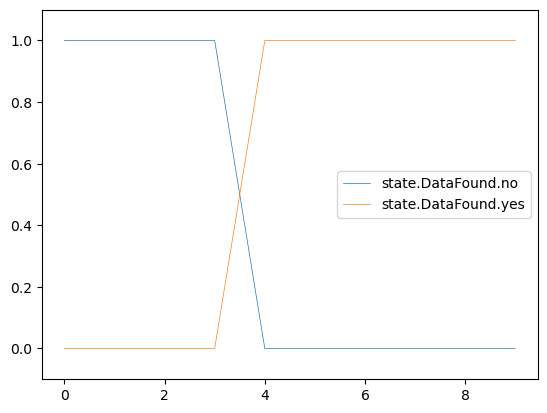

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop  ManipulateData   
5                   1.0                    0.0            Nop            Exit   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

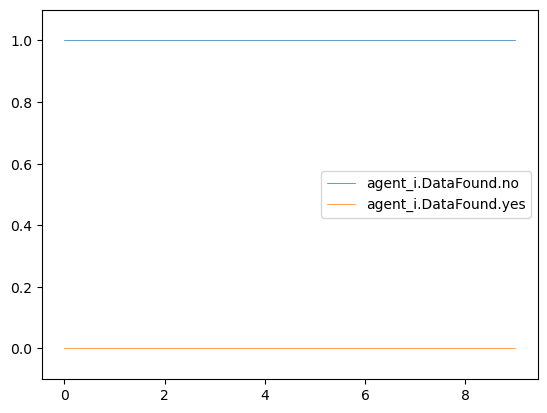

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.191810               0.808190  ManipulateData            Nop   
5              0.000238               0.999763            Exit            Nop   
6              0.000238               0.999763             Nop            Nop   
7              0.000238               0.999763             Nop            Nop   
8              0.000238               0.999763             Nop            Nop   
9              0.000238               0.999763             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           failure  
8                         none                           failure  
9                   user_files                           failure

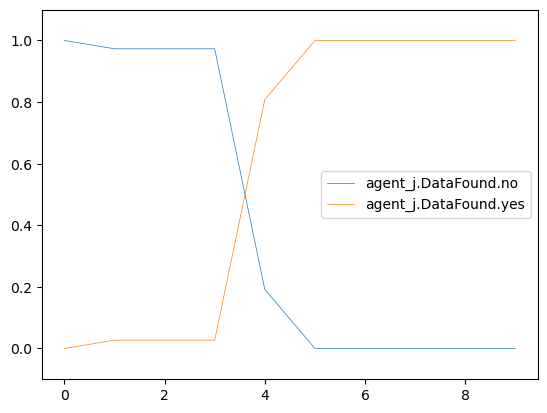

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

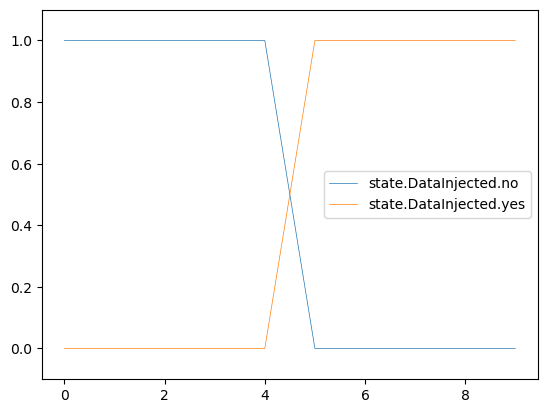

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

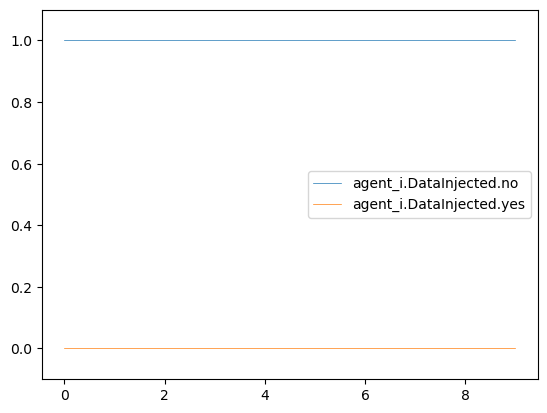

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000238                  0.999763            Exit   
6                 0.000238                  0.999763             Nop   
7                 0.000238                  0.999763             Nop   
8                 0.000238                  0.999763             Nop   
9                 0.000238                  0.999763             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           failure

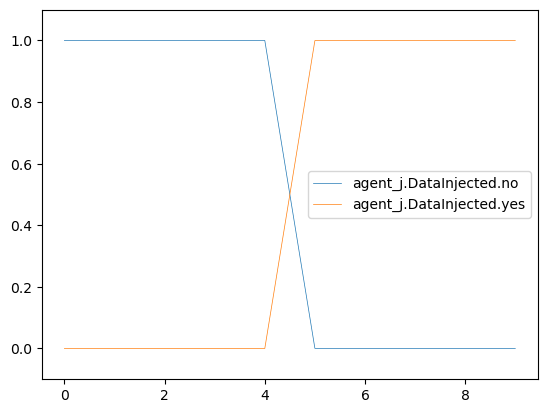

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

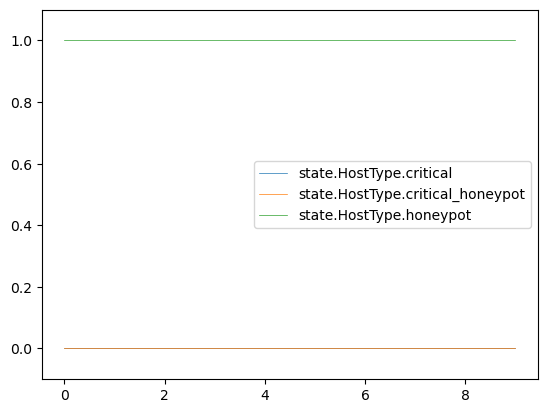

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

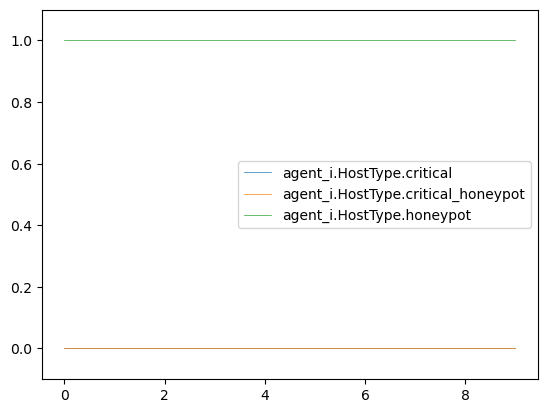

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.200000                                 0.0   
2                   0.037249                                 0.0   
3                   0.030311                                 0.0   
4                   0.007753                                 0.0   
5                   0.007752                                 0.0   
6                   0.007752                                 0.0   
7                   0.007752                                 0.0   
8                   0.007752                                 0.0   
9                   0.007752                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                   0.500000       FileRecon            Nop   
1                   0.800000    EnumAccounts            Nop   
2                   0.962751      PrivEscAcc            Nop   
3                   0.969689       FileRecon            Nop   
4                   0.992247  ManipulateData            Nop   
5                   0.992248            Exit            Nop   
6                   0.992248             Nop            Nop   
7                   0.992248             Nop            Nop   
8                   0.992248             Nop            Nop   
9                   0.992248             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           failure  
8                         none                           failure  
9                   user_files                           failure

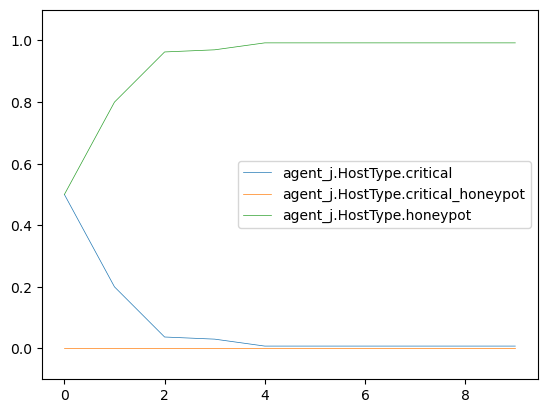

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

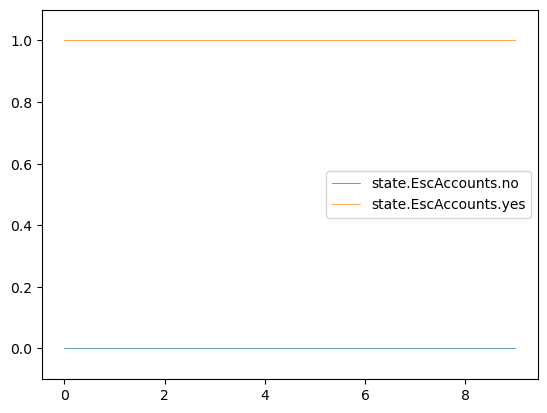

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

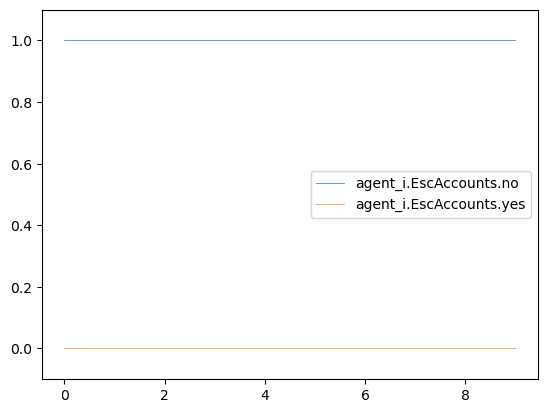

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.125358                 0.874642      PrivEscAcc   
3                0.000147                 0.999852       FileRecon   
4                0.000064                 0.999936  ManipulateData   
5                0.000034                 0.999966            Exit   
6                0.000034                 0.999966             Nop   
7                0.000034                 0.999966             Nop   
8                0.000034                 0.999966             Nop   
9                0.000034                 0.999966             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           failure

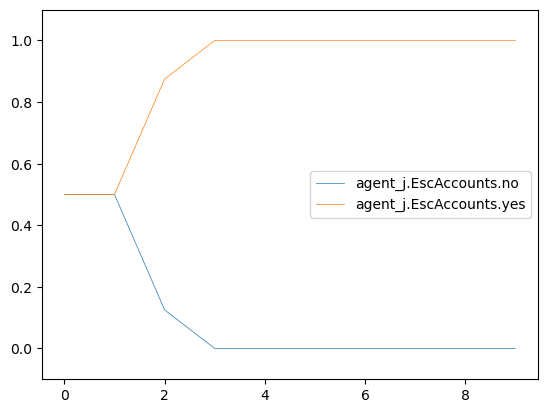

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

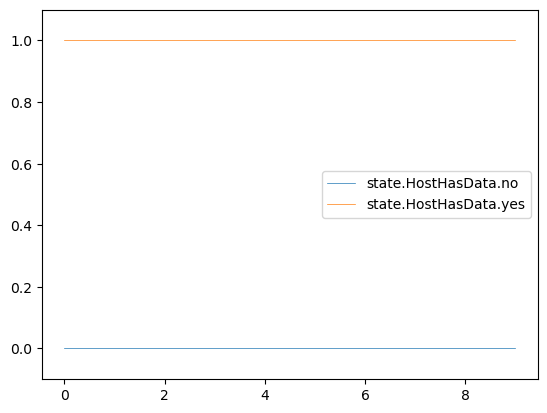

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

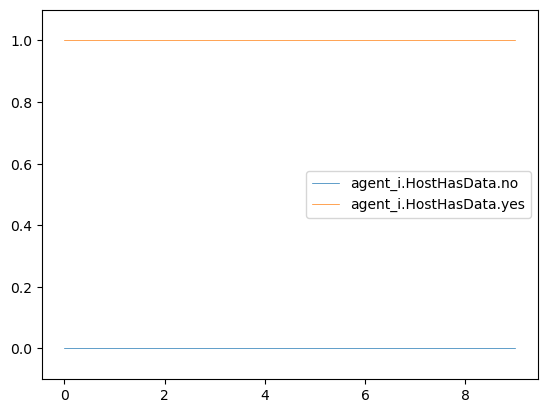

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.171249                 0.828751  ManipulateData   
5                0.000212                 0.999788            Exit   
6                0.000212                 0.999788             Nop   
7                0.000212                 0.999788             Nop   
8                0.000212                 0.999788             Nop   
9                0.000212                 0.999788             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           failure

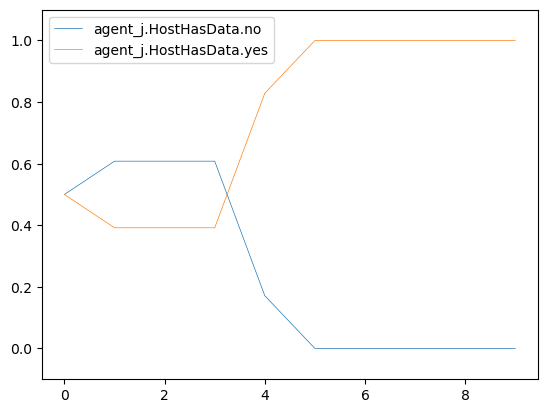

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

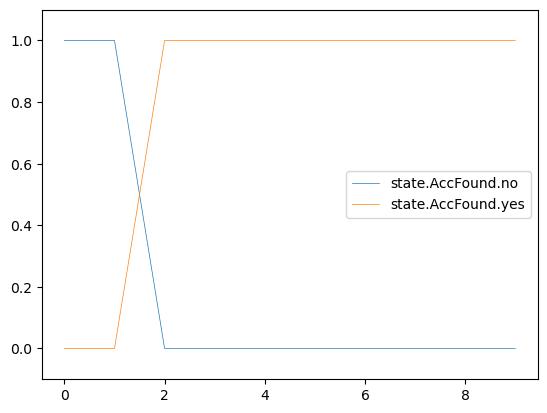

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop  ManipulateData   
5                  1.0                   0.0            Nop            Exit   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

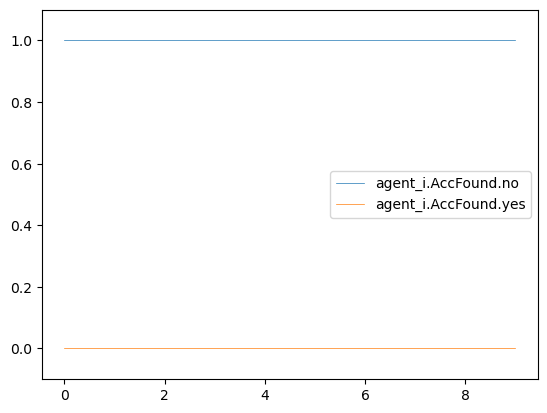

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.148997              0.851003      PrivEscAcc            Nop   
3             0.000175              0.999825       FileRecon            Nop   
4             0.000076              0.999924  ManipulateData            Nop   
5             0.000040              0.999960            Exit            Nop   
6             0.000040              0.999960             Nop            Nop   
7             0.000040              0.999960             Nop            Nop   
8             0.000040              0.999960             Nop            Nop   
9             0.000040              0.999960             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           failure  
8                         none                           failure  
9                   user_files                           failure

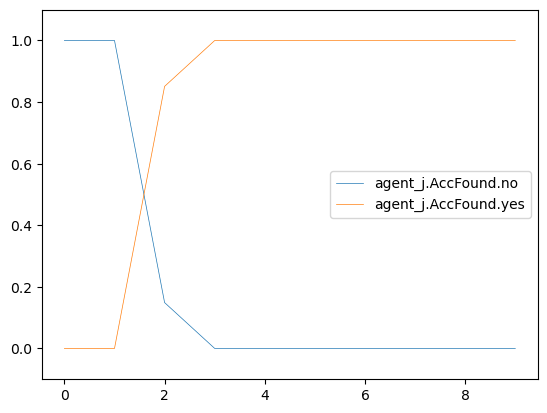

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

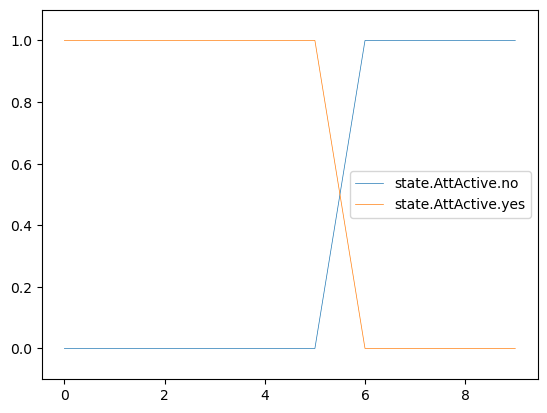

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.004147           9.958529e-01            Nop       FileRecon   
4              0.001106           9.988940e-01            Nop  ManipulateData   
5              0.084926           9.150736e-01            Nop            Exit   
6              0.999991           9.518424e-06            Nop             Nop   
7              1.000000           9.722522e-09            Nop             Nop   
8              1.000000           1.992509e-17            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

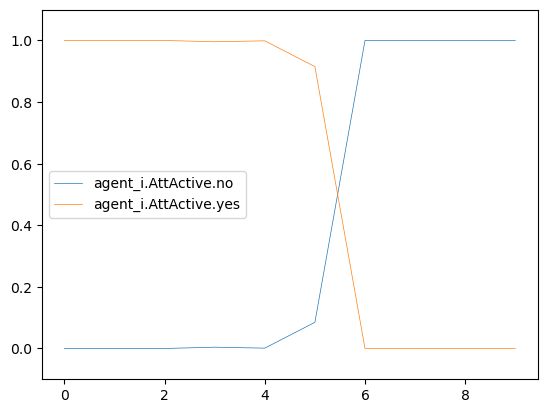

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           failure  
8                         none                           failure  
9                   user_files                           failure

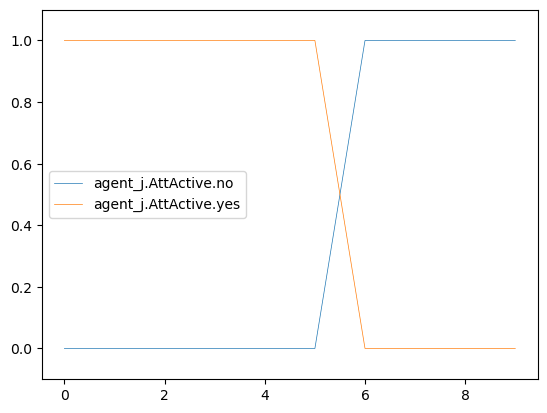

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

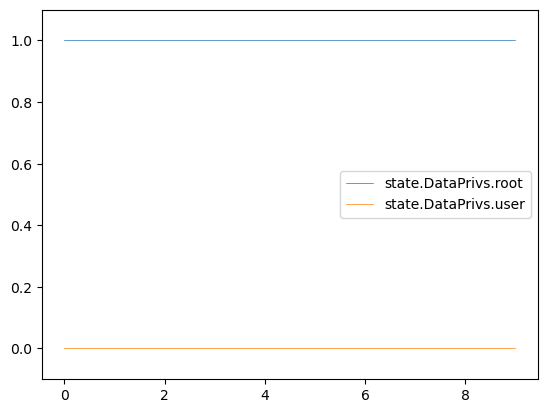

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

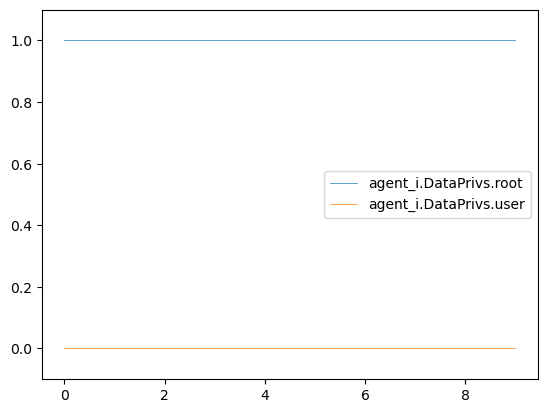

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.719152                0.280848  ManipulateData   
5                0.762627                0.237373            Exit   
6                0.762627                0.237373             Nop   
7                0.762627                0.237373             Nop   
8                0.762627                0.237373             Nop   
9                0.762627                0.237373             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           failure

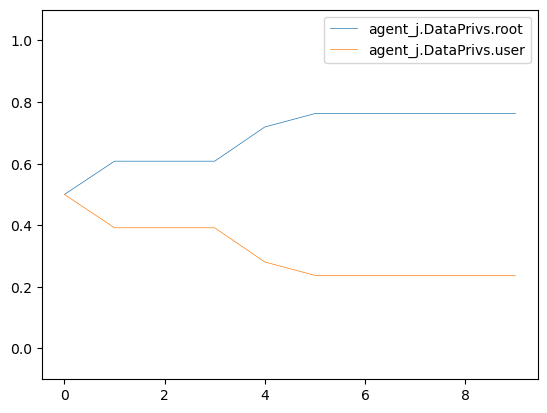

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

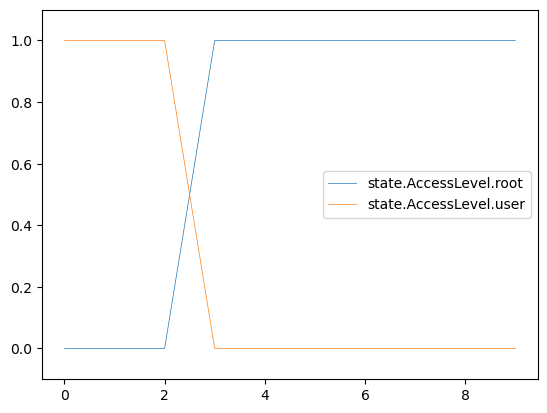

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                             none

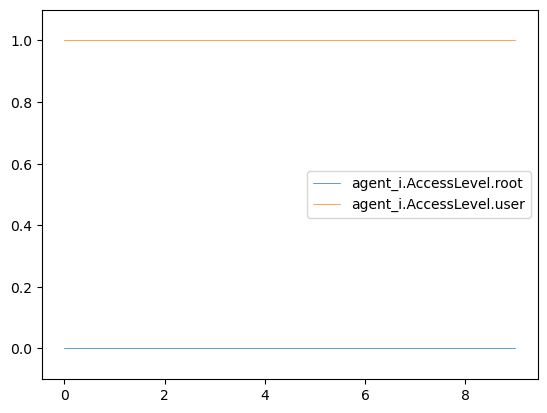

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999825                  0.000175       FileRecon   
4                  0.999924                  0.000076  ManipulateData   
5                  0.999960                  0.000040            Exit   
6                  0.999960                  0.000040             Nop   
7                  0.999960                  0.000040             Nop   
8                  0.999960                  0.000040             Nop   
9                  0.999960                  0.000040             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           failure

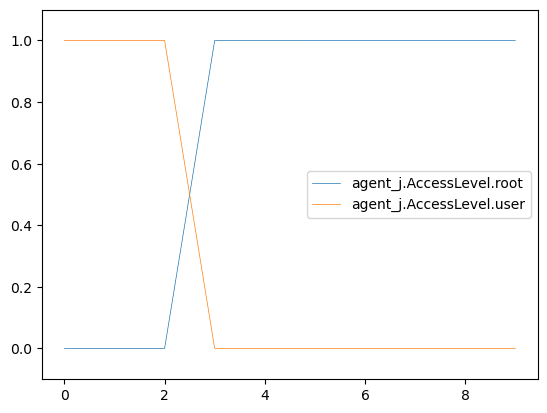

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

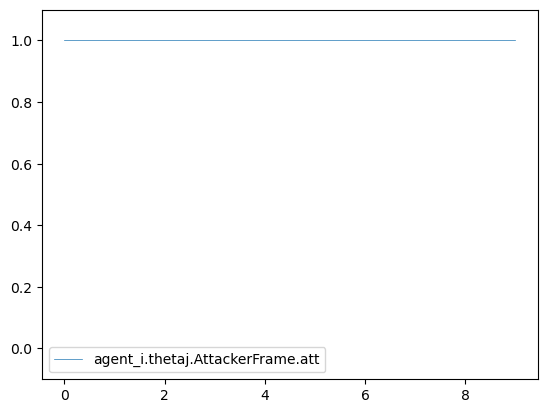

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.507984                        0.492016   
3                         0.502113                        0.497887   
4                         0.502113                        0.497887   
5                         0.502113                        0.497887   
6                         0.502113                        0.497887   
7                         0.502113                        0.497887   
8                         0.502113                        0.497887   
9                         0.502113                        0.497887   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

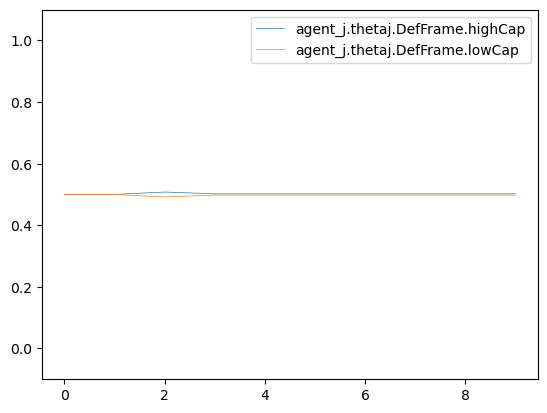

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop   EnumAccounts
2                 1.0                  0.0            Nop      FileRecon
3                 1.0                  0.0            Nop           Exit
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

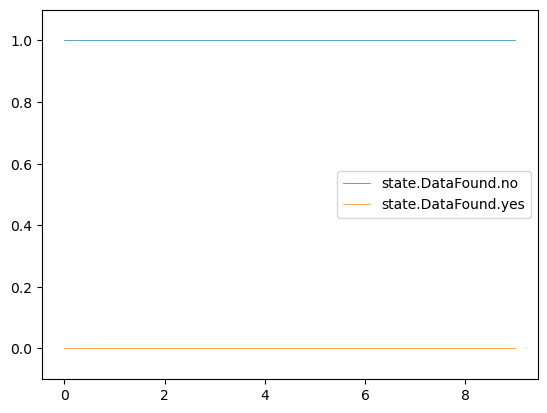

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0            Nop      FileRecon   
1                   1.0                    0.0            Nop   EnumAccounts   
2                   1.0                    0.0            Nop      FileRecon   
3                   1.0                    0.0            Nop           Exit   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

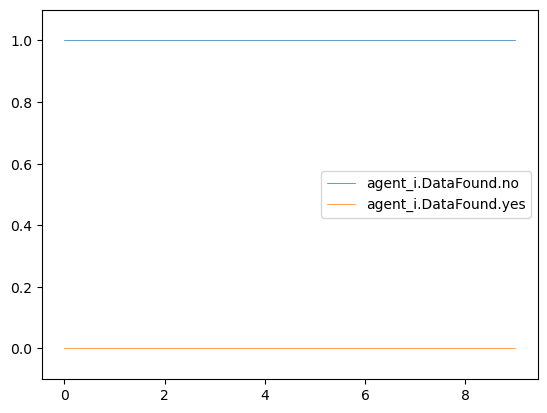

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.972973               0.027027   EnumAccounts            Nop   
2              0.972973               0.027027      FileRecon            Nop   
3              0.990985               0.009015           Exit            Nop   
4              0.990985               0.009015            Nop            Nop   
5              0.990985               0.009015            Nop            Nop   
6              0.990985               0.009015            Nop            Nop   
7              0.990985               0.009015            Nop            Nop   
8              0.990985               0.009015            Nop            Nop   
9              0.990985               0.009015            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

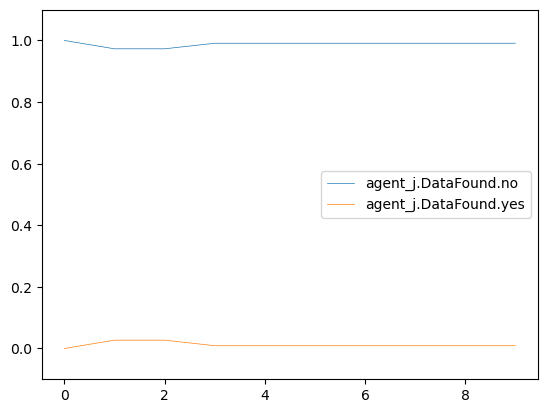

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop   EnumAccounts
2                    1.0                     0.0            Nop      FileRecon
3                    1.0                     0.0            Nop           Exit
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

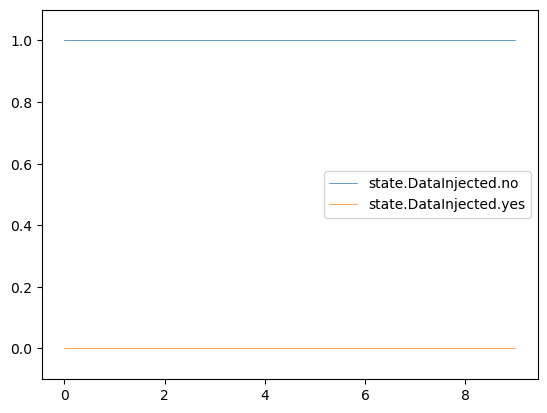

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

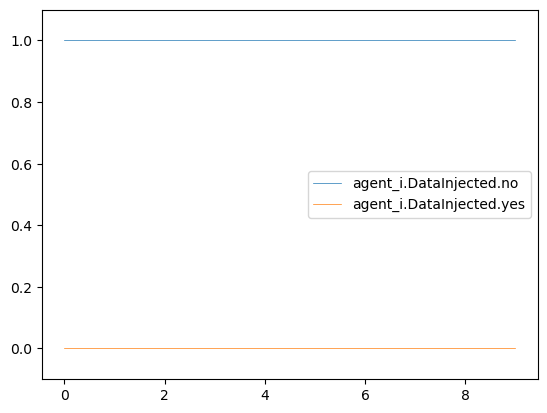

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0      FileRecon   
3                      1.0                       0.0           Exit   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

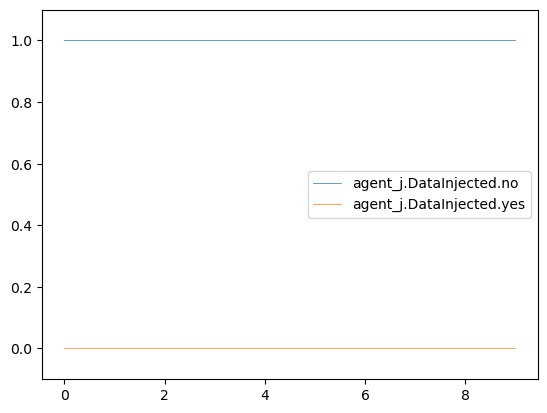

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop   EnumAccounts  
2                      1.0            Nop      FileRecon  
3                      1.0            Nop           Exit  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

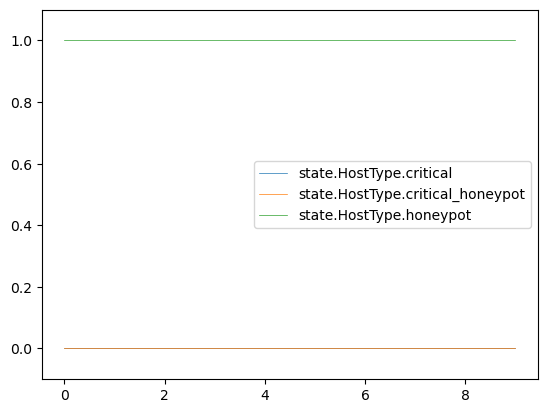

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop   EnumAccounts   
2                        1.0            Nop      FileRecon   
3                        1.0            Nop           Exit   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

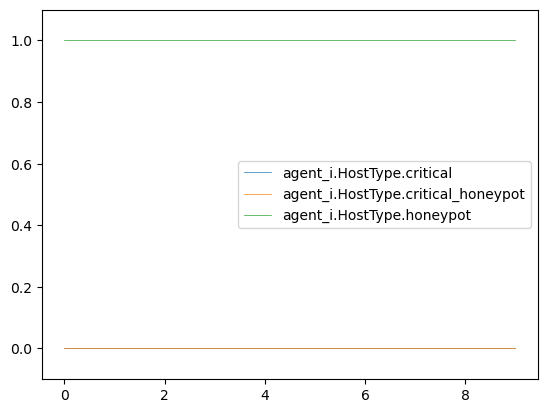

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.200000                                 0.0   
2                   0.073852                                 0.0   
3                   0.019546                                 0.0   
4                   0.019546                                 0.0   
5                   0.019546                                 0.0   
6                   0.019546                                 0.0   
7                   0.019546                                 0.0   
8                   0.019546                                 0.0   
9                   0.019546                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                   0.500000      FileRecon            Nop   
1                   0.800000   EnumAccounts            Nop   
2                   0.926148      FileRecon            Nop   
3                   0.980454           Exit            Nop   
4                   0.980454            Nop            Nop   
5                   0.980454            Nop            Nop   
6                   0.980454            Nop            Nop   
7                   0.980454            Nop            Nop   
8                   0.980454            Nop            Nop   
9                   0.980454            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

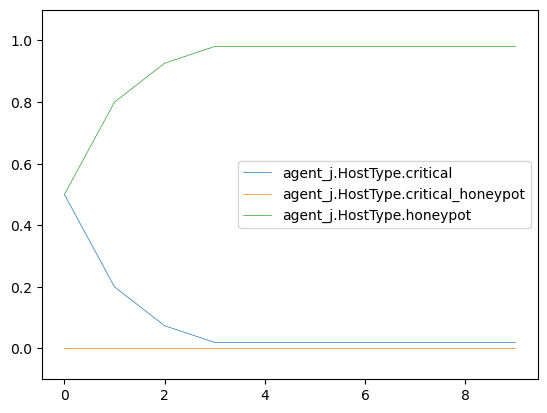

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop   EnumAccounts
2                   0.0                    1.0            Nop      FileRecon
3                   0.0                    1.0            Nop           Exit
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

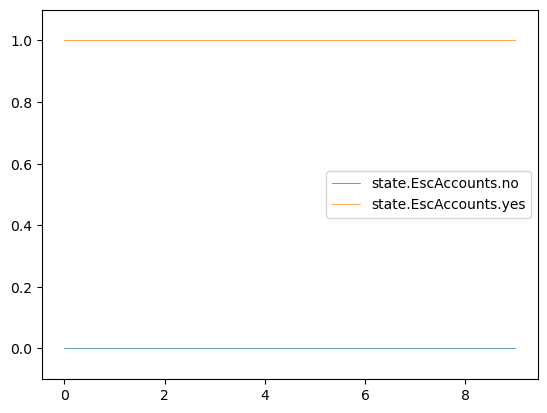

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

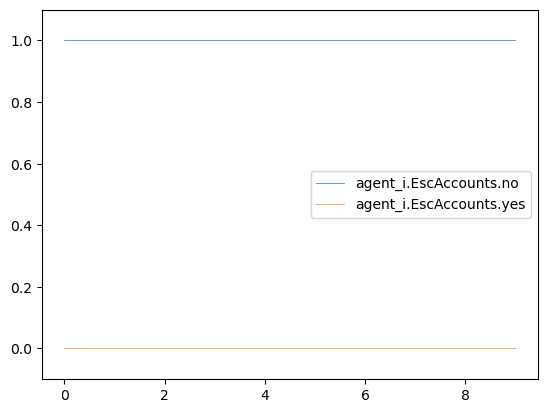

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.785928                 0.214072      FileRecon   
3                0.778526                 0.221474           Exit   
4                0.778526                 0.221474            Nop   
5                0.778526                 0.221474            Nop   
6                0.778526                 0.221474            Nop   
7                0.778526                 0.221474            Nop   
8                0.778526                 0.221474            Nop   
9                0.778526                 0.221474            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

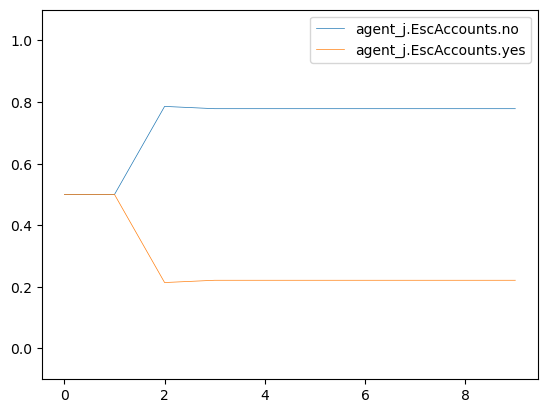

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop   EnumAccounts
2                   0.0                    1.0            Nop      FileRecon
3                   0.0                    1.0            Nop           Exit
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

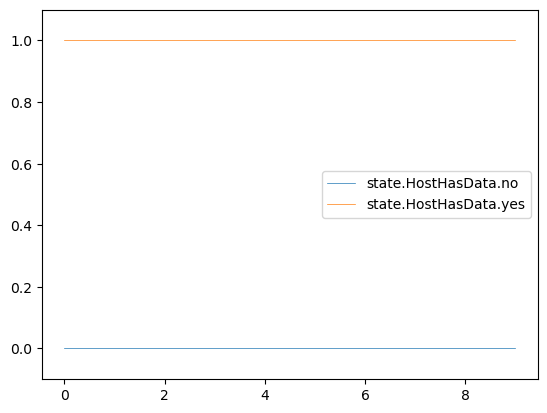

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

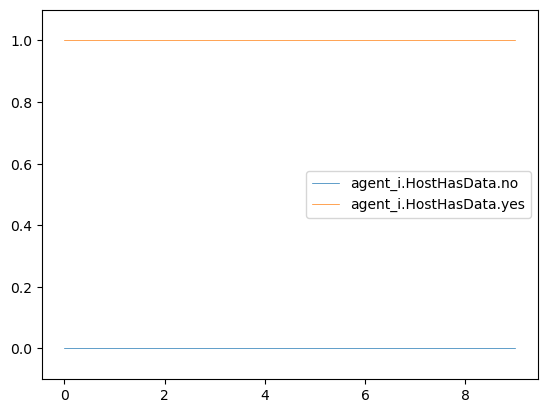

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.608108                 0.391892   EnumAccounts   
2                0.608108                 0.391892      FileRecon   
3                0.651964                 0.348036           Exit   
4                0.651964                 0.348036            Nop   
5                0.651964                 0.348036            Nop   
6                0.651964                 0.348036            Nop   
7                0.651964                 0.348036            Nop   
8                0.651964                 0.348036            Nop   
9                0.651964                 0.348036            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

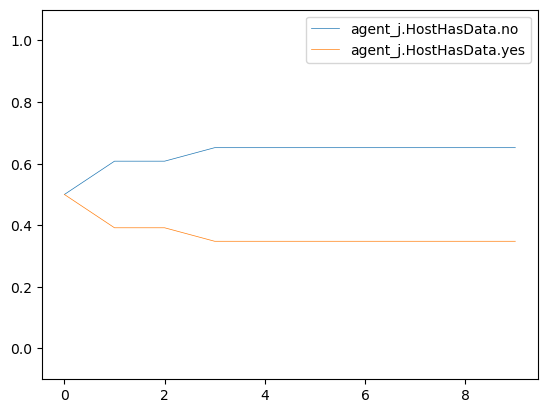

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop   EnumAccounts
2                0.0                 1.0            Nop      FileRecon
3                0.0                 1.0            Nop           Exit
4                0.0                 1.0            Nop            Nop
5                0.0                 1.0            Nop            Nop
6                0.0                 1.0            Nop            Nop
7                0.0                 1.0            Nop            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

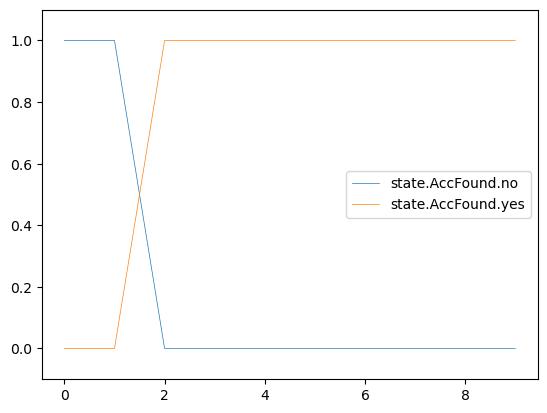

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0            Nop      FileRecon   
1                  1.0                   0.0            Nop   EnumAccounts   
2                  1.0                   0.0            Nop      FileRecon   
3                  1.0                   0.0            Nop           Exit   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

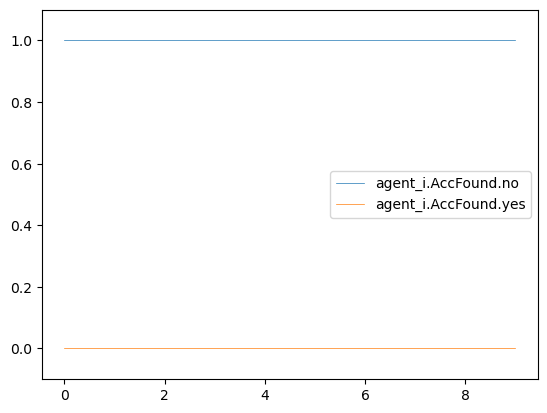

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts            Nop   
2             0.934132              0.065868      FileRecon            Nop   
3             0.931854              0.068146           Exit            Nop   
4             0.931854              0.068146            Nop            Nop   
5             0.931854              0.068146            Nop            Nop   
6             0.931854              0.068146            Nop            Nop   
7             0.931854              0.068146            Nop            Nop   
8             0.931854              0.068146            Nop            Nop   
9             0.931854              0.068146            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

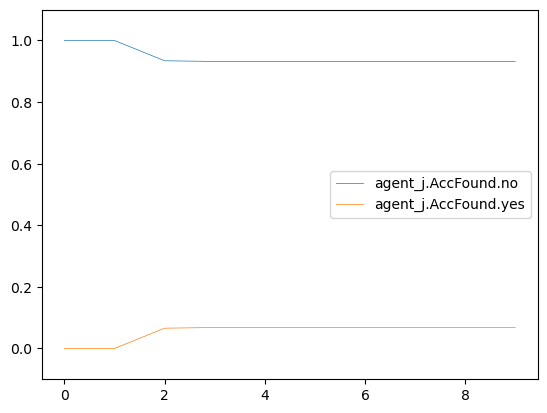

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop   EnumAccounts
2                 0.0                  1.0            Nop      FileRecon
3                 0.0                  1.0            Nop           Exit
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

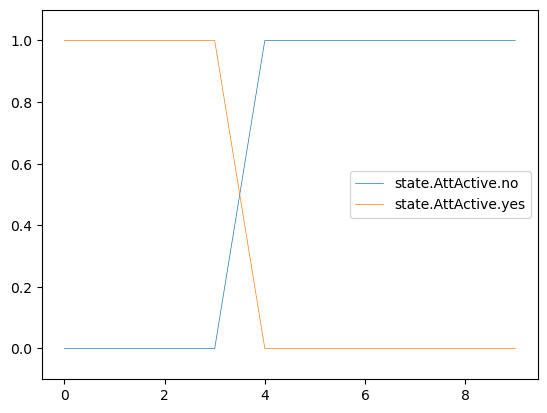

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00            Nop      FileRecon   
1              0.000000           1.000000e+00            Nop   EnumAccounts   
2              0.000000           1.000000e+00            Nop      FileRecon   
3              0.000428           9.995718e-01            Nop           Exit   
4              0.998831           1.169343e-03            Nop            Nop   
5              1.000000           4.297701e-08            Nop            Nop   
6              1.000000           3.671037e-11            Nop            Nop   
7              1.000000           4.008200e-14            Nop            Nop   
8              1.000000           2.167315e-17            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

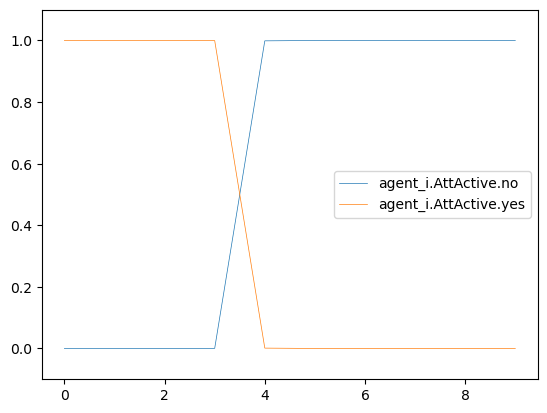

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts            Nop   
2                   0.0                    1.0      FileRecon            Nop   
3                   0.0                    1.0           Exit            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           failure  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

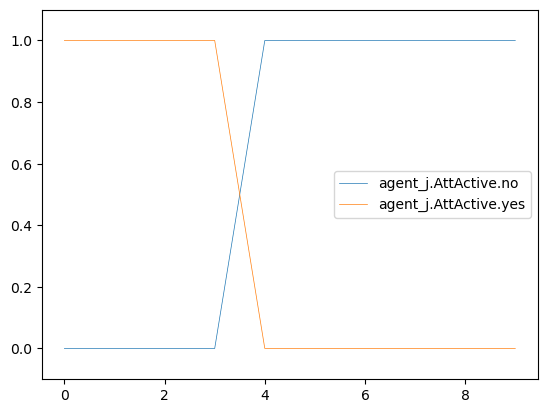

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop   EnumAccounts
2                   1.0                   0.0            Nop      FileRecon
3                   1.0                   0.0            Nop           Exit
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

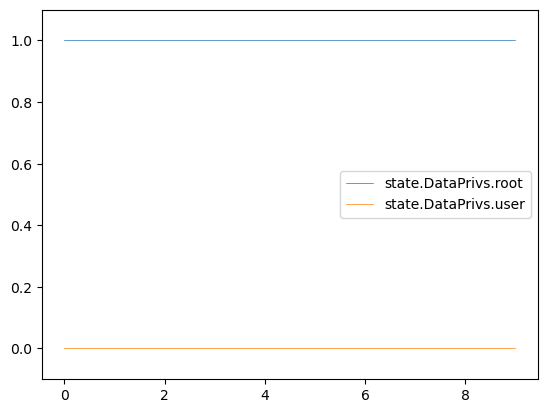

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

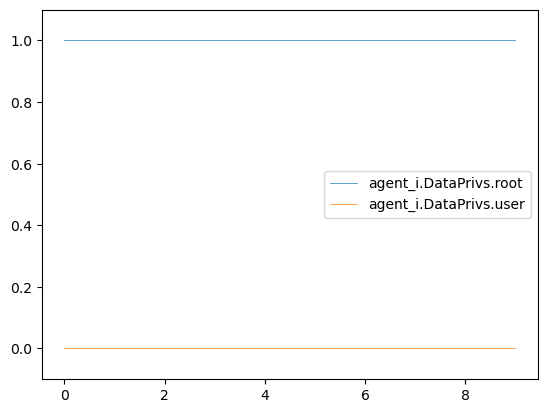

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.608108                0.391892   EnumAccounts   
2                0.608108                0.391892      FileRecon   
3                0.651964                0.348036           Exit   
4                0.651964                0.348036            Nop   
5                0.651964                0.348036            Nop   
6                0.651964                0.348036            Nop   
7                0.651964                0.348036            Nop   
8                0.651964                0.348036            Nop   
9                0.651964                0.348036            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

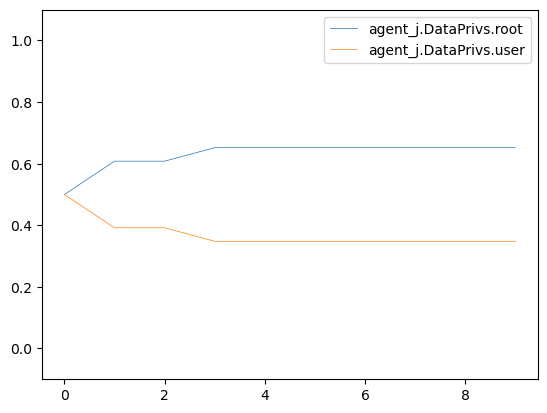

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2      FileRecon  
3           Exit  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

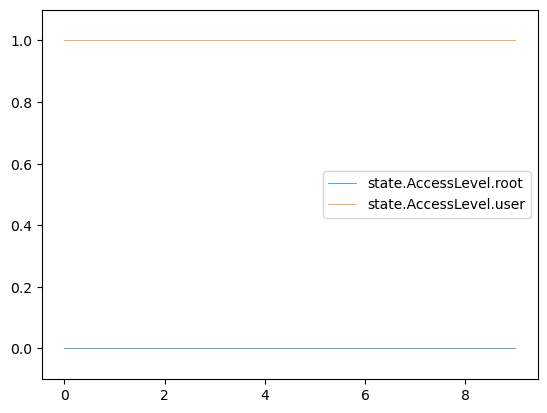

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

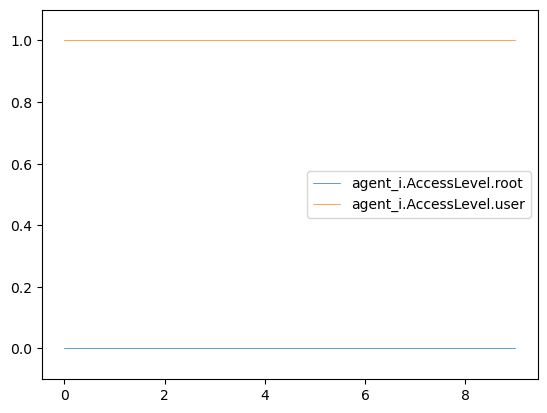

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0      FileRecon   
3                       0.0                       1.0           Exit   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

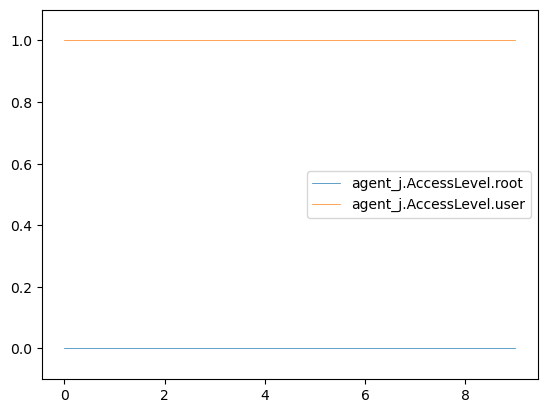

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    